# Linear Regression
The Whopper has been Burger King’s signature sandwich since 1957. One Double Whopper with cheese provides 53 grams of protein! That's all the protein you need in a day. It also supplies 1020 calories and 65 grams of fat 😲😲😲. FYI - the Daily Value (based on a 2000-calorie diet) for fat is 65 grams. So after a Double Whopper you’ll want the rest of your calories that day to be fat-free. Of course, the Whopper isn’t the only item Burger King sells. How are fat and protein related on the entire BK menu? The scatterplot of the Fat (in grams) versus the Protein (in grams) for foods sold at Burger King shows a positive, moderately strong, linear relationship.
![Scatterplot of BK](https://raw.githubusercontent.com/SSpindt/AI/refs/heads/main/Semester%201/Problem%20Set%20Images/BKScatter.png)
If you want 25 grams of protein in your lunch, how much fat should you expect to consume at Burger King? The correlation between Fat and Protein is 0.83, a sign that the linear association seen in the scatterplot is fairly strong. But strength of the relationship is only part of the picture. The correlation says, “The linear association between these two variables is fairly strong,” but it doesn’t tell us what the line actually is.
Now we can say more; the equation will let us predict the fat content for any Burger King food, given its amount of protein. 

For the Burger King foods, we’d choose a linear model to describe the relationship between Protein and Fat.
Of course, no line can go through all the points, but a linear model can summarize the general pattern with only a couple of parameters. Like all models of the real world, the line will be wrong — wrong in the sense that it can’t match reality exactly. But it can help us understand how the variables are associated.
Not only can’t we draw a line through all the points, the best line might not even hit any of the points. Then how can it be the “best” line? We want to find the line that somehow comes closer to all the points than any other line. Some of the points will be above the line and some below. For example, the line might suggest that a BK Broiler chicken sandwich with 30 grams of protein should have 36 grams of fat when, in fact, it actually has only 25 grams of fat. The BK Broiler chicken residual would be `actual - predicted = 25 - 36 = -11 g of fat`. The negative residual tells us that the actual fat content of the BK Broiler chicken is about 11 grams less than the model predicts for a typical Burger King menu item with 30 grams of protein. Our challenge now is how to find the right line.

When we draw a line through a scatterplot, some residuals are positive and some negative. We can’t assess how well the line fits by adding up all the residuals—the positive and negative ones would just cancel each other out. We faced the same issue when we calculated a standard deviation to measure spread. And we deal with it the same way here: by squaring the residuals. Squaring makes them all positive. Now we can add them up. Squaring also emphasizes the large residuals. After all, points near the line are consistent with the model, but we’re more concerned about points far from the line. When we add all the squared residuals together, that sum indicates how well the line we drew fits the data — the smaller the sum, the better the fit. A different line will produce a different sum, maybe bigger, maybe smaller. The **line of best fit** is the line for which the sum of squared residuals is smallest! We call this line the **least squares line**. It can be described as `y = mx + b `or more generically as `y = b0 + b1x` (*b0 is the y intercept and b1 is the slope*).You can use the line of best fit to make predictions -- all you have to do is plug in your value for x and solve for y!

## <span style="color:blue">Your Turn</span>
Please solve the following problems using Python, Markdown, and this [data set about movies](https://drive.google.com/file/d/1QmsmZSTI9VOesBH4yL_8LHTxV63Gz2hv/view?usp=drive_link). 

## <span style="color:blue">Problem 1</span>
First, examine the relationship between `budget` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `critics score`? How do you know?
2. Define a function that returns the equation of the line of best fit for `budget` and `critics score`. What is that equation? *You can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its budget was $10 million? How accurate is this prediction?

In [17]:
# Write the code you need for question 1 here.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_json('problem_set.json')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   critics score (percent)           1000 non-null   float64
 1   budget (millions)                 1000 non-null   float64
 2   length (minutes)                  1000 non-null   float64
 3   curse words used (rate per hour)  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


<AxesSubplot:xlabel='budget (millions)', ylabel='critics score (percent)'>

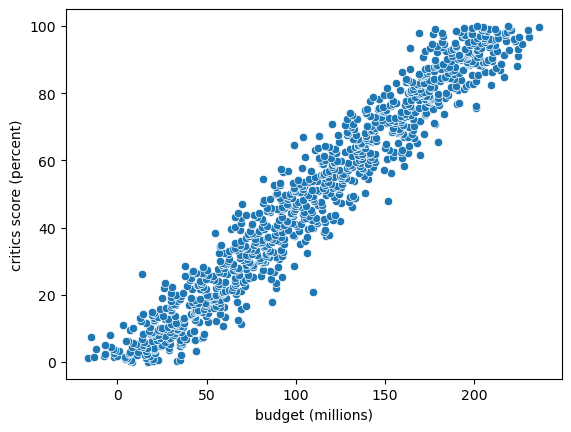

In [19]:
sns.scatterplot(data=df, x='budget (millions)', y='critics score (percent)')

In [20]:
df['budget']=df['budget (millions)']
df['critic']=df['critics score (percent)']


In [21]:
corout=df['budget (millions)'].corr(df['critics score (percent)'])
print(corout)

0.9697766428756551


***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***
the budget and the critic score have a positive, linear, and fairly strong relationship. This can be seen in the scatterplot as when the budget increases the critic score also does. It can also be seen that the relationship is strong since the correlation is .96977.

In [62]:
def linreg(df, x, y, n=150):
    m=0
    b=0
    bestres = float('inf')
    best_model = None
    opm, opb = None, None
    for i in range(n):
        model = None
        optimumresid = float('inf')
        print('starting scatter')
        
        print(f'starting predictions for epoch {i+1}')
        df['predicted']=m*df[x]+b
        
        print('starting residual testing for basic')
        df['residuals']=df[y]-df['predicted']
        resid = df['residuals'].pow(2).sum()

        mchange = -(2 / len(df)) * (df[x] * df['residuals']).sum()
        bchange = -(2 / len(df)) * df['residuals'].sum()
        
        
        m -= .000001 * mchange  
        b -= .000001 * bchange

        if resid < bestres:
            bestres = resid
            best_model = 'LSQ'
            opm, opb = m, b
        
        
        
        
    print(f'Best model: {best_model} with residual squared: {bestres}')
    sns.scatterplot(data=df, x=x, y=y)

    plt.plot(df[x], df['predicted'], color='red', label='Regression Line')
    plt.show()
    return opm, opb, bestres

#I know you said not to use other libraries, but I used seaborn and matplotlib only for visualization. It does not impact the calculations of the line in any way. It is only there to be useful to see what the line looks like.

starting scatter
starting predictions for epoch 1
starting residual testing for basic
starting scatter
starting predictions for epoch 2
starting residual testing for basic
starting scatter
starting predictions for epoch 3
starting residual testing for basic
starting scatter
starting predictions for epoch 4
starting residual testing for basic
starting scatter
starting predictions for epoch 5
starting residual testing for basic
starting scatter
starting predictions for epoch 6
starting residual testing for basic
starting scatter
starting predictions for epoch 7
starting residual testing for basic
starting scatter
starting predictions for epoch 8
starting residual testing for basic
starting scatter
starting predictions for epoch 9
starting residual testing for basic
starting scatter
starting predictions for epoch 10
starting residual testing for basic
starting scatter
starting predictions for epoch 11
starting residual testing for basic
starting scatter
starting predictions for epoch 12
s

starting scatter
starting predictions for epoch 119
starting residual testing for basic
starting scatter
starting predictions for epoch 120
starting residual testing for basic
starting scatter
starting predictions for epoch 121
starting residual testing for basic
starting scatter
starting predictions for epoch 122
starting residual testing for basic
starting scatter
starting predictions for epoch 123
starting residual testing for basic
starting scatter
starting predictions for epoch 124
starting residual testing for basic
starting scatter
starting predictions for epoch 125
starting residual testing for basic
starting scatter
starting predictions for epoch 126
starting residual testing for basic
starting scatter
starting predictions for epoch 127
starting residual testing for basic
starting scatter
starting predictions for epoch 128
starting residual testing for basic
starting scatter
starting predictions for epoch 129
starting residual testing for basic
starting scatter
starting predic

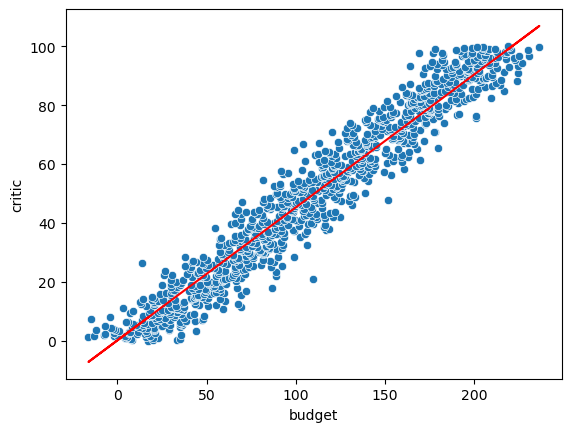

(0.45251889687008684, 0.0030665096673459045, 50392.97558443921)

In [63]:
linreg(df, 'budget', 'critic', 150)

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***

My equation is: y= .45251889687008684x+.0030665096673459045.

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***
According to my line, it will be 4.528255478%.This is fairly accurate as the point on the line goes right through the main cluster of the data.

## <span style="color:blue">Problem 2</span>
Now, examine the relationship between `length` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `length` and `critics score`? How do you know?
2. If you haven't done so already, please generalize your Linear Regression function so that it works on all kinds of quantitative data. Once you are done generalizing your function, call it using `length` and `critics score` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its length was 150 minutes? How accurate is this prediction?

<AxesSubplot:xlabel='length (minutes)', ylabel='critics score (percent)'>

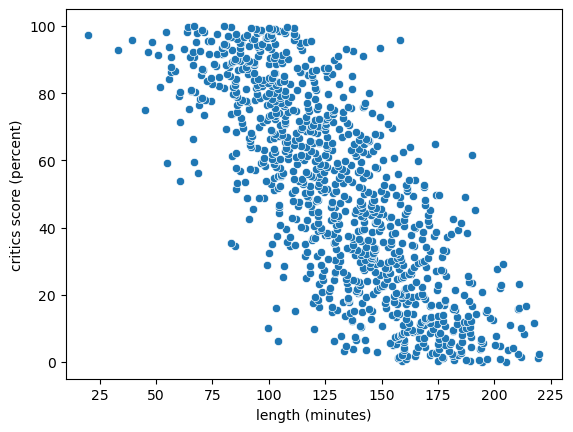

In [24]:
sns.scatterplot(data=df, x='length (minutes)', y='critics score (percent)')

In [25]:
corout=df['length (minutes)'].corr(df['critics score (percent)'])
print(corout)

-0.7649508928065849


The data has a fairly strong, linear, and negative relationship. This can be seen in the scatterplot as when the length increases the score goes down. It can also be seen that it is fairly strong since the magnitude of the correlation is .76495 which indicates a fairly strong relationship.

In [64]:
def linreg(df, x, y, n=150):
    m=0
    b=0
    bestres = float('inf')
    best_model = None
    opm, opb = None, None
    for i in range(n):
        model = None
        optimumresid = float('inf')
        print('starting scatter')
        
        print(f'starting predictions for epoch {i+1}')
        df['predicted']=m*df[x]+b
        
        print('starting residual testing for basic')
        df['residuals']=df[y]-df['predicted']
        resid = df['residuals'].pow(2).sum()

        mchange = -(2 / len(df)) * (df[x] * df['residuals']).sum()
        bchange = -(2 / len(df)) * df['residuals'].sum()
        
        
        m -= .000001 * mchange  
        b -= .000001 * bchange

        if resid < bestres:
            bestres = resid
            best_model = 'LSQ'
            opm, opb = m, b
        
        
        
        
    print(f'Best model: {best_model} with residual squared: {bestres}')
    sns.scatterplot(data=df, x=x, y=y)

    plt.plot(df[x], df['predicted'], color='red', label='Regression Line')
    plt.show()
    return opm, opb, bestres

#I know you said not to use other libraries, but I used seaborn and matplotlib only for visualization. It does not impact the calculations of the line in any way. It is only there to be useful to see what the line looks like.

starting scatter
starting predictions for epoch 1
starting residual testing for basic
starting scatter
starting predictions for epoch 2
starting residual testing for basic
starting scatter
starting predictions for epoch 3
starting residual testing for basic
starting scatter
starting predictions for epoch 4
starting residual testing for basic
starting scatter
starting predictions for epoch 5
starting residual testing for basic
starting scatter
starting predictions for epoch 6
starting residual testing for basic
starting scatter
starting predictions for epoch 7
starting residual testing for basic
starting scatter
starting predictions for epoch 8
starting residual testing for basic
starting scatter
starting predictions for epoch 9
starting residual testing for basic
starting scatter
starting predictions for epoch 10
starting residual testing for basic
starting scatter
starting predictions for epoch 11
starting residual testing for basic
starting scatter
starting predictions for epoch 12
s

starting scatter
starting predictions for epoch 116
starting residual testing for basic
starting scatter
starting predictions for epoch 117
starting residual testing for basic
starting scatter
starting predictions for epoch 118
starting residual testing for basic
starting scatter
starting predictions for epoch 119
starting residual testing for basic
starting scatter
starting predictions for epoch 120
starting residual testing for basic
starting scatter
starting predictions for epoch 121
starting residual testing for basic
starting scatter
starting predictions for epoch 122
starting residual testing for basic
starting scatter
starting predictions for epoch 123
starting residual testing for basic
starting scatter
starting predictions for epoch 124
starting residual testing for basic
starting scatter
starting predictions for epoch 125
starting residual testing for basic
starting scatter
starting predictions for epoch 126
starting residual testing for basic
starting scatter
starting predic

starting scatter
starting predictions for epoch 234
starting residual testing for basic
starting scatter
starting predictions for epoch 235
starting residual testing for basic
starting scatter
starting predictions for epoch 236
starting residual testing for basic
starting scatter
starting predictions for epoch 237
starting residual testing for basic
starting scatter
starting predictions for epoch 238
starting residual testing for basic
starting scatter
starting predictions for epoch 239
starting residual testing for basic
starting scatter
starting predictions for epoch 240
starting residual testing for basic
starting scatter
starting predictions for epoch 241
starting residual testing for basic
starting scatter
starting predictions for epoch 242
starting residual testing for basic
starting scatter
starting predictions for epoch 243
starting residual testing for basic
starting scatter
starting predictions for epoch 244
starting residual testing for basic
starting scatter
starting predic

starting scatter
starting predictions for epoch 363
starting residual testing for basic
starting scatter
starting predictions for epoch 364
starting residual testing for basic
starting scatter
starting predictions for epoch 365
starting residual testing for basic
starting scatter
starting predictions for epoch 366
starting residual testing for basic
starting scatter
starting predictions for epoch 367
starting residual testing for basic
starting scatter
starting predictions for epoch 368
starting residual testing for basic
starting scatter
starting predictions for epoch 369
starting residual testing for basic
starting scatter
starting predictions for epoch 370
starting residual testing for basic
starting scatter
starting predictions for epoch 371
starting residual testing for basic
starting scatter
starting predictions for epoch 372
starting residual testing for basic
starting scatter
starting predictions for epoch 373
starting residual testing for basic
starting scatter
starting predic

starting scatter
starting predictions for epoch 509
starting residual testing for basic
starting scatter
starting predictions for epoch 510
starting residual testing for basic
starting scatter
starting predictions for epoch 511
starting residual testing for basic
starting scatter
starting predictions for epoch 512
starting residual testing for basic
starting scatter
starting predictions for epoch 513
starting residual testing for basic
starting scatter
starting predictions for epoch 514
starting residual testing for basic
starting scatter
starting predictions for epoch 515
starting residual testing for basic
starting scatter
starting predictions for epoch 516
starting residual testing for basic
starting scatter
starting predictions for epoch 517
starting residual testing for basic
starting scatter
starting predictions for epoch 518
starting residual testing for basic
starting scatter
starting predictions for epoch 519
starting residual testing for basic
starting scatter
starting predic

starting scatter
starting predictions for epoch 631
starting residual testing for basic
starting scatter
starting predictions for epoch 632
starting residual testing for basic
starting scatter
starting predictions for epoch 633
starting residual testing for basic
starting scatter
starting predictions for epoch 634
starting residual testing for basic
starting scatter
starting predictions for epoch 635
starting residual testing for basic
starting scatter
starting predictions for epoch 636
starting residual testing for basic
starting scatter
starting predictions for epoch 637
starting residual testing for basic
starting scatter
starting predictions for epoch 638
starting residual testing for basic
starting scatter
starting predictions for epoch 639
starting residual testing for basic
starting scatter
starting predictions for epoch 640
starting residual testing for basic
starting scatter
starting predictions for epoch 641
starting residual testing for basic
starting scatter
starting predic

starting scatter
starting predictions for epoch 749
starting residual testing for basic
starting scatter
starting predictions for epoch 750
starting residual testing for basic
starting scatter
starting predictions for epoch 751
starting residual testing for basic
starting scatter
starting predictions for epoch 752
starting residual testing for basic
starting scatter
starting predictions for epoch 753
starting residual testing for basic
starting scatter
starting predictions for epoch 754
starting residual testing for basic
starting scatter
starting predictions for epoch 755
starting residual testing for basic
starting scatter
starting predictions for epoch 756
starting residual testing for basic
starting scatter
starting predictions for epoch 757
starting residual testing for basic
starting scatter
starting predictions for epoch 758
starting residual testing for basic
starting scatter
starting predictions for epoch 759
starting residual testing for basic
starting scatter
starting predic

starting scatter
starting predictions for epoch 919
starting residual testing for basic
starting scatter
starting predictions for epoch 920
starting residual testing for basic
starting scatter
starting predictions for epoch 921
starting residual testing for basic
starting scatter
starting predictions for epoch 922
starting residual testing for basic
starting scatter
starting predictions for epoch 923
starting residual testing for basic
starting scatter
starting predictions for epoch 924
starting residual testing for basic
starting scatter
starting predictions for epoch 925
starting residual testing for basic
starting scatter
starting predictions for epoch 926
starting residual testing for basic
starting scatter
starting predictions for epoch 927
starting residual testing for basic
starting scatter
starting predictions for epoch 928
starting residual testing for basic
starting scatter
starting predictions for epoch 929
starting residual testing for basic
starting scatter
starting predic

starting scatter
starting predictions for epoch 1084
starting residual testing for basic
starting scatter
starting predictions for epoch 1085
starting residual testing for basic
starting scatter
starting predictions for epoch 1086
starting residual testing for basic
starting scatter
starting predictions for epoch 1087
starting residual testing for basic
starting scatter
starting predictions for epoch 1088
starting residual testing for basic
starting scatter
starting predictions for epoch 1089
starting residual testing for basic
starting scatter
starting predictions for epoch 1090
starting residual testing for basic
starting scatter
starting predictions for epoch 1091
starting residual testing for basic
starting scatter
starting predictions for epoch 1092
starting residual testing for basic
starting scatter
starting predictions for epoch 1093
starting residual testing for basic
starting scatter
starting predictions for epoch 1094
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 1198
starting residual testing for basic
starting scatter
starting predictions for epoch 1199
starting residual testing for basic
starting scatter
starting predictions for epoch 1200
starting residual testing for basic
starting scatter
starting predictions for epoch 1201
starting residual testing for basic
starting scatter
starting predictions for epoch 1202
starting residual testing for basic
starting scatter
starting predictions for epoch 1203
starting residual testing for basic
starting scatter
starting predictions for epoch 1204
starting residual testing for basic
starting scatter
starting predictions for epoch 1205
starting residual testing for basic
starting scatter
starting predictions for epoch 1206
starting residual testing for basic
starting scatter
starting predictions for epoch 1207
starting residual testing for basic
starting scatter
starting predictions for epoch 1208
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 1341
starting residual testing for basic
starting scatter
starting predictions for epoch 1342
starting residual testing for basic
starting scatter
starting predictions for epoch 1343
starting residual testing for basic
starting scatter
starting predictions for epoch 1344
starting residual testing for basic
starting scatter
starting predictions for epoch 1345
starting residual testing for basic
starting scatter
starting predictions for epoch 1346
starting residual testing for basic
starting scatter
starting predictions for epoch 1347
starting residual testing for basic
starting scatter
starting predictions for epoch 1348
starting residual testing for basic
starting scatter
starting predictions for epoch 1349
starting residual testing for basic
starting scatter
starting predictions for epoch 1350
starting residual testing for basic
starting scatter
starting predictions for epoch 1351
starting residual testing for basic
starting scatter
star

starting residual testing for basic
starting scatter
starting predictions for epoch 1483
starting residual testing for basic
starting scatter
starting predictions for epoch 1484
starting residual testing for basic
starting scatter
starting predictions for epoch 1485
starting residual testing for basic
starting scatter
starting predictions for epoch 1486
starting residual testing for basic
starting scatter
starting predictions for epoch 1487
starting residual testing for basic
starting scatter
starting predictions for epoch 1488
starting residual testing for basic
starting scatter
starting predictions for epoch 1489
starting residual testing for basic
starting scatter
starting predictions for epoch 1490
starting residual testing for basic
starting scatter
starting predictions for epoch 1491
starting residual testing for basic
starting scatter
starting predictions for epoch 1492
starting residual testing for basic
starting scatter
starting predictions for epoch 1493
starting residual tes

starting scatter
starting predictions for epoch 1630
starting residual testing for basic
starting scatter
starting predictions for epoch 1631
starting residual testing for basic
starting scatter
starting predictions for epoch 1632
starting residual testing for basic
starting scatter
starting predictions for epoch 1633
starting residual testing for basic
starting scatter
starting predictions for epoch 1634
starting residual testing for basic
starting scatter
starting predictions for epoch 1635
starting residual testing for basic
starting scatter
starting predictions for epoch 1636
starting residual testing for basic
starting scatter
starting predictions for epoch 1637
starting residual testing for basic
starting scatter
starting predictions for epoch 1638
starting residual testing for basic
starting scatter
starting predictions for epoch 1639
starting residual testing for basic
starting scatter
starting predictions for epoch 1640
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 1769
starting residual testing for basic
starting scatter
starting predictions for epoch 1770
starting residual testing for basic
starting scatter
starting predictions for epoch 1771
starting residual testing for basic
starting scatter
starting predictions for epoch 1772
starting residual testing for basic
starting scatter
starting predictions for epoch 1773
starting residual testing for basic
starting scatter
starting predictions for epoch 1774
starting residual testing for basic
starting scatter
starting predictions for epoch 1775
starting residual testing for basic
starting scatter
starting predictions for epoch 1776
starting residual testing for basic
starting scatter
starting predictions for epoch 1777
starting residual testing for basic
starting scatter
starting predictions for epoch 1778
starting residual testing for basic
starting scatter
starting predictions for epoch 1779
starting residual testing for basic
starting scatter
star

starting residual testing for basic
starting scatter
starting predictions for epoch 1893
starting residual testing for basic
starting scatter
starting predictions for epoch 1894
starting residual testing for basic
starting scatter
starting predictions for epoch 1895
starting residual testing for basic
starting scatter
starting predictions for epoch 1896
starting residual testing for basic
starting scatter
starting predictions for epoch 1897
starting residual testing for basic
starting scatter
starting predictions for epoch 1898
starting residual testing for basic
starting scatter
starting predictions for epoch 1899
starting residual testing for basic
starting scatter
starting predictions for epoch 1900
starting residual testing for basic
starting scatter
starting predictions for epoch 1901
starting residual testing for basic
starting scatter
starting predictions for epoch 1902
starting residual testing for basic
starting scatter
starting predictions for epoch 1903
starting residual tes

starting scatter
starting predictions for epoch 2011
starting residual testing for basic
starting scatter
starting predictions for epoch 2012
starting residual testing for basic
starting scatter
starting predictions for epoch 2013
starting residual testing for basic
starting scatter
starting predictions for epoch 2014
starting residual testing for basic
starting scatter
starting predictions for epoch 2015
starting residual testing for basic
starting scatter
starting predictions for epoch 2016
starting residual testing for basic
starting scatter
starting predictions for epoch 2017
starting residual testing for basic
starting scatter
starting predictions for epoch 2018
starting residual testing for basic
starting scatter
starting predictions for epoch 2019
starting residual testing for basic
starting scatter
starting predictions for epoch 2020
starting residual testing for basic
starting scatter
starting predictions for epoch 2021
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 2137
starting residual testing for basic
starting scatter
starting predictions for epoch 2138
starting residual testing for basic
starting scatter
starting predictions for epoch 2139
starting residual testing for basic
starting scatter
starting predictions for epoch 2140
starting residual testing for basic
starting scatter
starting predictions for epoch 2141
starting residual testing for basic
starting scatter
starting predictions for epoch 2142
starting residual testing for basic
starting scatter
starting predictions for epoch 2143
starting residual testing for basic
starting scatter
starting predictions for epoch 2144
starting residual testing for basic
starting scatter
starting predictions for epoch 2145
starting residual testing for basic
starting scatter
starting predictions for epoch 2146
starting residual testing for basic
starting scatter
starting predictions for epoch 2147
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 2251
starting residual testing for basic
starting scatter
starting predictions for epoch 2252
starting residual testing for basic
starting scatter
starting predictions for epoch 2253
starting residual testing for basic
starting scatter
starting predictions for epoch 2254
starting residual testing for basic
starting scatter
starting predictions for epoch 2255
starting residual testing for basic
starting scatter
starting predictions for epoch 2256
starting residual testing for basic
starting scatter
starting predictions for epoch 2257
starting residual testing for basic
starting scatter
starting predictions for epoch 2258
starting residual testing for basic
starting scatter
starting predictions for epoch 2259
starting residual testing for basic
starting scatter
starting predictions for epoch 2260
starting residual testing for basic
starting scatter
starting predictions for epoch 2261
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 2369
starting residual testing for basic
starting scatter
starting predictions for epoch 2370
starting residual testing for basic
starting scatter
starting predictions for epoch 2371
starting residual testing for basic
starting scatter
starting predictions for epoch 2372
starting residual testing for basic
starting scatter
starting predictions for epoch 2373
starting residual testing for basic
starting scatter
starting predictions for epoch 2374
starting residual testing for basic
starting scatter
starting predictions for epoch 2375
starting residual testing for basic
starting scatter
starting predictions for epoch 2376
starting residual testing for basic
starting scatter
starting predictions for epoch 2377
starting residual testing for basic
starting scatter
starting predictions for epoch 2378
starting residual testing for basic
starting scatter
starting predictions for epoch 2379
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 2498
starting residual testing for basic
starting scatter
starting predictions for epoch 2499
starting residual testing for basic
starting scatter
starting predictions for epoch 2500
starting residual testing for basic
starting scatter
starting predictions for epoch 2501
starting residual testing for basic
starting scatter
starting predictions for epoch 2502
starting residual testing for basic
starting scatter
starting predictions for epoch 2503
starting residual testing for basic
starting scatter
starting predictions for epoch 2504
starting residual testing for basic
starting scatter
starting predictions for epoch 2505
starting residual testing for basic
starting scatter
starting predictions for epoch 2506
starting residual testing for basic
starting scatter
starting predictions for epoch 2507
starting residual testing for basic
starting scatter
starting predictions for epoch 2508
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 2635
starting residual testing for basic
starting scatter
starting predictions for epoch 2636
starting residual testing for basic
starting scatter
starting predictions for epoch 2637
starting residual testing for basic
starting scatter
starting predictions for epoch 2638
starting residual testing for basic
starting scatter
starting predictions for epoch 2639
starting residual testing for basic
starting scatter
starting predictions for epoch 2640
starting residual testing for basic
starting scatter
starting predictions for epoch 2641
starting residual testing for basic
starting scatter
starting predictions for epoch 2642
starting residual testing for basic
starting scatter
starting predictions for epoch 2643
starting residual testing for basic
starting scatter
starting predictions for epoch 2644
starting residual testing for basic
starting scatter
starting predictions for epoch 2645
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 2756
starting residual testing for basic
starting scatter
starting predictions for epoch 2757
starting residual testing for basic
starting scatter
starting predictions for epoch 2758
starting residual testing for basic
starting scatter
starting predictions for epoch 2759
starting residual testing for basic
starting scatter
starting predictions for epoch 2760
starting residual testing for basic
starting scatter
starting predictions for epoch 2761
starting residual testing for basic
starting scatter
starting predictions for epoch 2762
starting residual testing for basic
starting scatter
starting predictions for epoch 2763
starting residual testing for basic
starting scatter
starting predictions for epoch 2764
starting residual testing for basic
starting scatter
starting predictions for epoch 2765
starting residual testing for basic
starting scatter
starting predictions for epoch 2766
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 2900
starting residual testing for basic
starting scatter
starting predictions for epoch 2901
starting residual testing for basic
starting scatter
starting predictions for epoch 2902
starting residual testing for basic
starting scatter
starting predictions for epoch 2903
starting residual testing for basic
starting scatter
starting predictions for epoch 2904
starting residual testing for basic
starting scatter
starting predictions for epoch 2905
starting residual testing for basic
starting scatter
starting predictions for epoch 2906
starting residual testing for basic
starting scatter
starting predictions for epoch 2907
starting residual testing for basic
starting scatter
starting predictions for epoch 2908
starting residual testing for basic
starting scatter
starting predictions for epoch 2909
starting residual testing for basic
starting scatter
starting predictions for epoch 2910
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 3033
starting residual testing for basic
starting scatter
starting predictions for epoch 3034
starting residual testing for basic
starting scatter
starting predictions for epoch 3035
starting residual testing for basic
starting scatter
starting predictions for epoch 3036
starting residual testing for basic
starting scatter
starting predictions for epoch 3037
starting residual testing for basic
starting scatter
starting predictions for epoch 3038
starting residual testing for basic
starting scatter
starting predictions for epoch 3039
starting residual testing for basic
starting scatter
starting predictions for epoch 3040
starting residual testing for basic
starting scatter
starting predictions for epoch 3041
starting residual testing for basic
starting scatter
starting predictions for epoch 3042
starting residual testing for basic
starting scatter
starting predictions for epoch 3043
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 3159
starting residual testing for basic
starting scatter
starting predictions for epoch 3160
starting residual testing for basic
starting scatter
starting predictions for epoch 3161
starting residual testing for basic
starting scatter
starting predictions for epoch 3162
starting residual testing for basic
starting scatter
starting predictions for epoch 3163
starting residual testing for basic
starting scatter
starting predictions for epoch 3164
starting residual testing for basic
starting scatter
starting predictions for epoch 3165
starting residual testing for basic
starting scatter
starting predictions for epoch 3166
starting residual testing for basic
starting scatter
starting predictions for epoch 3167
starting residual testing for basic
starting scatter
starting predictions for epoch 3168
starting residual testing for basic
starting scatter
starting predictions for epoch 3169
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 3348
starting residual testing for basic
starting scatter
starting predictions for epoch 3349
starting residual testing for basic
starting scatter
starting predictions for epoch 3350
starting residual testing for basic
starting scatter
starting predictions for epoch 3351
starting residual testing for basic
starting scatter
starting predictions for epoch 3352
starting residual testing for basic
starting scatter
starting predictions for epoch 3353
starting residual testing for basic
starting scatter
starting predictions for epoch 3354
starting residual testing for basic
starting scatter
starting predictions for epoch 3355
starting residual testing for basic
starting scatter
starting predictions for epoch 3356
starting residual testing for basic
starting scatter
starting predictions for epoch 3357
starting residual testing for basic
starting scatter
starting predictions for epoch 3358
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 3462
starting residual testing for basic
starting scatter
starting predictions for epoch 3463
starting residual testing for basic
starting scatter
starting predictions for epoch 3464
starting residual testing for basic
starting scatter
starting predictions for epoch 3465
starting residual testing for basic
starting scatter
starting predictions for epoch 3466
starting residual testing for basic
starting scatter
starting predictions for epoch 3467
starting residual testing for basic
starting scatter
starting predictions for epoch 3468
starting residual testing for basic
starting scatter
starting predictions for epoch 3469
starting residual testing for basic
starting scatter
starting predictions for epoch 3470
starting residual testing for basic
starting scatter
starting predictions for epoch 3471
starting residual testing for basic
starting scatter
starting predictions for epoch 3472
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 3588
starting residual testing for basic
starting scatter
starting predictions for epoch 3589
starting residual testing for basic
starting scatter
starting predictions for epoch 3590
starting residual testing for basic
starting scatter
starting predictions for epoch 3591
starting residual testing for basic
starting scatter
starting predictions for epoch 3592
starting residual testing for basic
starting scatter
starting predictions for epoch 3593
starting residual testing for basic
starting scatter
starting predictions for epoch 3594
starting residual testing for basic
starting scatter
starting predictions for epoch 3595
starting residual testing for basic
starting scatter
starting predictions for epoch 3596
starting residual testing for basic
starting scatter
starting predictions for epoch 3597
starting residual testing for basic
starting scatter
starting predictions for epoch 3598
starting residual testing for basic
starting scatter
star

starting residual testing for basic
starting scatter
starting predictions for epoch 3713
starting residual testing for basic
starting scatter
starting predictions for epoch 3714
starting residual testing for basic
starting scatter
starting predictions for epoch 3715
starting residual testing for basic
starting scatter
starting predictions for epoch 3716
starting residual testing for basic
starting scatter
starting predictions for epoch 3717
starting residual testing for basic
starting scatter
starting predictions for epoch 3718
starting residual testing for basic
starting scatter
starting predictions for epoch 3719
starting residual testing for basic
starting scatter
starting predictions for epoch 3720
starting residual testing for basic
starting scatter
starting predictions for epoch 3721
starting residual testing for basic
starting scatter
starting predictions for epoch 3722
starting residual testing for basic
starting scatter
starting predictions for epoch 3723
starting residual tes

starting scatter
starting predictions for epoch 3853
starting residual testing for basic
starting scatter
starting predictions for epoch 3854
starting residual testing for basic
starting scatter
starting predictions for epoch 3855
starting residual testing for basic
starting scatter
starting predictions for epoch 3856
starting residual testing for basic
starting scatter
starting predictions for epoch 3857
starting residual testing for basic
starting scatter
starting predictions for epoch 3858
starting residual testing for basic
starting scatter
starting predictions for epoch 3859
starting residual testing for basic
starting scatter
starting predictions for epoch 3860
starting residual testing for basic
starting scatter
starting predictions for epoch 3861
starting residual testing for basic
starting scatter
starting predictions for epoch 3862
starting residual testing for basic
starting scatter
starting predictions for epoch 3863
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 3996
starting residual testing for basic
starting scatter
starting predictions for epoch 3997
starting residual testing for basic
starting scatter
starting predictions for epoch 3998
starting residual testing for basic
starting scatter
starting predictions for epoch 3999
starting residual testing for basic
starting scatter
starting predictions for epoch 4000
starting residual testing for basic
starting scatter
starting predictions for epoch 4001
starting residual testing for basic
starting scatter
starting predictions for epoch 4002
starting residual testing for basic
starting scatter
starting predictions for epoch 4003
starting residual testing for basic
starting scatter
starting predictions for epoch 4004
starting residual testing for basic
starting scatter
starting predictions for epoch 4005
starting residual testing for basic
starting scatter
starting predictions for epoch 4006
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 4153
starting residual testing for basic
starting scatter
starting predictions for epoch 4154
starting residual testing for basic
starting scatter
starting predictions for epoch 4155
starting residual testing for basic
starting scatter
starting predictions for epoch 4156
starting residual testing for basic
starting scatter
starting predictions for epoch 4157
starting residual testing for basic
starting scatter
starting predictions for epoch 4158
starting residual testing for basic
starting scatter
starting predictions for epoch 4159
starting residual testing for basic
starting scatter
starting predictions for epoch 4160
starting residual testing for basic
starting scatter
starting predictions for epoch 4161
starting residual testing for basic
starting scatter
starting predictions for epoch 4162
starting residual testing for basic
starting scatter
starting predictions for epoch 4163
starting residual testing for basic
starting scatter
star

starting residual testing for basic
starting scatter
starting predictions for epoch 4276
starting residual testing for basic
starting scatter
starting predictions for epoch 4277
starting residual testing for basic
starting scatter
starting predictions for epoch 4278
starting residual testing for basic
starting scatter
starting predictions for epoch 4279
starting residual testing for basic
starting scatter
starting predictions for epoch 4280
starting residual testing for basic
starting scatter
starting predictions for epoch 4281
starting residual testing for basic
starting scatter
starting predictions for epoch 4282
starting residual testing for basic
starting scatter
starting predictions for epoch 4283
starting residual testing for basic
starting scatter
starting predictions for epoch 4284
starting residual testing for basic
starting scatter
starting predictions for epoch 4285
starting residual testing for basic
starting scatter
starting predictions for epoch 4286
starting residual tes

starting scatter
starting predictions for epoch 4406
starting residual testing for basic
starting scatter
starting predictions for epoch 4407
starting residual testing for basic
starting scatter
starting predictions for epoch 4408
starting residual testing for basic
starting scatter
starting predictions for epoch 4409
starting residual testing for basic
starting scatter
starting predictions for epoch 4410
starting residual testing for basic
starting scatter
starting predictions for epoch 4411
starting residual testing for basic
starting scatter
starting predictions for epoch 4412
starting residual testing for basic
starting scatter
starting predictions for epoch 4413
starting residual testing for basic
starting scatter
starting predictions for epoch 4414
starting residual testing for basic
starting scatter
starting predictions for epoch 4415
starting residual testing for basic
starting scatter
starting predictions for epoch 4416
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 4530
starting residual testing for basic
starting scatter
starting predictions for epoch 4531
starting residual testing for basic
starting scatter
starting predictions for epoch 4532
starting residual testing for basic
starting scatter
starting predictions for epoch 4533
starting residual testing for basic
starting scatter
starting predictions for epoch 4534
starting residual testing for basic
starting scatter
starting predictions for epoch 4535
starting residual testing for basic
starting scatter
starting predictions for epoch 4536
starting residual testing for basic
starting scatter
starting predictions for epoch 4537
starting residual testing for basic
starting scatter
starting predictions for epoch 4538
starting residual testing for basic
starting scatter
starting predictions for epoch 4539
starting residual testing for basic
starting scatter
starting predictions for epoch 4540
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 4664
starting residual testing for basic
starting scatter
starting predictions for epoch 4665
starting residual testing for basic
starting scatter
starting predictions for epoch 4666
starting residual testing for basic
starting scatter
starting predictions for epoch 4667
starting residual testing for basic
starting scatter
starting predictions for epoch 4668
starting residual testing for basic
starting scatter
starting predictions for epoch 4669
starting residual testing for basic
starting scatter
starting predictions for epoch 4670
starting residual testing for basic
starting scatter
starting predictions for epoch 4671
starting residual testing for basic
starting scatter
starting predictions for epoch 4672
starting residual testing for basic
starting scatter
starting predictions for epoch 4673
starting residual testing for basic
starting scatter
starting predictions for epoch 4674
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 4786
starting residual testing for basic
starting scatter
starting predictions for epoch 4787
starting residual testing for basic
starting scatter
starting predictions for epoch 4788
starting residual testing for basic
starting scatter
starting predictions for epoch 4789
starting residual testing for basic
starting scatter
starting predictions for epoch 4790
starting residual testing for basic
starting scatter
starting predictions for epoch 4791
starting residual testing for basic
starting scatter
starting predictions for epoch 4792
starting residual testing for basic
starting scatter
starting predictions for epoch 4793
starting residual testing for basic
starting scatter
starting predictions for epoch 4794
starting residual testing for basic
starting scatter
starting predictions for epoch 4795
starting residual testing for basic
starting scatter
starting predictions for epoch 4796
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 4931
starting residual testing for basic
starting scatter
starting predictions for epoch 4932
starting residual testing for basic
starting scatter
starting predictions for epoch 4933
starting residual testing for basic
starting scatter
starting predictions for epoch 4934
starting residual testing for basic
starting scatter
starting predictions for epoch 4935
starting residual testing for basic
starting scatter
starting predictions for epoch 4936
starting residual testing for basic
starting scatter
starting predictions for epoch 4937
starting residual testing for basic
starting scatter
starting predictions for epoch 4938
starting residual testing for basic
starting scatter
starting predictions for epoch 4939
starting residual testing for basic
starting scatter
starting predictions for epoch 4940
starting residual testing for basic
starting scatter
starting predictions for epoch 4941
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 5133
starting residual testing for basic
starting scatter
starting predictions for epoch 5134
starting residual testing for basic
starting scatter
starting predictions for epoch 5135
starting residual testing for basic
starting scatter
starting predictions for epoch 5136
starting residual testing for basic
starting scatter
starting predictions for epoch 5137
starting residual testing for basic
starting scatter
starting predictions for epoch 5138
starting residual testing for basic
starting scatter
starting predictions for epoch 5139
starting residual testing for basic
starting scatter
starting predictions for epoch 5140
starting residual testing for basic
starting scatter
starting predictions for epoch 5141
starting residual testing for basic
starting scatter
starting predictions for epoch 5142
starting residual testing for basic
starting scatter
starting predictions for epoch 5143
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 5262
starting residual testing for basic
starting scatter
starting predictions for epoch 5263
starting residual testing for basic
starting scatter
starting predictions for epoch 5264
starting residual testing for basic
starting scatter
starting predictions for epoch 5265
starting residual testing for basic
starting scatter
starting predictions for epoch 5266
starting residual testing for basic
starting scatter
starting predictions for epoch 5267
starting residual testing for basic
starting scatter
starting predictions for epoch 5268
starting residual testing for basic
starting scatter
starting predictions for epoch 5269
starting residual testing for basic
starting scatter
starting predictions for epoch 5270
starting residual testing for basic
starting scatter
starting predictions for epoch 5271
starting residual testing for basic
starting scatter
starting predictions for epoch 5272
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 5410
starting residual testing for basic
starting scatter
starting predictions for epoch 5411
starting residual testing for basic
starting scatter
starting predictions for epoch 5412
starting residual testing for basic
starting scatter
starting predictions for epoch 5413
starting residual testing for basic
starting scatter
starting predictions for epoch 5414
starting residual testing for basic
starting scatter
starting predictions for epoch 5415
starting residual testing for basic
starting scatter
starting predictions for epoch 5416
starting residual testing for basic
starting scatter
starting predictions for epoch 5417
starting residual testing for basic
starting scatter
starting predictions for epoch 5418
starting residual testing for basic
starting scatter
starting predictions for epoch 5419
starting residual testing for basic
starting scatter
starting predictions for epoch 5420
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 5549
starting residual testing for basic
starting scatter
starting predictions for epoch 5550
starting residual testing for basic
starting scatter
starting predictions for epoch 5551
starting residual testing for basic
starting scatter
starting predictions for epoch 5552
starting residual testing for basic
starting scatter
starting predictions for epoch 5553
starting residual testing for basic
starting scatter
starting predictions for epoch 5554
starting residual testing for basic
starting scatter
starting predictions for epoch 5555
starting residual testing for basic
starting scatter
starting predictions for epoch 5556
starting residual testing for basic
starting scatter
starting predictions for epoch 5557
starting residual testing for basic
starting scatter
starting predictions for epoch 5558
starting residual testing for basic
starting scatter
starting predictions for epoch 5559
starting residual testing for basic
starting scatter
star

starting residual testing for basic
starting scatter
starting predictions for epoch 5686
starting residual testing for basic
starting scatter
starting predictions for epoch 5687
starting residual testing for basic
starting scatter
starting predictions for epoch 5688
starting residual testing for basic
starting scatter
starting predictions for epoch 5689
starting residual testing for basic
starting scatter
starting predictions for epoch 5690
starting residual testing for basic
starting scatter
starting predictions for epoch 5691
starting residual testing for basic
starting scatter
starting predictions for epoch 5692
starting residual testing for basic
starting scatter
starting predictions for epoch 5693
starting residual testing for basic
starting scatter
starting predictions for epoch 5694
starting residual testing for basic
starting scatter
starting predictions for epoch 5695
starting residual testing for basic
starting scatter
starting predictions for epoch 5696
starting residual tes

starting scatter
starting predictions for epoch 5818
starting residual testing for basic
starting scatter
starting predictions for epoch 5819
starting residual testing for basic
starting scatter
starting predictions for epoch 5820
starting residual testing for basic
starting scatter
starting predictions for epoch 5821
starting residual testing for basic
starting scatter
starting predictions for epoch 5822
starting residual testing for basic
starting scatter
starting predictions for epoch 5823
starting residual testing for basic
starting scatter
starting predictions for epoch 5824
starting residual testing for basic
starting scatter
starting predictions for epoch 5825
starting residual testing for basic
starting scatter
starting predictions for epoch 5826
starting residual testing for basic
starting scatter
starting predictions for epoch 5827
starting residual testing for basic
starting scatter
starting predictions for epoch 5828
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 5962
starting residual testing for basic
starting scatter
starting predictions for epoch 5963
starting residual testing for basic
starting scatter
starting predictions for epoch 5964
starting residual testing for basic
starting scatter
starting predictions for epoch 5965
starting residual testing for basic
starting scatter
starting predictions for epoch 5966
starting residual testing for basic
starting scatter
starting predictions for epoch 5967
starting residual testing for basic
starting scatter
starting predictions for epoch 5968
starting residual testing for basic
starting scatter
starting predictions for epoch 5969
starting residual testing for basic
starting scatter
starting predictions for epoch 5970
starting residual testing for basic
starting scatter
starting predictions for epoch 5971
starting residual testing for basic
starting scatter
starting predictions for epoch 5972
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 6111
starting residual testing for basic
starting scatter
starting predictions for epoch 6112
starting residual testing for basic
starting scatter
starting predictions for epoch 6113
starting residual testing for basic
starting scatter
starting predictions for epoch 6114
starting residual testing for basic
starting scatter
starting predictions for epoch 6115
starting residual testing for basic
starting scatter
starting predictions for epoch 6116
starting residual testing for basic
starting scatter
starting predictions for epoch 6117
starting residual testing for basic
starting scatter
starting predictions for epoch 6118
starting residual testing for basic
starting scatter
starting predictions for epoch 6119
starting residual testing for basic
starting scatter
starting predictions for epoch 6120
starting residual testing for basic
starting scatter
starting predictions for epoch 6121
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 6258
starting residual testing for basic
starting scatter
starting predictions for epoch 6259
starting residual testing for basic
starting scatter
starting predictions for epoch 6260
starting residual testing for basic
starting scatter
starting predictions for epoch 6261
starting residual testing for basic
starting scatter
starting predictions for epoch 6262
starting residual testing for basic
starting scatter
starting predictions for epoch 6263
starting residual testing for basic
starting scatter
starting predictions for epoch 6264
starting residual testing for basic
starting scatter
starting predictions for epoch 6265
starting residual testing for basic
starting scatter
starting predictions for epoch 6266
starting residual testing for basic
starting scatter
starting predictions for epoch 6267
starting residual testing for basic
starting scatter
starting predictions for epoch 6268
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 6393
starting residual testing for basic
starting scatter
starting predictions for epoch 6394
starting residual testing for basic
starting scatter
starting predictions for epoch 6395
starting residual testing for basic
starting scatter
starting predictions for epoch 6396
starting residual testing for basic
starting scatter
starting predictions for epoch 6397
starting residual testing for basic
starting scatter
starting predictions for epoch 6398
starting residual testing for basic
starting scatter
starting predictions for epoch 6399
starting residual testing for basic
starting scatter
starting predictions for epoch 6400
starting residual testing for basic
starting scatter
starting predictions for epoch 6401
starting residual testing for basic
starting scatter
starting predictions for epoch 6402
starting residual testing for basic
starting scatter
starting predictions for epoch 6403
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 6548
starting residual testing for basic
starting scatter
starting predictions for epoch 6549
starting residual testing for basic
starting scatter
starting predictions for epoch 6550
starting residual testing for basic
starting scatter
starting predictions for epoch 6551
starting residual testing for basic
starting scatter
starting predictions for epoch 6552
starting residual testing for basic
starting scatter
starting predictions for epoch 6553
starting residual testing for basic
starting scatter
starting predictions for epoch 6554
starting residual testing for basic
starting scatter
starting predictions for epoch 6555
starting residual testing for basic
starting scatter
starting predictions for epoch 6556
starting residual testing for basic
starting scatter
starting predictions for epoch 6557
starting residual testing for basic
starting scatter
starting predictions for epoch 6558
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 6687
starting residual testing for basic
starting scatter
starting predictions for epoch 6688
starting residual testing for basic
starting scatter
starting predictions for epoch 6689
starting residual testing for basic
starting scatter
starting predictions for epoch 6690
starting residual testing for basic
starting scatter
starting predictions for epoch 6691
starting residual testing for basic
starting scatter
starting predictions for epoch 6692
starting residual testing for basic
starting scatter
starting predictions for epoch 6693
starting residual testing for basic
starting scatter
starting predictions for epoch 6694
starting residual testing for basic
starting scatter
starting predictions for epoch 6695
starting residual testing for basic
starting scatter
starting predictions for epoch 6696
starting residual testing for basic
starting scatter
starting predictions for epoch 6697
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 6817
starting residual testing for basic
starting scatter
starting predictions for epoch 6818
starting residual testing for basic
starting scatter
starting predictions for epoch 6819
starting residual testing for basic
starting scatter
starting predictions for epoch 6820
starting residual testing for basic
starting scatter
starting predictions for epoch 6821
starting residual testing for basic
starting scatter
starting predictions for epoch 6822
starting residual testing for basic
starting scatter
starting predictions for epoch 6823
starting residual testing for basic
starting scatter
starting predictions for epoch 6824
starting residual testing for basic
starting scatter
starting predictions for epoch 6825
starting residual testing for basic
starting scatter
starting predictions for epoch 6826
starting residual testing for basic
starting scatter
starting predictions for epoch 6827
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 6967
starting residual testing for basic
starting scatter
starting predictions for epoch 6968
starting residual testing for basic
starting scatter
starting predictions for epoch 6969
starting residual testing for basic
starting scatter
starting predictions for epoch 6970
starting residual testing for basic
starting scatter
starting predictions for epoch 6971
starting residual testing for basic
starting scatter
starting predictions for epoch 6972
starting residual testing for basic
starting scatter
starting predictions for epoch 6973
starting residual testing for basic
starting scatter
starting predictions for epoch 6974
starting residual testing for basic
starting scatter
starting predictions for epoch 6975
starting residual testing for basic
starting scatter
starting predictions for epoch 6976
starting residual testing for basic
starting scatter
starting predictions for epoch 6977
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 7104
starting residual testing for basic
starting scatter
starting predictions for epoch 7105
starting residual testing for basic
starting scatter
starting predictions for epoch 7106
starting residual testing for basic
starting scatter
starting predictions for epoch 7107
starting residual testing for basic
starting scatter
starting predictions for epoch 7108
starting residual testing for basic
starting scatter
starting predictions for epoch 7109
starting residual testing for basic
starting scatter
starting predictions for epoch 7110
starting residual testing for basic
starting scatter
starting predictions for epoch 7111
starting residual testing for basic
starting scatter
starting predictions for epoch 7112
starting residual testing for basic
starting scatter
starting predictions for epoch 7113
starting residual testing for basic
starting scatter
starting predictions for epoch 7114
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 7254
starting residual testing for basic
starting scatter
starting predictions for epoch 7255
starting residual testing for basic
starting scatter
starting predictions for epoch 7256
starting residual testing for basic
starting scatter
starting predictions for epoch 7257
starting residual testing for basic
starting scatter
starting predictions for epoch 7258
starting residual testing for basic
starting scatter
starting predictions for epoch 7259
starting residual testing for basic
starting scatter
starting predictions for epoch 7260
starting residual testing for basic
starting scatter
starting predictions for epoch 7261
starting residual testing for basic
starting scatter
starting predictions for epoch 7262
starting residual testing for basic
starting scatter
starting predictions for epoch 7263
starting residual testing for basic
starting scatter
starting predictions for epoch 7264
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 7465
starting residual testing for basic
starting scatter
starting predictions for epoch 7466
starting residual testing for basic
starting scatter
starting predictions for epoch 7467
starting residual testing for basic
starting scatter
starting predictions for epoch 7468
starting residual testing for basic
starting scatter
starting predictions for epoch 7469
starting residual testing for basic
starting scatter
starting predictions for epoch 7470
starting residual testing for basic
starting scatter
starting predictions for epoch 7471
starting residual testing for basic
starting scatter
starting predictions for epoch 7472
starting residual testing for basic
starting scatter
starting predictions for epoch 7473
starting residual testing for basic
starting scatter
starting predictions for epoch 7474
starting residual testing for basic
starting scatter
starting predictions for epoch 7475
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 7587
starting residual testing for basic
starting scatter
starting predictions for epoch 7588
starting residual testing for basic
starting scatter
starting predictions for epoch 7589
starting residual testing for basic
starting scatter
starting predictions for epoch 7590
starting residual testing for basic
starting scatter
starting predictions for epoch 7591
starting residual testing for basic
starting scatter
starting predictions for epoch 7592
starting residual testing for basic
starting scatter
starting predictions for epoch 7593
starting residual testing for basic
starting scatter
starting predictions for epoch 7594
starting residual testing for basic
starting scatter
starting predictions for epoch 7595
starting residual testing for basic
starting scatter
starting predictions for epoch 7596
starting residual testing for basic
starting scatter
starting predictions for epoch 7597
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 7715
starting residual testing for basic
starting scatter
starting predictions for epoch 7716
starting residual testing for basic
starting scatter
starting predictions for epoch 7717
starting residual testing for basic
starting scatter
starting predictions for epoch 7718
starting residual testing for basic
starting scatter
starting predictions for epoch 7719
starting residual testing for basic
starting scatter
starting predictions for epoch 7720
starting residual testing for basic
starting scatter
starting predictions for epoch 7721
starting residual testing for basic
starting scatter
starting predictions for epoch 7722
starting residual testing for basic
starting scatter
starting predictions for epoch 7723
starting residual testing for basic
starting scatter
starting predictions for epoch 7724
starting residual testing for basic
starting scatter
starting predictions for epoch 7725
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 7857
starting residual testing for basic
starting scatter
starting predictions for epoch 7858
starting residual testing for basic
starting scatter
starting predictions for epoch 7859
starting residual testing for basic
starting scatter
starting predictions for epoch 7860
starting residual testing for basic
starting scatter
starting predictions for epoch 7861
starting residual testing for basic
starting scatter
starting predictions for epoch 7862
starting residual testing for basic
starting scatter
starting predictions for epoch 7863
starting residual testing for basic
starting scatter
starting predictions for epoch 7864
starting residual testing for basic
starting scatter
starting predictions for epoch 7865
starting residual testing for basic
starting scatter
starting predictions for epoch 7866
starting residual testing for basic
starting scatter
starting predictions for epoch 7867
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 7983
starting residual testing for basic
starting scatter
starting predictions for epoch 7984
starting residual testing for basic
starting scatter
starting predictions for epoch 7985
starting residual testing for basic
starting scatter
starting predictions for epoch 7986
starting residual testing for basic
starting scatter
starting predictions for epoch 7987
starting residual testing for basic
starting scatter
starting predictions for epoch 7988
starting residual testing for basic
starting scatter
starting predictions for epoch 7989
starting residual testing for basic
starting scatter
starting predictions for epoch 7990
starting residual testing for basic
starting scatter
starting predictions for epoch 7991
starting residual testing for basic
starting scatter
starting predictions for epoch 7992
starting residual testing for basic
starting scatter
starting predictions for epoch 7993
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 8125
starting residual testing for basic
starting scatter
starting predictions for epoch 8126
starting residual testing for basic
starting scatter
starting predictions for epoch 8127
starting residual testing for basic
starting scatter
starting predictions for epoch 8128
starting residual testing for basic
starting scatter
starting predictions for epoch 8129
starting residual testing for basic
starting scatter
starting predictions for epoch 8130
starting residual testing for basic
starting scatter
starting predictions for epoch 8131
starting residual testing for basic
starting scatter
starting predictions for epoch 8132
starting residual testing for basic
starting scatter
starting predictions for epoch 8133
starting residual testing for basic
starting scatter
starting predictions for epoch 8134
starting residual testing for basic
starting scatter
starting predictions for epoch 8135
starting residual testing for basic
starting scatter
star

starting residual testing for basic
starting scatter
starting predictions for epoch 8255
starting residual testing for basic
starting scatter
starting predictions for epoch 8256
starting residual testing for basic
starting scatter
starting predictions for epoch 8257
starting residual testing for basic
starting scatter
starting predictions for epoch 8258
starting residual testing for basic
starting scatter
starting predictions for epoch 8259
starting residual testing for basic
starting scatter
starting predictions for epoch 8260
starting residual testing for basic
starting scatter
starting predictions for epoch 8261
starting residual testing for basic
starting scatter
starting predictions for epoch 8262
starting residual testing for basic
starting scatter
starting predictions for epoch 8263
starting residual testing for basic
starting scatter
starting predictions for epoch 8264
starting residual testing for basic
starting scatter
starting predictions for epoch 8265
starting residual tes

starting scatter
starting predictions for epoch 8388
starting residual testing for basic
starting scatter
starting predictions for epoch 8389
starting residual testing for basic
starting scatter
starting predictions for epoch 8390
starting residual testing for basic
starting scatter
starting predictions for epoch 8391
starting residual testing for basic
starting scatter
starting predictions for epoch 8392
starting residual testing for basic
starting scatter
starting predictions for epoch 8393
starting residual testing for basic
starting scatter
starting predictions for epoch 8394
starting residual testing for basic
starting scatter
starting predictions for epoch 8395
starting residual testing for basic
starting scatter
starting predictions for epoch 8396
starting residual testing for basic
starting scatter
starting predictions for epoch 8397
starting residual testing for basic
starting scatter
starting predictions for epoch 8398
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 8518
starting residual testing for basic
starting scatter
starting predictions for epoch 8519
starting residual testing for basic
starting scatter
starting predictions for epoch 8520
starting residual testing for basic
starting scatter
starting predictions for epoch 8521
starting residual testing for basic
starting scatter
starting predictions for epoch 8522
starting residual testing for basic
starting scatter
starting predictions for epoch 8523
starting residual testing for basic
starting scatter
starting predictions for epoch 8524
starting residual testing for basic
starting scatter
starting predictions for epoch 8525
starting residual testing for basic
starting scatter
starting predictions for epoch 8526
starting residual testing for basic
starting scatter
starting predictions for epoch 8527
starting residual testing for basic
starting scatter
starting predictions for epoch 8528
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 8614
starting residual testing for basic
starting scatter
starting predictions for epoch 8615
starting residual testing for basic
starting scatter
starting predictions for epoch 8616
starting residual testing for basic
starting scatter
starting predictions for epoch 8617
starting residual testing for basic
starting scatter
starting predictions for epoch 8618
starting residual testing for basic
starting scatter
starting predictions for epoch 8619
starting residual testing for basic
starting scatter
starting predictions for epoch 8620
starting residual testing for basic
starting scatter
starting predictions for epoch 8621
starting residual testing for basic
starting scatter
starting predictions for epoch 8622
starting residual testing for basic
starting scatter
starting predictions for epoch 8623
starting residual testing for basic
starting scatter
starting predictions for epoch 8624
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 8757
starting residual testing for basic
starting scatter
starting predictions for epoch 8758
starting residual testing for basic
starting scatter
starting predictions for epoch 8759
starting residual testing for basic
starting scatter
starting predictions for epoch 8760
starting residual testing for basic
starting scatter
starting predictions for epoch 8761
starting residual testing for basic
starting scatter
starting predictions for epoch 8762
starting residual testing for basic
starting scatter
starting predictions for epoch 8763
starting residual testing for basic
starting scatter
starting predictions for epoch 8764
starting residual testing for basic
starting scatter
starting predictions for epoch 8765
starting residual testing for basic
starting scatter
starting predictions for epoch 8766
starting residual testing for basic
starting scatter
starting predictions for epoch 8767
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 8878
starting residual testing for basic
starting scatter
starting predictions for epoch 8879
starting residual testing for basic
starting scatter
starting predictions for epoch 8880
starting residual testing for basic
starting scatter
starting predictions for epoch 8881
starting residual testing for basic
starting scatter
starting predictions for epoch 8882
starting residual testing for basic
starting scatter
starting predictions for epoch 8883
starting residual testing for basic
starting scatter
starting predictions for epoch 8884
starting residual testing for basic
starting scatter
starting predictions for epoch 8885
starting residual testing for basic
starting scatter
starting predictions for epoch 8886
starting residual testing for basic
starting scatter
starting predictions for epoch 8887
starting residual testing for basic
starting scatter
starting predictions for epoch 8888
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 9025
starting residual testing for basic
starting scatter
starting predictions for epoch 9026
starting residual testing for basic
starting scatter
starting predictions for epoch 9027
starting residual testing for basic
starting scatter
starting predictions for epoch 9028
starting residual testing for basic
starting scatter
starting predictions for epoch 9029
starting residual testing for basic
starting scatter
starting predictions for epoch 9030
starting residual testing for basic
starting scatter
starting predictions for epoch 9031
starting residual testing for basic
starting scatter
starting predictions for epoch 9032
starting residual testing for basic
starting scatter
starting predictions for epoch 9033
starting residual testing for basic
starting scatter
starting predictions for epoch 9034
starting residual testing for basic
starting scatter
starting predictions for epoch 9035
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 9139
starting residual testing for basic
starting scatter
starting predictions for epoch 9140
starting residual testing for basic
starting scatter
starting predictions for epoch 9141
starting residual testing for basic
starting scatter
starting predictions for epoch 9142
starting residual testing for basic
starting scatter
starting predictions for epoch 9143
starting residual testing for basic
starting scatter
starting predictions for epoch 9144
starting residual testing for basic
starting scatter
starting predictions for epoch 9145
starting residual testing for basic
starting scatter
starting predictions for epoch 9146
starting residual testing for basic
starting scatter
starting predictions for epoch 9147
starting residual testing for basic
starting scatter
starting predictions for epoch 9148
starting residual testing for basic
starting scatter
starting predictions for epoch 9149
starting residual testing for basic
starting scatter
star

starting residual testing for basic
starting scatter
starting predictions for epoch 9329
starting residual testing for basic
starting scatter
starting predictions for epoch 9330
starting residual testing for basic
starting scatter
starting predictions for epoch 9331
starting residual testing for basic
starting scatter
starting predictions for epoch 9332
starting residual testing for basic
starting scatter
starting predictions for epoch 9333
starting residual testing for basic
starting scatter
starting predictions for epoch 9334
starting residual testing for basic
starting scatter
starting predictions for epoch 9335
starting residual testing for basic
starting scatter
starting predictions for epoch 9336
starting residual testing for basic
starting scatter
starting predictions for epoch 9337
starting residual testing for basic
starting scatter
starting predictions for epoch 9338
starting residual testing for basic
starting scatter
starting predictions for epoch 9339
starting residual tes

starting scatter
starting predictions for epoch 9448
starting residual testing for basic
starting scatter
starting predictions for epoch 9449
starting residual testing for basic
starting scatter
starting predictions for epoch 9450
starting residual testing for basic
starting scatter
starting predictions for epoch 9451
starting residual testing for basic
starting scatter
starting predictions for epoch 9452
starting residual testing for basic
starting scatter
starting predictions for epoch 9453
starting residual testing for basic
starting scatter
starting predictions for epoch 9454
starting residual testing for basic
starting scatter
starting predictions for epoch 9455
starting residual testing for basic
starting scatter
starting predictions for epoch 9456
starting residual testing for basic
starting scatter
starting predictions for epoch 9457
starting residual testing for basic
starting scatter
starting predictions for epoch 9458
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 9592
starting residual testing for basic
starting scatter
starting predictions for epoch 9593
starting residual testing for basic
starting scatter
starting predictions for epoch 9594
starting residual testing for basic
starting scatter
starting predictions for epoch 9595
starting residual testing for basic
starting scatter
starting predictions for epoch 9596
starting residual testing for basic
starting scatter
starting predictions for epoch 9597
starting residual testing for basic
starting scatter
starting predictions for epoch 9598
starting residual testing for basic
starting scatter
starting predictions for epoch 9599
starting residual testing for basic
starting scatter
starting predictions for epoch 9600
starting residual testing for basic
starting scatter
starting predictions for epoch 9601
starting residual testing for basic
starting scatter
starting predictions for epoch 9602
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 9787
starting residual testing for basic
starting scatter
starting predictions for epoch 9788
starting residual testing for basic
starting scatter
starting predictions for epoch 9789
starting residual testing for basic
starting scatter
starting predictions for epoch 9790
starting residual testing for basic
starting scatter
starting predictions for epoch 9791
starting residual testing for basic
starting scatter
starting predictions for epoch 9792
starting residual testing for basic
starting scatter
starting predictions for epoch 9793
starting residual testing for basic
starting scatter
starting predictions for epoch 9794
starting residual testing for basic
starting scatter
starting predictions for epoch 9795
starting residual testing for basic
starting scatter
starting predictions for epoch 9796
starting residual testing for basic
starting scatter
starting predictions for epoch 9797
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 9959
starting residual testing for basic
starting scatter
starting predictions for epoch 9960
starting residual testing for basic
starting scatter
starting predictions for epoch 9961
starting residual testing for basic
starting scatter
starting predictions for epoch 9962
starting residual testing for basic
starting scatter
starting predictions for epoch 9963
starting residual testing for basic
starting scatter
starting predictions for epoch 9964
starting residual testing for basic
starting scatter
starting predictions for epoch 9965
starting residual testing for basic
starting scatter
starting predictions for epoch 9966
starting residual testing for basic
starting scatter
starting predictions for epoch 9967
starting residual testing for basic
starting scatter
starting predictions for epoch 9968
starting residual testing for basic
starting scatter
starting predictions for epoch 9969
starting residual testing for basic
starting scatter
star

starting scatter
starting predictions for epoch 10140
starting residual testing for basic
starting scatter
starting predictions for epoch 10141
starting residual testing for basic
starting scatter
starting predictions for epoch 10142
starting residual testing for basic
starting scatter
starting predictions for epoch 10143
starting residual testing for basic
starting scatter
starting predictions for epoch 10144
starting residual testing for basic
starting scatter
starting predictions for epoch 10145
starting residual testing for basic
starting scatter
starting predictions for epoch 10146
starting residual testing for basic
starting scatter
starting predictions for epoch 10147
starting residual testing for basic
starting scatter
starting predictions for epoch 10148
starting residual testing for basic
starting scatter
starting predictions for epoch 10149
starting residual testing for basic
starting scatter
starting predictions for epoch 10150
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 10260
starting residual testing for basic
starting scatter
starting predictions for epoch 10261
starting residual testing for basic
starting scatter
starting predictions for epoch 10262
starting residual testing for basic
starting scatter
starting predictions for epoch 10263
starting residual testing for basic
starting scatter
starting predictions for epoch 10264
starting residual testing for basic
starting scatter
starting predictions for epoch 10265
starting residual testing for basic
starting scatter
starting predictions for epoch 10266
starting residual testing for basic
starting scatter
starting predictions for epoch 10267
starting residual testing for basic
starting scatter
starting predictions for epoch 10268
starting residual testing for basic
starting scatter
starting predictions for epoch 10269
starting residual testing for basic
starting scatter
starting predictions for epoch 10270
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 10403
starting residual testing for basic
starting scatter
starting predictions for epoch 10404
starting residual testing for basic
starting scatter
starting predictions for epoch 10405
starting residual testing for basic
starting scatter
starting predictions for epoch 10406
starting residual testing for basic
starting scatter
starting predictions for epoch 10407
starting residual testing for basic
starting scatter
starting predictions for epoch 10408
starting residual testing for basic
starting scatter
starting predictions for epoch 10409
starting residual testing for basic
starting scatter
starting predictions for epoch 10410
starting residual testing for basic
starting scatter
starting predictions for epoch 10411
starting residual testing for basic
starting scatter
starting predictions for epoch 10412
starting residual testing for basic
starting scatter
starting predictions for epoch 10413
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 10536
starting residual testing for basic
starting scatter
starting predictions for epoch 10537
starting residual testing for basic
starting scatter
starting predictions for epoch 10538
starting residual testing for basic
starting scatter
starting predictions for epoch 10539
starting residual testing for basic
starting scatter
starting predictions for epoch 10540
starting residual testing for basic
starting scatter
starting predictions for epoch 10541
starting residual testing for basic
starting scatter
starting predictions for epoch 10542
starting residual testing for basic
starting scatter
starting predictions for epoch 10543
starting residual testing for basic
starting scatter
starting predictions for epoch 10544
starting residual testing for basic
starting scatter
starting predictions for epoch 10545
starting residual testing for basic
starting scatter
starting predictions for epoch 10546
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 10665
starting residual testing for basic
starting scatter
starting predictions for epoch 10666
starting residual testing for basic
starting scatter
starting predictions for epoch 10667
starting residual testing for basic
starting scatter
starting predictions for epoch 10668
starting residual testing for basic
starting scatter
starting predictions for epoch 10669
starting residual testing for basic
starting scatter
starting predictions for epoch 10670
starting residual testing for basic
starting scatter
starting predictions for epoch 10671
starting residual testing for basic
starting scatter
starting predictions for epoch 10672
starting residual testing for basic
starting scatter
starting predictions for epoch 10673
starting residual testing for basic
starting scatter
starting predictions for epoch 10674
starting residual testing for basic
starting scatter
starting predictions for epoch 10675
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 10819
starting residual testing for basic
starting scatter
starting predictions for epoch 10820
starting residual testing for basic
starting scatter
starting predictions for epoch 10821
starting residual testing for basic
starting scatter
starting predictions for epoch 10822
starting residual testing for basic
starting scatter
starting predictions for epoch 10823
starting residual testing for basic
starting scatter
starting predictions for epoch 10824
starting residual testing for basic
starting scatter
starting predictions for epoch 10825
starting residual testing for basic
starting scatter
starting predictions for epoch 10826
starting residual testing for basic
starting scatter
starting predictions for epoch 10827
starting residual testing for basic
starting scatter
starting predictions for epoch 10828
starting residual testing for basic
starting scatter
starting predictions for epoch 10829
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 10960
starting residual testing for basic
starting scatter
starting predictions for epoch 10961
starting residual testing for basic
starting scatter
starting predictions for epoch 10962
starting residual testing for basic
starting scatter
starting predictions for epoch 10963
starting residual testing for basic
starting scatter
starting predictions for epoch 10964
starting residual testing for basic
starting scatter
starting predictions for epoch 10965
starting residual testing for basic
starting scatter
starting predictions for epoch 10966
starting residual testing for basic
starting scatter
starting predictions for epoch 10967
starting residual testing for basic
starting scatter
starting predictions for epoch 10968
starting residual testing for basic
starting scatter
starting predictions for epoch 10969
starting residual testing for basic
starting scatter
starting predictions for epoch 10970
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 11108
starting residual testing for basic
starting scatter
starting predictions for epoch 11109
starting residual testing for basic
starting scatter
starting predictions for epoch 11110
starting residual testing for basic
starting scatter
starting predictions for epoch 11111
starting residual testing for basic
starting scatter
starting predictions for epoch 11112
starting residual testing for basic
starting scatter
starting predictions for epoch 11113
starting residual testing for basic
starting scatter
starting predictions for epoch 11114
starting residual testing for basic
starting scatter
starting predictions for epoch 11115
starting residual testing for basic
starting scatter
starting predictions for epoch 11116
starting residual testing for basic
starting scatter
starting predictions for epoch 11117
starting residual testing for basic
starting scatter
starting predictions for epoch 11118
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 11294
starting residual testing for basic
starting scatter
starting predictions for epoch 11295
starting residual testing for basic
starting scatter
starting predictions for epoch 11296
starting residual testing for basic
starting scatter
starting predictions for epoch 11297
starting residual testing for basic
starting scatter
starting predictions for epoch 11298
starting residual testing for basic
starting scatter
starting predictions for epoch 11299
starting residual testing for basic
starting scatter
starting predictions for epoch 11300
starting residual testing for basic
starting scatter
starting predictions for epoch 11301
starting residual testing for basic
starting scatter
starting predictions for epoch 11302
starting residual testing for basic
starting scatter
starting predictions for epoch 11303
starting residual testing for basic
starting scatter
starting predictions for epoch 11304
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 11441
starting residual testing for basic
starting scatter
starting predictions for epoch 11442
starting residual testing for basic
starting scatter
starting predictions for epoch 11443
starting residual testing for basic
starting scatter
starting predictions for epoch 11444
starting residual testing for basic
starting scatter
starting predictions for epoch 11445
starting residual testing for basic
starting scatter
starting predictions for epoch 11446
starting residual testing for basic
starting scatter
starting predictions for epoch 11447
starting residual testing for basic
starting scatter
starting predictions for epoch 11448
starting residual testing for basic
starting scatter
starting predictions for epoch 11449
starting residual testing for basic
starting scatter
starting predictions for epoch 11450
starting residual testing for basic
starting scatter
starting predictions for epoch 11451
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 11591
starting residual testing for basic
starting scatter
starting predictions for epoch 11592
starting residual testing for basic
starting scatter
starting predictions for epoch 11593
starting residual testing for basic
starting scatter
starting predictions for epoch 11594
starting residual testing for basic
starting scatter
starting predictions for epoch 11595
starting residual testing for basic
starting scatter
starting predictions for epoch 11596
starting residual testing for basic
starting scatter
starting predictions for epoch 11597
starting residual testing for basic
starting scatter
starting predictions for epoch 11598
starting residual testing for basic
starting scatter
starting predictions for epoch 11599
starting residual testing for basic
starting scatter
starting predictions for epoch 11600
starting residual testing for basic
starting scatter
starting predictions for epoch 11601
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 11735
starting residual testing for basic
starting scatter
starting predictions for epoch 11736
starting residual testing for basic
starting scatter
starting predictions for epoch 11737
starting residual testing for basic
starting scatter
starting predictions for epoch 11738
starting residual testing for basic
starting scatter
starting predictions for epoch 11739
starting residual testing for basic
starting scatter
starting predictions for epoch 11740
starting residual testing for basic
starting scatter
starting predictions for epoch 11741
starting residual testing for basic
starting scatter
starting predictions for epoch 11742
starting residual testing for basic
starting scatter
starting predictions for epoch 11743
starting residual testing for basic
starting scatter
starting predictions for epoch 11744
starting residual testing for basic
starting scatter
starting predictions for epoch 11745
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 11874
starting residual testing for basic
starting scatter
starting predictions for epoch 11875
starting residual testing for basic
starting scatter
starting predictions for epoch 11876
starting residual testing for basic
starting scatter
starting predictions for epoch 11877
starting residual testing for basic
starting scatter
starting predictions for epoch 11878
starting residual testing for basic
starting scatter
starting predictions for epoch 11879
starting residual testing for basic
starting scatter
starting predictions for epoch 11880
starting residual testing for basic
starting scatter
starting predictions for epoch 11881
starting residual testing for basic
starting scatter
starting predictions for epoch 11882
starting residual testing for basic
starting scatter
starting predictions for epoch 11883
starting residual testing for basic
starting scatter
starting predictions for epoch 11884
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 12136
starting residual testing for basic
starting scatter
starting predictions for epoch 12137
starting residual testing for basic
starting scatter
starting predictions for epoch 12138
starting residual testing for basic
starting scatter
starting predictions for epoch 12139
starting residual testing for basic
starting scatter
starting predictions for epoch 12140
starting residual testing for basic
starting scatter
starting predictions for epoch 12141
starting residual testing for basic
starting scatter
starting predictions for epoch 12142
starting residual testing for basic
starting scatter
starting predictions for epoch 12143
starting residual testing for basic
starting scatter
starting predictions for epoch 12144
starting residual testing for basic
starting scatter
starting predictions for epoch 12145
starting residual testing for basic
starting scatter
starting predictions for epoch 12146
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 12277
starting residual testing for basic
starting scatter
starting predictions for epoch 12278
starting residual testing for basic
starting scatter
starting predictions for epoch 12279
starting residual testing for basic
starting scatter
starting predictions for epoch 12280
starting residual testing for basic
starting scatter
starting predictions for epoch 12281
starting residual testing for basic
starting scatter
starting predictions for epoch 12282
starting residual testing for basic
starting scatter
starting predictions for epoch 12283
starting residual testing for basic
starting scatter
starting predictions for epoch 12284
starting residual testing for basic
starting scatter
starting predictions for epoch 12285
starting residual testing for basic
starting scatter
starting predictions for epoch 12286
starting residual testing for basic
starting scatter
starting predictions for epoch 12287
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 12417
starting residual testing for basic
starting scatter
starting predictions for epoch 12418
starting residual testing for basic
starting scatter
starting predictions for epoch 12419
starting residual testing for basic
starting scatter
starting predictions for epoch 12420
starting residual testing for basic
starting scatter
starting predictions for epoch 12421
starting residual testing for basic
starting scatter
starting predictions for epoch 12422
starting residual testing for basic
starting scatter
starting predictions for epoch 12423
starting residual testing for basic
starting scatter
starting predictions for epoch 12424
starting residual testing for basic
starting scatter
starting predictions for epoch 12425
starting residual testing for basic
starting scatter
starting predictions for epoch 12426
starting residual testing for basic
starting scatter
starting predictions for epoch 12427
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 12544
starting residual testing for basic
starting scatter
starting predictions for epoch 12545
starting residual testing for basic
starting scatter
starting predictions for epoch 12546
starting residual testing for basic
starting scatter
starting predictions for epoch 12547
starting residual testing for basic
starting scatter
starting predictions for epoch 12548
starting residual testing for basic
starting scatter
starting predictions for epoch 12549
starting residual testing for basic
starting scatter
starting predictions for epoch 12550
starting residual testing for basic
starting scatter
starting predictions for epoch 12551
starting residual testing for basic
starting scatter
starting predictions for epoch 12552
starting residual testing for basic
starting scatter
starting predictions for epoch 12553
starting residual testing for basic
starting scatter
starting predictions for epoch 12554
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 12662
starting residual testing for basic
starting scatter
starting predictions for epoch 12663
starting residual testing for basic
starting scatter
starting predictions for epoch 12664
starting residual testing for basic
starting scatter
starting predictions for epoch 12665
starting residual testing for basic
starting scatter
starting predictions for epoch 12666
starting residual testing for basic
starting scatter
starting predictions for epoch 12667
starting residual testing for basic
starting scatter
starting predictions for epoch 12668
starting residual testing for basic
starting scatter
starting predictions for epoch 12669
starting residual testing for basic
starting scatter
starting predictions for epoch 12670
starting residual testing for basic
starting scatter
starting predictions for epoch 12671
starting residual testing for basic
starting scatter
starting predictions for epoch 12672
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 12845
starting residual testing for basic
starting scatter
starting predictions for epoch 12846
starting residual testing for basic
starting scatter
starting predictions for epoch 12847
starting residual testing for basic
starting scatter
starting predictions for epoch 12848
starting residual testing for basic
starting scatter
starting predictions for epoch 12849
starting residual testing for basic
starting scatter
starting predictions for epoch 12850
starting residual testing for basic
starting scatter
starting predictions for epoch 12851
starting residual testing for basic
starting scatter
starting predictions for epoch 12852
starting residual testing for basic
starting scatter
starting predictions for epoch 12853
starting residual testing for basic
starting scatter
starting predictions for epoch 12854
starting residual testing for basic
starting scatter
starting predictions for epoch 12855
starting r

starting scatter
starting predictions for epoch 12988
starting residual testing for basic
starting scatter
starting predictions for epoch 12989
starting residual testing for basic
starting scatter
starting predictions for epoch 12990
starting residual testing for basic
starting scatter
starting predictions for epoch 12991
starting residual testing for basic
starting scatter
starting predictions for epoch 12992
starting residual testing for basic
starting scatter
starting predictions for epoch 12993
starting residual testing for basic
starting scatter
starting predictions for epoch 12994
starting residual testing for basic
starting scatter
starting predictions for epoch 12995
starting residual testing for basic
starting scatter
starting predictions for epoch 12996
starting residual testing for basic
starting scatter
starting predictions for epoch 12997
starting residual testing for basic
starting scatter
starting predictions for epoch 12998
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 13136
starting residual testing for basic
starting scatter
starting predictions for epoch 13137
starting residual testing for basic
starting scatter
starting predictions for epoch 13138
starting residual testing for basic
starting scatter
starting predictions for epoch 13139
starting residual testing for basic
starting scatter
starting predictions for epoch 13140
starting residual testing for basic
starting scatter
starting predictions for epoch 13141
starting residual testing for basic
starting scatter
starting predictions for epoch 13142
starting residual testing for basic
starting scatter
starting predictions for epoch 13143
starting residual testing for basic
starting scatter
starting predictions for epoch 13144
starting residual testing for basic
starting scatter
starting predictions for epoch 13145
starting residual testing for basic
starting scatter
starting predictions for epoch 13146
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 13304
starting residual testing for basic
starting scatter
starting predictions for epoch 13305
starting residual testing for basic
starting scatter
starting predictions for epoch 13306
starting residual testing for basic
starting scatter
starting predictions for epoch 13307
starting residual testing for basic
starting scatter
starting predictions for epoch 13308
starting residual testing for basic
starting scatter
starting predictions for epoch 13309
starting residual testing for basic
starting scatter
starting predictions for epoch 13310
starting residual testing for basic
starting scatter
starting predictions for epoch 13311
starting residual testing for basic
starting scatter
starting predictions for epoch 13312
starting residual testing for basic
starting scatter
starting predictions for epoch 13313
starting residual testing for basic
starting scatter
starting predictions for epoch 13314
starting r

starting scatter
starting predictions for epoch 13465
starting residual testing for basic
starting scatter
starting predictions for epoch 13466
starting residual testing for basic
starting scatter
starting predictions for epoch 13467
starting residual testing for basic
starting scatter
starting predictions for epoch 13468
starting residual testing for basic
starting scatter
starting predictions for epoch 13469
starting residual testing for basic
starting scatter
starting predictions for epoch 13470
starting residual testing for basic
starting scatter
starting predictions for epoch 13471
starting residual testing for basic
starting scatter
starting predictions for epoch 13472
starting residual testing for basic
starting scatter
starting predictions for epoch 13473
starting residual testing for basic
starting scatter
starting predictions for epoch 13474
starting residual testing for basic
starting scatter
starting predictions for epoch 13475
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 13604
starting residual testing for basic
starting scatter
starting predictions for epoch 13605
starting residual testing for basic
starting scatter
starting predictions for epoch 13606
starting residual testing for basic
starting scatter
starting predictions for epoch 13607
starting residual testing for basic
starting scatter
starting predictions for epoch 13608
starting residual testing for basic
starting scatter
starting predictions for epoch 13609
starting residual testing for basic
starting scatter
starting predictions for epoch 13610
starting residual testing for basic
starting scatter
starting predictions for epoch 13611
starting residual testing for basic
starting scatter
starting predictions for epoch 13612
starting residual testing for basic
starting scatter
starting predictions for epoch 13613
starting residual testing for basic
starting scatter
starting predictions for epoch 13614
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 13730
starting residual testing for basic
starting scatter
starting predictions for epoch 13731
starting residual testing for basic
starting scatter
starting predictions for epoch 13732
starting residual testing for basic
starting scatter
starting predictions for epoch 13733
starting residual testing for basic
starting scatter
starting predictions for epoch 13734
starting residual testing for basic
starting scatter
starting predictions for epoch 13735
starting residual testing for basic
starting scatter
starting predictions for epoch 13736
starting residual testing for basic
starting scatter
starting predictions for epoch 13737
starting residual testing for basic
starting scatter
starting predictions for epoch 13738
starting residual testing for basic
starting scatter
starting predictions for epoch 13739
starting residual testing for basic
starting scatter
starting predictions for epoch 13740
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 13853
starting residual testing for basic
starting scatter
starting predictions for epoch 13854
starting residual testing for basic
starting scatter
starting predictions for epoch 13855
starting residual testing for basic
starting scatter
starting predictions for epoch 13856
starting residual testing for basic
starting scatter
starting predictions for epoch 13857
starting residual testing for basic
starting scatter
starting predictions for epoch 13858
starting residual testing for basic
starting scatter
starting predictions for epoch 13859
starting residual testing for basic
starting scatter
starting predictions for epoch 13860
starting residual testing for basic
starting scatter
starting predictions for epoch 13861
starting residual testing for basic
starting scatter
starting predictions for epoch 13862
starting residual testing for basic
starting scatter
starting predictions for epoch 13863
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 14023
starting residual testing for basic
starting scatter
starting predictions for epoch 14024
starting residual testing for basic
starting scatter
starting predictions for epoch 14025
starting residual testing for basic
starting scatter
starting predictions for epoch 14026
starting residual testing for basic
starting scatter
starting predictions for epoch 14027
starting residual testing for basic
starting scatter
starting predictions for epoch 14028
starting residual testing for basic
starting scatter
starting predictions for epoch 14029
starting residual testing for basic
starting scatter
starting predictions for epoch 14030
starting residual testing for basic
starting scatter
starting predictions for epoch 14031
starting residual testing for basic
starting scatter
starting predictions for epoch 14032
starting residual testing for basic
starting scatter
starting predictions for epoch 14033
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 14151
starting residual testing for basic
starting scatter
starting predictions for epoch 14152
starting residual testing for basic
starting scatter
starting predictions for epoch 14153
starting residual testing for basic
starting scatter
starting predictions for epoch 14154
starting residual testing for basic
starting scatter
starting predictions for epoch 14155
starting residual testing for basic
starting scatter
starting predictions for epoch 14156
starting residual testing for basic
starting scatter
starting predictions for epoch 14157
starting residual testing for basic
starting scatter
starting predictions for epoch 14158
starting residual testing for basic
starting scatter
starting predictions for epoch 14159
starting residual testing for basic
starting scatter
starting predictions for epoch 14160
starting residual testing for basic
starting scatter
starting predictions for epoch 14161
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 14273
starting residual testing for basic
starting scatter
starting predictions for epoch 14274
starting residual testing for basic
starting scatter
starting predictions for epoch 14275
starting residual testing for basic
starting scatter
starting predictions for epoch 14276
starting residual testing for basic
starting scatter
starting predictions for epoch 14277
starting residual testing for basic
starting scatter
starting predictions for epoch 14278
starting residual testing for basic
starting scatter
starting predictions for epoch 14279
starting residual testing for basic
starting scatter
starting predictions for epoch 14280
starting residual testing for basic
starting scatter
starting predictions for epoch 14281
starting residual testing for basic
starting scatter
starting predictions for epoch 14282
starting residual testing for basic
starting scatter
starting predictions for epoch 14283
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 14385
starting residual testing for basic
starting scatter
starting predictions for epoch 14386
starting residual testing for basic
starting scatter
starting predictions for epoch 14387
starting residual testing for basic
starting scatter
starting predictions for epoch 14388
starting residual testing for basic
starting scatter
starting predictions for epoch 14389
starting residual testing for basic
starting scatter
starting predictions for epoch 14390
starting residual testing for basic
starting scatter
starting predictions for epoch 14391
starting residual testing for basic
starting scatter
starting predictions for epoch 14392
starting residual testing for basic
starting scatter
starting predictions for epoch 14393
starting residual testing for basic
starting scatter
starting predictions for epoch 14394
starting residual testing for basic
starting scatter
starting predictions for epoch 14395
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 14521
starting residual testing for basic
starting scatter
starting predictions for epoch 14522
starting residual testing for basic
starting scatter
starting predictions for epoch 14523
starting residual testing for basic
starting scatter
starting predictions for epoch 14524
starting residual testing for basic
starting scatter
starting predictions for epoch 14525
starting residual testing for basic
starting scatter
starting predictions for epoch 14526
starting residual testing for basic
starting scatter
starting predictions for epoch 14527
starting residual testing for basic
starting scatter
starting predictions for epoch 14528
starting residual testing for basic
starting scatter
starting predictions for epoch 14529
starting residual testing for basic
starting scatter
starting predictions for epoch 14530
starting residual testing for basic
starting scatter
starting predictions for epoch 14531
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 14654
starting residual testing for basic
starting scatter
starting predictions for epoch 14655
starting residual testing for basic
starting scatter
starting predictions for epoch 14656
starting residual testing for basic
starting scatter
starting predictions for epoch 14657
starting residual testing for basic
starting scatter
starting predictions for epoch 14658
starting residual testing for basic
starting scatter
starting predictions for epoch 14659
starting residual testing for basic
starting scatter
starting predictions for epoch 14660
starting residual testing for basic
starting scatter
starting predictions for epoch 14661
starting residual testing for basic
starting scatter
starting predictions for epoch 14662
starting residual testing for basic
starting scatter
starting predictions for epoch 14663
starting residual testing for basic
starting scatter
starting predictions for epoch 14664
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 14781
starting residual testing for basic
starting scatter
starting predictions for epoch 14782
starting residual testing for basic
starting scatter
starting predictions for epoch 14783
starting residual testing for basic
starting scatter
starting predictions for epoch 14784
starting residual testing for basic
starting scatter
starting predictions for epoch 14785
starting residual testing for basic
starting scatter
starting predictions for epoch 14786
starting residual testing for basic
starting scatter
starting predictions for epoch 14787
starting residual testing for basic
starting scatter
starting predictions for epoch 14788
starting residual testing for basic
starting scatter
starting predictions for epoch 14789
starting residual testing for basic
starting scatter
starting predictions for epoch 14790
starting residual testing for basic
starting scatter
starting predictions for epoch 14791
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 14916
starting residual testing for basic
starting scatter
starting predictions for epoch 14917
starting residual testing for basic
starting scatter
starting predictions for epoch 14918
starting residual testing for basic
starting scatter
starting predictions for epoch 14919
starting residual testing for basic
starting scatter
starting predictions for epoch 14920
starting residual testing for basic
starting scatter
starting predictions for epoch 14921
starting residual testing for basic
starting scatter
starting predictions for epoch 14922
starting residual testing for basic
starting scatter
starting predictions for epoch 14923
starting residual testing for basic
starting scatter
starting predictions for epoch 14924
starting residual testing for basic
starting scatter
starting predictions for epoch 14925
starting residual testing for basic
starting scatter
starting predictions for epoch 14926
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 15039
starting residual testing for basic
starting scatter
starting predictions for epoch 15040
starting residual testing for basic
starting scatter
starting predictions for epoch 15041
starting residual testing for basic
starting scatter
starting predictions for epoch 15042
starting residual testing for basic
starting scatter
starting predictions for epoch 15043
starting residual testing for basic
starting scatter
starting predictions for epoch 15044
starting residual testing for basic
starting scatter
starting predictions for epoch 15045
starting residual testing for basic
starting scatter
starting predictions for epoch 15046
starting residual testing for basic
starting scatter
starting predictions for epoch 15047
starting residual testing for basic
starting scatter
starting predictions for epoch 15048
starting residual testing for basic
starting scatter
starting predictions for epoch 15049
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 15181
starting residual testing for basic
starting scatter
starting predictions for epoch 15182
starting residual testing for basic
starting scatter
starting predictions for epoch 15183
starting residual testing for basic
starting scatter
starting predictions for epoch 15184
starting residual testing for basic
starting scatter
starting predictions for epoch 15185
starting residual testing for basic
starting scatter
starting predictions for epoch 15186
starting residual testing for basic
starting scatter
starting predictions for epoch 15187
starting residual testing for basic
starting scatter
starting predictions for epoch 15188
starting residual testing for basic
starting scatter
starting predictions for epoch 15189
starting residual testing for basic
starting scatter
starting predictions for epoch 15190
starting residual testing for basic
starting scatter
starting predictions for epoch 15191
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 15302
starting residual testing for basic
starting scatter
starting predictions for epoch 15303
starting residual testing for basic
starting scatter
starting predictions for epoch 15304
starting residual testing for basic
starting scatter
starting predictions for epoch 15305
starting residual testing for basic
starting scatter
starting predictions for epoch 15306
starting residual testing for basic
starting scatter
starting predictions for epoch 15307
starting residual testing for basic
starting scatter
starting predictions for epoch 15308
starting residual testing for basic
starting scatter
starting predictions for epoch 15309
starting residual testing for basic
starting scatter
starting predictions for epoch 15310
starting residual testing for basic
starting scatter
starting predictions for epoch 15311
starting residual testing for basic
starting scatter
starting predictions for epoch 15312
starting r

starting scatter
starting predictions for epoch 15454
starting residual testing for basic
starting scatter
starting predictions for epoch 15455
starting residual testing for basic
starting scatter
starting predictions for epoch 15456
starting residual testing for basic
starting scatter
starting predictions for epoch 15457
starting residual testing for basic
starting scatter
starting predictions for epoch 15458
starting residual testing for basic
starting scatter
starting predictions for epoch 15459
starting residual testing for basic
starting scatter
starting predictions for epoch 15460
starting residual testing for basic
starting scatter
starting predictions for epoch 15461
starting residual testing for basic
starting scatter
starting predictions for epoch 15462
starting residual testing for basic
starting scatter
starting predictions for epoch 15463
starting residual testing for basic
starting scatter
starting predictions for epoch 15464
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 15592
starting residual testing for basic
starting scatter
starting predictions for epoch 15593
starting residual testing for basic
starting scatter
starting predictions for epoch 15594
starting residual testing for basic
starting scatter
starting predictions for epoch 15595
starting residual testing for basic
starting scatter
starting predictions for epoch 15596
starting residual testing for basic
starting scatter
starting predictions for epoch 15597
starting residual testing for basic
starting scatter
starting predictions for epoch 15598
starting residual testing for basic
starting scatter
starting predictions for epoch 15599
starting residual testing for basic
starting scatter
starting predictions for epoch 15600
starting residual testing for basic
starting scatter
starting predictions for epoch 15601
starting residual testing for basic
starting scatter
starting predictions for epoch 15602
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 15725
starting residual testing for basic
starting scatter
starting predictions for epoch 15726
starting residual testing for basic
starting scatter
starting predictions for epoch 15727
starting residual testing for basic
starting scatter
starting predictions for epoch 15728
starting residual testing for basic
starting scatter
starting predictions for epoch 15729
starting residual testing for basic
starting scatter
starting predictions for epoch 15730
starting residual testing for basic
starting scatter
starting predictions for epoch 15731
starting residual testing for basic
starting scatter
starting predictions for epoch 15732
starting residual testing for basic
starting scatter
starting predictions for epoch 15733
starting residual testing for basic
starting scatter
starting predictions for epoch 15734
starting residual testing for basic
starting scatter
starting predictions for epoch 15735
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 15883
starting residual testing for basic
starting scatter
starting predictions for epoch 15884
starting residual testing for basic
starting scatter
starting predictions for epoch 15885
starting residual testing for basic
starting scatter
starting predictions for epoch 15886
starting residual testing for basic
starting scatter
starting predictions for epoch 15887
starting residual testing for basic
starting scatter
starting predictions for epoch 15888
starting residual testing for basic
starting scatter
starting predictions for epoch 15889
starting residual testing for basic
starting scatter
starting predictions for epoch 15890
starting residual testing for basic
starting scatter
starting predictions for epoch 15891
starting residual testing for basic
starting scatter
starting predictions for epoch 15892
starting residual testing for basic
starting scatter
starting predictions for epoch 15893
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 16031
starting residual testing for basic
starting scatter
starting predictions for epoch 16032
starting residual testing for basic
starting scatter
starting predictions for epoch 16033
starting residual testing for basic
starting scatter
starting predictions for epoch 16034
starting residual testing for basic
starting scatter
starting predictions for epoch 16035
starting residual testing for basic
starting scatter
starting predictions for epoch 16036
starting residual testing for basic
starting scatter
starting predictions for epoch 16037
starting residual testing for basic
starting scatter
starting predictions for epoch 16038
starting residual testing for basic
starting scatter
starting predictions for epoch 16039
starting residual testing for basic
starting scatter
starting predictions for epoch 16040
starting residual testing for basic
starting scatter
starting predictions for epoch 16041
starting r

starting residual testing for basic
starting scatter
starting predictions for epoch 16210
starting residual testing for basic
starting scatter
starting predictions for epoch 16211
starting residual testing for basic
starting scatter
starting predictions for epoch 16212
starting residual testing for basic
starting scatter
starting predictions for epoch 16213
starting residual testing for basic
starting scatter
starting predictions for epoch 16214
starting residual testing for basic
starting scatter
starting predictions for epoch 16215
starting residual testing for basic
starting scatter
starting predictions for epoch 16216
starting residual testing for basic
starting scatter
starting predictions for epoch 16217
starting residual testing for basic
starting scatter
starting predictions for epoch 16218
starting residual testing for basic
starting scatter
starting predictions for epoch 16219
starting residual testing for basic
starting scatter
starting predictions for epoch 16220
starting r

starting scatter
starting predictions for epoch 16347
starting residual testing for basic
starting scatter
starting predictions for epoch 16348
starting residual testing for basic
starting scatter
starting predictions for epoch 16349
starting residual testing for basic
starting scatter
starting predictions for epoch 16350
starting residual testing for basic
starting scatter
starting predictions for epoch 16351
starting residual testing for basic
starting scatter
starting predictions for epoch 16352
starting residual testing for basic
starting scatter
starting predictions for epoch 16353
starting residual testing for basic
starting scatter
starting predictions for epoch 16354
starting residual testing for basic
starting scatter
starting predictions for epoch 16355
starting residual testing for basic
starting scatter
starting predictions for epoch 16356
starting residual testing for basic
starting scatter
starting predictions for epoch 16357
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 16481
starting residual testing for basic
starting scatter
starting predictions for epoch 16482
starting residual testing for basic
starting scatter
starting predictions for epoch 16483
starting residual testing for basic
starting scatter
starting predictions for epoch 16484
starting residual testing for basic
starting scatter
starting predictions for epoch 16485
starting residual testing for basic
starting scatter
starting predictions for epoch 16486
starting residual testing for basic
starting scatter
starting predictions for epoch 16487
starting residual testing for basic
starting scatter
starting predictions for epoch 16488
starting residual testing for basic
starting scatter
starting predictions for epoch 16489
starting residual testing for basic
starting scatter
starting predictions for epoch 16490
starting residual testing for basic
starting scatter
starting predictions for epoch 16491
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 16610
starting residual testing for basic
starting scatter
starting predictions for epoch 16611
starting residual testing for basic
starting scatter
starting predictions for epoch 16612
starting residual testing for basic
starting scatter
starting predictions for epoch 16613
starting residual testing for basic
starting scatter
starting predictions for epoch 16614
starting residual testing for basic
starting scatter
starting predictions for epoch 16615
starting residual testing for basic
starting scatter
starting predictions for epoch 16616
starting residual testing for basic
starting scatter
starting predictions for epoch 16617
starting residual testing for basic
starting scatter
starting predictions for epoch 16618
starting residual testing for basic
starting scatter
starting predictions for epoch 16619
starting residual testing for basic
starting scatter
starting predictions for epoch 16620
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 16765
starting residual testing for basic
starting scatter
starting predictions for epoch 16766
starting residual testing for basic
starting scatter
starting predictions for epoch 16767
starting residual testing for basic
starting scatter
starting predictions for epoch 16768
starting residual testing for basic
starting scatter
starting predictions for epoch 16769
starting residual testing for basic
starting scatter
starting predictions for epoch 16770
starting residual testing for basic
starting scatter
starting predictions for epoch 16771
starting residual testing for basic
starting scatter
starting predictions for epoch 16772
starting residual testing for basic
starting scatter
starting predictions for epoch 16773
starting residual testing for basic
starting scatter
starting predictions for epoch 16774
starting residual testing for basic
starting scatter
starting predictions for epoch 16775
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 16902
starting residual testing for basic
starting scatter
starting predictions for epoch 16903
starting residual testing for basic
starting scatter
starting predictions for epoch 16904
starting residual testing for basic
starting scatter
starting predictions for epoch 16905
starting residual testing for basic
starting scatter
starting predictions for epoch 16906
starting residual testing for basic
starting scatter
starting predictions for epoch 16907
starting residual testing for basic
starting scatter
starting predictions for epoch 16908
starting residual testing for basic
starting scatter
starting predictions for epoch 16909
starting residual testing for basic
starting scatter
starting predictions for epoch 16910
starting residual testing for basic
starting scatter
starting predictions for epoch 16911
starting residual testing for basic
starting scatter
starting predictions for epoch 16912
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 17047
starting residual testing for basic
starting scatter
starting predictions for epoch 17048
starting residual testing for basic
starting scatter
starting predictions for epoch 17049
starting residual testing for basic
starting scatter
starting predictions for epoch 17050
starting residual testing for basic
starting scatter
starting predictions for epoch 17051
starting residual testing for basic
starting scatter
starting predictions for epoch 17052
starting residual testing for basic
starting scatter
starting predictions for epoch 17053
starting residual testing for basic
starting scatter
starting predictions for epoch 17054
starting residual testing for basic
starting scatter
starting predictions for epoch 17055
starting residual testing for basic
starting scatter
starting predictions for epoch 17056
starting residual testing for basic
starting scatter
starting predictions for epoch 17057
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 17181
starting residual testing for basic
starting scatter
starting predictions for epoch 17182
starting residual testing for basic
starting scatter
starting predictions for epoch 17183
starting residual testing for basic
starting scatter
starting predictions for epoch 17184
starting residual testing for basic
starting scatter
starting predictions for epoch 17185
starting residual testing for basic
starting scatter
starting predictions for epoch 17186
starting residual testing for basic
starting scatter
starting predictions for epoch 17187
starting residual testing for basic
starting scatter
starting predictions for epoch 17188
starting residual testing for basic
starting scatter
starting predictions for epoch 17189
starting residual testing for basic
starting scatter
starting predictions for epoch 17190
starting residual testing for basic
starting scatter
starting predictions for epoch 17191
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 17304
starting residual testing for basic
starting scatter
starting predictions for epoch 17305
starting residual testing for basic
starting scatter
starting predictions for epoch 17306
starting residual testing for basic
starting scatter
starting predictions for epoch 17307
starting residual testing for basic
starting scatter
starting predictions for epoch 17308
starting residual testing for basic
starting scatter
starting predictions for epoch 17309
starting residual testing for basic
starting scatter
starting predictions for epoch 17310
starting residual testing for basic
starting scatter
starting predictions for epoch 17311
starting residual testing for basic
starting scatter
starting predictions for epoch 17312
starting residual testing for basic
starting scatter
starting predictions for epoch 17313
starting residual testing for basic
starting scatter
starting predictions for epoch 17314
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 17596
starting residual testing for basic
starting scatter
starting predictions for epoch 17597
starting residual testing for basic
starting scatter
starting predictions for epoch 17598
starting residual testing for basic
starting scatter
starting predictions for epoch 17599
starting residual testing for basic
starting scatter
starting predictions for epoch 17600
starting residual testing for basic
starting scatter
starting predictions for epoch 17601
starting residual testing for basic
starting scatter
starting predictions for epoch 17602
starting residual testing for basic
starting scatter
starting predictions for epoch 17603
starting residual testing for basic
starting scatter
starting predictions for epoch 17604
starting residual testing for basic
starting scatter
starting predictions for epoch 17605
starting residual testing for basic
starting scatter
starting predictions for epoch 17606
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 17729
starting residual testing for basic
starting scatter
starting predictions for epoch 17730
starting residual testing for basic
starting scatter
starting predictions for epoch 17731
starting residual testing for basic
starting scatter
starting predictions for epoch 17732
starting residual testing for basic
starting scatter
starting predictions for epoch 17733
starting residual testing for basic
starting scatter
starting predictions for epoch 17734
starting residual testing for basic
starting scatter
starting predictions for epoch 17735
starting residual testing for basic
starting scatter
starting predictions for epoch 17736
starting residual testing for basic
starting scatter
starting predictions for epoch 17737
starting residual testing for basic
starting scatter
starting predictions for epoch 17738
starting residual testing for basic
starting scatter
starting predictions for epoch 17739
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 17871
starting residual testing for basic
starting scatter
starting predictions for epoch 17872
starting residual testing for basic
starting scatter
starting predictions for epoch 17873
starting residual testing for basic
starting scatter
starting predictions for epoch 17874
starting residual testing for basic
starting scatter
starting predictions for epoch 17875
starting residual testing for basic
starting scatter
starting predictions for epoch 17876
starting residual testing for basic
starting scatter
starting predictions for epoch 17877
starting residual testing for basic
starting scatter
starting predictions for epoch 17878
starting residual testing for basic
starting scatter
starting predictions for epoch 17879
starting residual testing for basic
starting scatter
starting predictions for epoch 17880
starting residual testing for basic
starting scatter
starting predictions for epoch 17881
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 18011
starting residual testing for basic
starting scatter
starting predictions for epoch 18012
starting residual testing for basic
starting scatter
starting predictions for epoch 18013
starting residual testing for basic
starting scatter
starting predictions for epoch 18014
starting residual testing for basic
starting scatter
starting predictions for epoch 18015
starting residual testing for basic
starting scatter
starting predictions for epoch 18016
starting residual testing for basic
starting scatter
starting predictions for epoch 18017
starting residual testing for basic
starting scatter
starting predictions for epoch 18018
starting residual testing for basic
starting scatter
starting predictions for epoch 18019
starting residual testing for basic
starting scatter
starting predictions for epoch 18020
starting residual testing for basic
starting scatter
starting predictions for epoch 18021
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 18164
starting residual testing for basic
starting scatter
starting predictions for epoch 18165
starting residual testing for basic
starting scatter
starting predictions for epoch 18166
starting residual testing for basic
starting scatter
starting predictions for epoch 18167
starting residual testing for basic
starting scatter
starting predictions for epoch 18168
starting residual testing for basic
starting scatter
starting predictions for epoch 18169
starting residual testing for basic
starting scatter
starting predictions for epoch 18170
starting residual testing for basic
starting scatter
starting predictions for epoch 18171
starting residual testing for basic
starting scatter
starting predictions for epoch 18172
starting residual testing for basic
starting scatter
starting predictions for epoch 18173
starting residual testing for basic
starting scatter
starting predictions for epoch 18174
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 18310
starting residual testing for basic
starting scatter
starting predictions for epoch 18311
starting residual testing for basic
starting scatter
starting predictions for epoch 18312
starting residual testing for basic
starting scatter
starting predictions for epoch 18313
starting residual testing for basic
starting scatter
starting predictions for epoch 18314
starting residual testing for basic
starting scatter
starting predictions for epoch 18315
starting residual testing for basic
starting scatter
starting predictions for epoch 18316
starting residual testing for basic
starting scatter
starting predictions for epoch 18317
starting residual testing for basic
starting scatter
starting predictions for epoch 18318
starting residual testing for basic
starting scatter
starting predictions for epoch 18319
starting residual testing for basic
starting scatter
starting predictions for epoch 18320
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 18450
starting residual testing for basic
starting scatter
starting predictions for epoch 18451
starting residual testing for basic
starting scatter
starting predictions for epoch 18452
starting residual testing for basic
starting scatter
starting predictions for epoch 18453
starting residual testing for basic
starting scatter
starting predictions for epoch 18454
starting residual testing for basic
starting scatter
starting predictions for epoch 18455
starting residual testing for basic
starting scatter
starting predictions for epoch 18456
starting residual testing for basic
starting scatter
starting predictions for epoch 18457
starting residual testing for basic
starting scatter
starting predictions for epoch 18458
starting residual testing for basic
starting scatter
starting predictions for epoch 18459
starting residual testing for basic
starting scatter
starting predictions for epoch 18460
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 18591
starting residual testing for basic
starting scatter
starting predictions for epoch 18592
starting residual testing for basic
starting scatter
starting predictions for epoch 18593
starting residual testing for basic
starting scatter
starting predictions for epoch 18594
starting residual testing for basic
starting scatter
starting predictions for epoch 18595
starting residual testing for basic
starting scatter
starting predictions for epoch 18596
starting residual testing for basic
starting scatter
starting predictions for epoch 18597
starting residual testing for basic
starting scatter
starting predictions for epoch 18598
starting residual testing for basic
starting scatter
starting predictions for epoch 18599
starting residual testing for basic
starting scatter
starting predictions for epoch 18600
starting residual testing for basic
starting scatter
starting predictions for epoch 18601
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 18723
starting residual testing for basic
starting scatter
starting predictions for epoch 18724
starting residual testing for basic
starting scatter
starting predictions for epoch 18725
starting residual testing for basic
starting scatter
starting predictions for epoch 18726
starting residual testing for basic
starting scatter
starting predictions for epoch 18727
starting residual testing for basic
starting scatter
starting predictions for epoch 18728
starting residual testing for basic
starting scatter
starting predictions for epoch 18729
starting residual testing for basic
starting scatter
starting predictions for epoch 18730
starting residual testing for basic
starting scatter
starting predictions for epoch 18731
starting residual testing for basic
starting scatter
starting predictions for epoch 18732
starting residual testing for basic
starting scatter
starting predictions for epoch 18733
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 18867
starting residual testing for basic
starting scatter
starting predictions for epoch 18868
starting residual testing for basic
starting scatter
starting predictions for epoch 18869
starting residual testing for basic
starting scatter
starting predictions for epoch 18870
starting residual testing for basic
starting scatter
starting predictions for epoch 18871
starting residual testing for basic
starting scatter
starting predictions for epoch 18872
starting residual testing for basic
starting scatter
starting predictions for epoch 18873
starting residual testing for basic
starting scatter
starting predictions for epoch 18874
starting residual testing for basic
starting scatter
starting predictions for epoch 18875
starting residual testing for basic
starting scatter
starting predictions for epoch 18876
starting residual testing for basic
starting scatter
starting predictions for epoch 18877
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 19059
starting residual testing for basic
starting scatter
starting predictions for epoch 19060
starting residual testing for basic
starting scatter
starting predictions for epoch 19061
starting residual testing for basic
starting scatter
starting predictions for epoch 19062
starting residual testing for basic
starting scatter
starting predictions for epoch 19063
starting residual testing for basic
starting scatter
starting predictions for epoch 19064
starting residual testing for basic
starting scatter
starting predictions for epoch 19065
starting residual testing for basic
starting scatter
starting predictions for epoch 19066
starting residual testing for basic
starting scatter
starting predictions for epoch 19067
starting residual testing for basic
starting scatter
starting predictions for epoch 19068
starting residual testing for basic
starting scatter
starting predictions for epoch 19069
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 19199
starting residual testing for basic
starting scatter
starting predictions for epoch 19200
starting residual testing for basic
starting scatter
starting predictions for epoch 19201
starting residual testing for basic
starting scatter
starting predictions for epoch 19202
starting residual testing for basic
starting scatter
starting predictions for epoch 19203
starting residual testing for basic
starting scatter
starting predictions for epoch 19204
starting residual testing for basic
starting scatter
starting predictions for epoch 19205
starting residual testing for basic
starting scatter
starting predictions for epoch 19206
starting residual testing for basic
starting scatter
starting predictions for epoch 19207
starting residual testing for basic
starting scatter
starting predictions for epoch 19208
starting residual testing for basic
starting scatter
starting predictions for epoch 19209
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 19345
starting residual testing for basic
starting scatter
starting predictions for epoch 19346
starting residual testing for basic
starting scatter
starting predictions for epoch 19347
starting residual testing for basic
starting scatter
starting predictions for epoch 19348
starting residual testing for basic
starting scatter
starting predictions for epoch 19349
starting residual testing for basic
starting scatter
starting predictions for epoch 19350
starting residual testing for basic
starting scatter
starting predictions for epoch 19351
starting residual testing for basic
starting scatter
starting predictions for epoch 19352
starting residual testing for basic
starting scatter
starting predictions for epoch 19353
starting residual testing for basic
starting scatter
starting predictions for epoch 19354
starting residual testing for basic
starting scatter
starting predictions for epoch 19355
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 19498
starting residual testing for basic
starting scatter
starting predictions for epoch 19499
starting residual testing for basic
starting scatter
starting predictions for epoch 19500
starting residual testing for basic
starting scatter
starting predictions for epoch 19501
starting residual testing for basic
starting scatter
starting predictions for epoch 19502
starting residual testing for basic
starting scatter
starting predictions for epoch 19503
starting residual testing for basic
starting scatter
starting predictions for epoch 19504
starting residual testing for basic
starting scatter
starting predictions for epoch 19505
starting residual testing for basic
starting scatter
starting predictions for epoch 19506
starting residual testing for basic
starting scatter
starting predictions for epoch 19507
starting residual testing for basic
starting scatter
starting predictions for epoch 19508
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 19619
starting residual testing for basic
starting scatter
starting predictions for epoch 19620
starting residual testing for basic
starting scatter
starting predictions for epoch 19621
starting residual testing for basic
starting scatter
starting predictions for epoch 19622
starting residual testing for basic
starting scatter
starting predictions for epoch 19623
starting residual testing for basic
starting scatter
starting predictions for epoch 19624
starting residual testing for basic
starting scatter
starting predictions for epoch 19625
starting residual testing for basic
starting scatter
starting predictions for epoch 19626
starting residual testing for basic
starting scatter
starting predictions for epoch 19627
starting residual testing for basic
starting scatter
starting predictions for epoch 19628
starting residual testing for basic
starting scatter
starting predictions for epoch 19629
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 19758
starting residual testing for basic
starting scatter
starting predictions for epoch 19759
starting residual testing for basic
starting scatter
starting predictions for epoch 19760
starting residual testing for basic
starting scatter
starting predictions for epoch 19761
starting residual testing for basic
starting scatter
starting predictions for epoch 19762
starting residual testing for basic
starting scatter
starting predictions for epoch 19763
starting residual testing for basic
starting scatter
starting predictions for epoch 19764
starting residual testing for basic
starting scatter
starting predictions for epoch 19765
starting residual testing for basic
starting scatter
starting predictions for epoch 19766
starting residual testing for basic
starting scatter
starting predictions for epoch 19767
starting residual testing for basic
starting scatter
starting predictions for epoch 19768
starting r

starting scatter
starting predictions for epoch 19931
starting residual testing for basic
starting scatter
starting predictions for epoch 19932
starting residual testing for basic
starting scatter
starting predictions for epoch 19933
starting residual testing for basic
starting scatter
starting predictions for epoch 19934
starting residual testing for basic
starting scatter
starting predictions for epoch 19935
starting residual testing for basic
starting scatter
starting predictions for epoch 19936
starting residual testing for basic
starting scatter
starting predictions for epoch 19937
starting residual testing for basic
starting scatter
starting predictions for epoch 19938
starting residual testing for basic
starting scatter
starting predictions for epoch 19939
starting residual testing for basic
starting scatter
starting predictions for epoch 19940
starting residual testing for basic
starting scatter
starting predictions for epoch 19941
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 20075
starting residual testing for basic
starting scatter
starting predictions for epoch 20076
starting residual testing for basic
starting scatter
starting predictions for epoch 20077
starting residual testing for basic
starting scatter
starting predictions for epoch 20078
starting residual testing for basic
starting scatter
starting predictions for epoch 20079
starting residual testing for basic
starting scatter
starting predictions for epoch 20080
starting residual testing for basic
starting scatter
starting predictions for epoch 20081
starting residual testing for basic
starting scatter
starting predictions for epoch 20082
starting residual testing for basic
starting scatter
starting predictions for epoch 20083
starting residual testing for basic
starting scatter
starting predictions for epoch 20084
starting residual testing for basic
starting scatter
starting predictions for epoch 20085
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 20224
starting residual testing for basic
starting scatter
starting predictions for epoch 20225
starting residual testing for basic
starting scatter
starting predictions for epoch 20226
starting residual testing for basic
starting scatter
starting predictions for epoch 20227
starting residual testing for basic
starting scatter
starting predictions for epoch 20228
starting residual testing for basic
starting scatter
starting predictions for epoch 20229
starting residual testing for basic
starting scatter
starting predictions for epoch 20230
starting residual testing for basic
starting scatter
starting predictions for epoch 20231
starting residual testing for basic
starting scatter
starting predictions for epoch 20232
starting residual testing for basic
starting scatter
starting predictions for epoch 20233
starting residual testing for basic
starting scatter
starting predictions for epoch 20234
starting r

starting scatter
starting predictions for epoch 20359
starting residual testing for basic
starting scatter
starting predictions for epoch 20360
starting residual testing for basic
starting scatter
starting predictions for epoch 20361
starting residual testing for basic
starting scatter
starting predictions for epoch 20362
starting residual testing for basic
starting scatter
starting predictions for epoch 20363
starting residual testing for basic
starting scatter
starting predictions for epoch 20364
starting residual testing for basic
starting scatter
starting predictions for epoch 20365
starting residual testing for basic
starting scatter
starting predictions for epoch 20366
starting residual testing for basic
starting scatter
starting predictions for epoch 20367
starting residual testing for basic
starting scatter
starting predictions for epoch 20368
starting residual testing for basic
starting scatter
starting predictions for epoch 20369
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 20529
starting residual testing for basic
starting scatter
starting predictions for epoch 20530
starting residual testing for basic
starting scatter
starting predictions for epoch 20531
starting residual testing for basic
starting scatter
starting predictions for epoch 20532
starting residual testing for basic
starting scatter
starting predictions for epoch 20533
starting residual testing for basic
starting scatter
starting predictions for epoch 20534
starting residual testing for basic
starting scatter
starting predictions for epoch 20535
starting residual testing for basic
starting scatter
starting predictions for epoch 20536
starting residual testing for basic
starting scatter
starting predictions for epoch 20537
starting residual testing for basic
starting scatter
starting predictions for epoch 20538
starting residual testing for basic
starting scatter
starting predictions for epoch 20539
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 20804
starting residual testing for basic
starting scatter
starting predictions for epoch 20805
starting residual testing for basic
starting scatter
starting predictions for epoch 20806
starting residual testing for basic
starting scatter
starting predictions for epoch 20807
starting residual testing for basic
starting scatter
starting predictions for epoch 20808
starting residual testing for basic
starting scatter
starting predictions for epoch 20809
starting residual testing for basic
starting scatter
starting predictions for epoch 20810
starting residual testing for basic
starting scatter
starting predictions for epoch 20811
starting residual testing for basic
starting scatter
starting predictions for epoch 20812
starting residual testing for basic
starting scatter
starting predictions for epoch 20813
starting residual testing for basic
starting scatter
starting predictions for epoch 20814
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 20926
starting residual testing for basic
starting scatter
starting predictions for epoch 20927
starting residual testing for basic
starting scatter
starting predictions for epoch 20928
starting residual testing for basic
starting scatter
starting predictions for epoch 20929
starting residual testing for basic
starting scatter
starting predictions for epoch 20930
starting residual testing for basic
starting scatter
starting predictions for epoch 20931
starting residual testing for basic
starting scatter
starting predictions for epoch 20932
starting residual testing for basic
starting scatter
starting predictions for epoch 20933
starting residual testing for basic
starting scatter
starting predictions for epoch 20934
starting residual testing for basic
starting scatter
starting predictions for epoch 20935
starting residual testing for basic
starting scatter
starting predictions for epoch 20936
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 21073
starting residual testing for basic
starting scatter
starting predictions for epoch 21074
starting residual testing for basic
starting scatter
starting predictions for epoch 21075
starting residual testing for basic
starting scatter
starting predictions for epoch 21076
starting residual testing for basic
starting scatter
starting predictions for epoch 21077
starting residual testing for basic
starting scatter
starting predictions for epoch 21078
starting residual testing for basic
starting scatter
starting predictions for epoch 21079
starting residual testing for basic
starting scatter
starting predictions for epoch 21080
starting residual testing for basic
starting scatter
starting predictions for epoch 21081
starting residual testing for basic
starting scatter
starting predictions for epoch 21082
starting residual testing for basic
starting scatter
starting predictions for epoch 21083
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 21205
starting residual testing for basic
starting scatter
starting predictions for epoch 21206
starting residual testing for basic
starting scatter
starting predictions for epoch 21207
starting residual testing for basic
starting scatter
starting predictions for epoch 21208
starting residual testing for basic
starting scatter
starting predictions for epoch 21209
starting residual testing for basic
starting scatter
starting predictions for epoch 21210
starting residual testing for basic
starting scatter
starting predictions for epoch 21211
starting residual testing for basic
starting scatter
starting predictions for epoch 21212
starting residual testing for basic
starting scatter
starting predictions for epoch 21213
starting residual testing for basic
starting scatter
starting predictions for epoch 21214
starting residual testing for basic
starting scatter
starting predictions for epoch 21215
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 21335
starting residual testing for basic
starting scatter
starting predictions for epoch 21336
starting residual testing for basic
starting scatter
starting predictions for epoch 21337
starting residual testing for basic
starting scatter
starting predictions for epoch 21338
starting residual testing for basic
starting scatter
starting predictions for epoch 21339
starting residual testing for basic
starting scatter
starting predictions for epoch 21340
starting residual testing for basic
starting scatter
starting predictions for epoch 21341
starting residual testing for basic
starting scatter
starting predictions for epoch 21342
starting residual testing for basic
starting scatter
starting predictions for epoch 21343
starting residual testing for basic
starting scatter
starting predictions for epoch 21344
starting residual testing for basic
starting scatter
starting predictions for epoch 21345
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 21467
starting residual testing for basic
starting scatter
starting predictions for epoch 21468
starting residual testing for basic
starting scatter
starting predictions for epoch 21469
starting residual testing for basic
starting scatter
starting predictions for epoch 21470
starting residual testing for basic
starting scatter
starting predictions for epoch 21471
starting residual testing for basic
starting scatter
starting predictions for epoch 21472
starting residual testing for basic
starting scatter
starting predictions for epoch 21473
starting residual testing for basic
starting scatter
starting predictions for epoch 21474
starting residual testing for basic
starting scatter
starting predictions for epoch 21475
starting residual testing for basic
starting scatter
starting predictions for epoch 21476
starting residual testing for basic
starting scatter
starting predictions for epoch 21477
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 21641
starting residual testing for basic
starting scatter
starting predictions for epoch 21642
starting residual testing for basic
starting scatter
starting predictions for epoch 21643
starting residual testing for basic
starting scatter
starting predictions for epoch 21644
starting residual testing for basic
starting scatter
starting predictions for epoch 21645
starting residual testing for basic
starting scatter
starting predictions for epoch 21646
starting residual testing for basic
starting scatter
starting predictions for epoch 21647
starting residual testing for basic
starting scatter
starting predictions for epoch 21648
starting residual testing for basic
starting scatter
starting predictions for epoch 21649
starting residual testing for basic
starting scatter
starting predictions for epoch 21650
starting residual testing for basic
starting scatter
starting predictions for epoch 21651
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 21801
starting residual testing for basic
starting scatter
starting predictions for epoch 21802
starting residual testing for basic
starting scatter
starting predictions for epoch 21803
starting residual testing for basic
starting scatter
starting predictions for epoch 21804
starting residual testing for basic
starting scatter
starting predictions for epoch 21805
starting residual testing for basic
starting scatter
starting predictions for epoch 21806
starting residual testing for basic
starting scatter
starting predictions for epoch 21807
starting residual testing for basic
starting scatter
starting predictions for epoch 21808
starting residual testing for basic
starting scatter
starting predictions for epoch 21809
starting residual testing for basic
starting scatter
starting predictions for epoch 21810
starting residual testing for basic
starting scatter
starting predictions for epoch 21811
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 21932
starting residual testing for basic
starting scatter
starting predictions for epoch 21933
starting residual testing for basic
starting scatter
starting predictions for epoch 21934
starting residual testing for basic
starting scatter
starting predictions for epoch 21935
starting residual testing for basic
starting scatter
starting predictions for epoch 21936
starting residual testing for basic
starting scatter
starting predictions for epoch 21937
starting residual testing for basic
starting scatter
starting predictions for epoch 21938
starting residual testing for basic
starting scatter
starting predictions for epoch 21939
starting residual testing for basic
starting scatter
starting predictions for epoch 21940
starting residual testing for basic
starting scatter
starting predictions for epoch 21941
starting residual testing for basic
starting scatter
starting predictions for epoch 21942
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 22064
starting residual testing for basic
starting scatter
starting predictions for epoch 22065
starting residual testing for basic
starting scatter
starting predictions for epoch 22066
starting residual testing for basic
starting scatter
starting predictions for epoch 22067
starting residual testing for basic
starting scatter
starting predictions for epoch 22068
starting residual testing for basic
starting scatter
starting predictions for epoch 22069
starting residual testing for basic
starting scatter
starting predictions for epoch 22070
starting residual testing for basic
starting scatter
starting predictions for epoch 22071
starting residual testing for basic
starting scatter
starting predictions for epoch 22072
starting residual testing for basic
starting scatter
starting predictions for epoch 22073
starting residual testing for basic
starting scatter
starting predictions for epoch 22074
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 22198
starting residual testing for basic
starting scatter
starting predictions for epoch 22199
starting residual testing for basic
starting scatter
starting predictions for epoch 22200
starting residual testing for basic
starting scatter
starting predictions for epoch 22201
starting residual testing for basic
starting scatter
starting predictions for epoch 22202
starting residual testing for basic
starting scatter
starting predictions for epoch 22203
starting residual testing for basic
starting scatter
starting predictions for epoch 22204
starting residual testing for basic
starting scatter
starting predictions for epoch 22205
starting residual testing for basic
starting scatter
starting predictions for epoch 22206
starting residual testing for basic
starting scatter
starting predictions for epoch 22207
starting residual testing for basic
starting scatter
starting predictions for epoch 22208
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 22381
starting residual testing for basic
starting scatter
starting predictions for epoch 22382
starting residual testing for basic
starting scatter
starting predictions for epoch 22383
starting residual testing for basic
starting scatter
starting predictions for epoch 22384
starting residual testing for basic
starting scatter
starting predictions for epoch 22385
starting residual testing for basic
starting scatter
starting predictions for epoch 22386
starting residual testing for basic
starting scatter
starting predictions for epoch 22387
starting residual testing for basic
starting scatter
starting predictions for epoch 22388
starting residual testing for basic
starting scatter
starting predictions for epoch 22389
starting residual testing for basic
starting scatter
starting predictions for epoch 22390
starting residual testing for basic
starting scatter
starting predictions for epoch 22391
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 22529
starting residual testing for basic
starting scatter
starting predictions for epoch 22530
starting residual testing for basic
starting scatter
starting predictions for epoch 22531
starting residual testing for basic
starting scatter
starting predictions for epoch 22532
starting residual testing for basic
starting scatter
starting predictions for epoch 22533
starting residual testing for basic
starting scatter
starting predictions for epoch 22534
starting residual testing for basic
starting scatter
starting predictions for epoch 22535
starting residual testing for basic
starting scatter
starting predictions for epoch 22536
starting residual testing for basic
starting scatter
starting predictions for epoch 22537
starting residual testing for basic
starting scatter
starting predictions for epoch 22538
starting residual testing for basic
starting scatter
starting predictions for epoch 22539
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 22659
starting residual testing for basic
starting scatter
starting predictions for epoch 22660
starting residual testing for basic
starting scatter
starting predictions for epoch 22661
starting residual testing for basic
starting scatter
starting predictions for epoch 22662
starting residual testing for basic
starting scatter
starting predictions for epoch 22663
starting residual testing for basic
starting scatter
starting predictions for epoch 22664
starting residual testing for basic
starting scatter
starting predictions for epoch 22665
starting residual testing for basic
starting scatter
starting predictions for epoch 22666
starting residual testing for basic
starting scatter
starting predictions for epoch 22667
starting residual testing for basic
starting scatter
starting predictions for epoch 22668
starting residual testing for basic
starting scatter
starting predictions for epoch 22669
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 22804
starting residual testing for basic
starting scatter
starting predictions for epoch 22805
starting residual testing for basic
starting scatter
starting predictions for epoch 22806
starting residual testing for basic
starting scatter
starting predictions for epoch 22807
starting residual testing for basic
starting scatter
starting predictions for epoch 22808
starting residual testing for basic
starting scatter
starting predictions for epoch 22809
starting residual testing for basic
starting scatter
starting predictions for epoch 22810
starting residual testing for basic
starting scatter
starting predictions for epoch 22811
starting residual testing for basic
starting scatter
starting predictions for epoch 22812
starting residual testing for basic
starting scatter
starting predictions for epoch 22813
starting residual testing for basic
starting scatter
starting predictions for epoch 22814
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 22937
starting residual testing for basic
starting scatter
starting predictions for epoch 22938
starting residual testing for basic
starting scatter
starting predictions for epoch 22939
starting residual testing for basic
starting scatter
starting predictions for epoch 22940
starting residual testing for basic
starting scatter
starting predictions for epoch 22941
starting residual testing for basic
starting scatter
starting predictions for epoch 22942
starting residual testing for basic
starting scatter
starting predictions for epoch 22943
starting residual testing for basic
starting scatter
starting predictions for epoch 22944
starting residual testing for basic
starting scatter
starting predictions for epoch 22945
starting residual testing for basic
starting scatter
starting predictions for epoch 22946
starting residual testing for basic
starting scatter
starting predictions for epoch 22947
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 23074
starting residual testing for basic
starting scatter
starting predictions for epoch 23075
starting residual testing for basic
starting scatter
starting predictions for epoch 23076
starting residual testing for basic
starting scatter
starting predictions for epoch 23077
starting residual testing for basic
starting scatter
starting predictions for epoch 23078
starting residual testing for basic
starting scatter
starting predictions for epoch 23079
starting residual testing for basic
starting scatter
starting predictions for epoch 23080
starting residual testing for basic
starting scatter
starting predictions for epoch 23081
starting residual testing for basic
starting scatter
starting predictions for epoch 23082
starting residual testing for basic
starting scatter
starting predictions for epoch 23083
starting residual testing for basic
starting scatter
starting predictions for epoch 23084
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 23254
starting residual testing for basic
starting scatter
starting predictions for epoch 23255
starting residual testing for basic
starting scatter
starting predictions for epoch 23256
starting residual testing for basic
starting scatter
starting predictions for epoch 23257
starting residual testing for basic
starting scatter
starting predictions for epoch 23258
starting residual testing for basic
starting scatter
starting predictions for epoch 23259
starting residual testing for basic
starting scatter
starting predictions for epoch 23260
starting residual testing for basic
starting scatter
starting predictions for epoch 23261
starting residual testing for basic
starting scatter
starting predictions for epoch 23262
starting residual testing for basic
starting scatter
starting predictions for epoch 23263
starting residual testing for basic
starting scatter
starting predictions for epoch 23264
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 23387
starting residual testing for basic
starting scatter
starting predictions for epoch 23388
starting residual testing for basic
starting scatter
starting predictions for epoch 23389
starting residual testing for basic
starting scatter
starting predictions for epoch 23390
starting residual testing for basic
starting scatter
starting predictions for epoch 23391
starting residual testing for basic
starting scatter
starting predictions for epoch 23392
starting residual testing for basic
starting scatter
starting predictions for epoch 23393
starting residual testing for basic
starting scatter
starting predictions for epoch 23394
starting residual testing for basic
starting scatter
starting predictions for epoch 23395
starting residual testing for basic
starting scatter
starting predictions for epoch 23396
starting residual testing for basic
starting scatter
starting predictions for epoch 23397
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 23558
starting residual testing for basic
starting scatter
starting predictions for epoch 23559
starting residual testing for basic
starting scatter
starting predictions for epoch 23560
starting residual testing for basic
starting scatter
starting predictions for epoch 23561
starting residual testing for basic
starting scatter
starting predictions for epoch 23562
starting residual testing for basic
starting scatter
starting predictions for epoch 23563
starting residual testing for basic
starting scatter
starting predictions for epoch 23564
starting residual testing for basic
starting scatter
starting predictions for epoch 23565
starting residual testing for basic
starting scatter
starting predictions for epoch 23566
starting residual testing for basic
starting scatter
starting predictions for epoch 23567
starting residual testing for basic
starting scatter
starting predictions for epoch 23568
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 23683
starting residual testing for basic
starting scatter
starting predictions for epoch 23684
starting residual testing for basic
starting scatter
starting predictions for epoch 23685
starting residual testing for basic
starting scatter
starting predictions for epoch 23686
starting residual testing for basic
starting scatter
starting predictions for epoch 23687
starting residual testing for basic
starting scatter
starting predictions for epoch 23688
starting residual testing for basic
starting scatter
starting predictions for epoch 23689
starting residual testing for basic
starting scatter
starting predictions for epoch 23690
starting residual testing for basic
starting scatter
starting predictions for epoch 23691
starting residual testing for basic
starting scatter
starting predictions for epoch 23692
starting residual testing for basic
starting scatter
starting predictions for epoch 23693
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 23833
starting residual testing for basic
starting scatter
starting predictions for epoch 23834
starting residual testing for basic
starting scatter
starting predictions for epoch 23835
starting residual testing for basic
starting scatter
starting predictions for epoch 23836
starting residual testing for basic
starting scatter
starting predictions for epoch 23837
starting residual testing for basic
starting scatter
starting predictions for epoch 23838
starting residual testing for basic
starting scatter
starting predictions for epoch 23839
starting residual testing for basic
starting scatter
starting predictions for epoch 23840
starting residual testing for basic
starting scatter
starting predictions for epoch 23841
starting residual testing for basic
starting scatter
starting predictions for epoch 23842
starting residual testing for basic
starting scatter
starting predictions for epoch 23843
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 23962
starting residual testing for basic
starting scatter
starting predictions for epoch 23963
starting residual testing for basic
starting scatter
starting predictions for epoch 23964
starting residual testing for basic
starting scatter
starting predictions for epoch 23965
starting residual testing for basic
starting scatter
starting predictions for epoch 23966
starting residual testing for basic
starting scatter
starting predictions for epoch 23967
starting residual testing for basic
starting scatter
starting predictions for epoch 23968
starting residual testing for basic
starting scatter
starting predictions for epoch 23969
starting residual testing for basic
starting scatter
starting predictions for epoch 23970
starting residual testing for basic
starting scatter
starting predictions for epoch 23971
starting residual testing for basic
starting scatter
starting predictions for epoch 23972
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 24091
starting residual testing for basic
starting scatter
starting predictions for epoch 24092
starting residual testing for basic
starting scatter
starting predictions for epoch 24093
starting residual testing for basic
starting scatter
starting predictions for epoch 24094
starting residual testing for basic
starting scatter
starting predictions for epoch 24095
starting residual testing for basic
starting scatter
starting predictions for epoch 24096
starting residual testing for basic
starting scatter
starting predictions for epoch 24097
starting residual testing for basic
starting scatter
starting predictions for epoch 24098
starting residual testing for basic
starting scatter
starting predictions for epoch 24099
starting residual testing for basic
starting scatter
starting predictions for epoch 24100
starting residual testing for basic
starting scatter
starting predictions for epoch 24101
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 24250
starting residual testing for basic
starting scatter
starting predictions for epoch 24251
starting residual testing for basic
starting scatter
starting predictions for epoch 24252
starting residual testing for basic
starting scatter
starting predictions for epoch 24253
starting residual testing for basic
starting scatter
starting predictions for epoch 24254
starting residual testing for basic
starting scatter
starting predictions for epoch 24255
starting residual testing for basic
starting scatter
starting predictions for epoch 24256
starting residual testing for basic
starting scatter
starting predictions for epoch 24257
starting residual testing for basic
starting scatter
starting predictions for epoch 24258
starting residual testing for basic
starting scatter
starting predictions for epoch 24259
starting residual testing for basic
starting scatter
starting predictions for epoch 24260
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 24425
starting residual testing for basic
starting scatter
starting predictions for epoch 24426
starting residual testing for basic
starting scatter
starting predictions for epoch 24427
starting residual testing for basic
starting scatter
starting predictions for epoch 24428
starting residual testing for basic
starting scatter
starting predictions for epoch 24429
starting residual testing for basic
starting scatter
starting predictions for epoch 24430
starting residual testing for basic
starting scatter
starting predictions for epoch 24431
starting residual testing for basic
starting scatter
starting predictions for epoch 24432
starting residual testing for basic
starting scatter
starting predictions for epoch 24433
starting residual testing for basic
starting scatter
starting predictions for epoch 24434
starting residual testing for basic
starting scatter
starting predictions for epoch 24435
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 24659
starting residual testing for basic
starting scatter
starting predictions for epoch 24660
starting residual testing for basic
starting scatter
starting predictions for epoch 24661
starting residual testing for basic
starting scatter
starting predictions for epoch 24662
starting residual testing for basic
starting scatter
starting predictions for epoch 24663
starting residual testing for basic
starting scatter
starting predictions for epoch 24664
starting residual testing for basic
starting scatter
starting predictions for epoch 24665
starting residual testing for basic
starting scatter
starting predictions for epoch 24666
starting residual testing for basic
starting scatter
starting predictions for epoch 24667
starting residual testing for basic
starting scatter
starting predictions for epoch 24668
starting residual testing for basic
starting scatter
starting predictions for epoch 24669
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 24801
starting residual testing for basic
starting scatter
starting predictions for epoch 24802
starting residual testing for basic
starting scatter
starting predictions for epoch 24803
starting residual testing for basic
starting scatter
starting predictions for epoch 24804
starting residual testing for basic
starting scatter
starting predictions for epoch 24805
starting residual testing for basic
starting scatter
starting predictions for epoch 24806
starting residual testing for basic
starting scatter
starting predictions for epoch 24807
starting residual testing for basic
starting scatter
starting predictions for epoch 24808
starting residual testing for basic
starting scatter
starting predictions for epoch 24809
starting residual testing for basic
starting scatter
starting predictions for epoch 24810
starting residual testing for basic
starting scatter
starting predictions for epoch 24811
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 24943
starting residual testing for basic
starting scatter
starting predictions for epoch 24944
starting residual testing for basic
starting scatter
starting predictions for epoch 24945
starting residual testing for basic
starting scatter
starting predictions for epoch 24946
starting residual testing for basic
starting scatter
starting predictions for epoch 24947
starting residual testing for basic
starting scatter
starting predictions for epoch 24948
starting residual testing for basic
starting scatter
starting predictions for epoch 24949
starting residual testing for basic
starting scatter
starting predictions for epoch 24950
starting residual testing for basic
starting scatter
starting predictions for epoch 24951
starting residual testing for basic
starting scatter
starting predictions for epoch 24952
starting residual testing for basic
starting scatter
starting predictions for epoch 24953
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 25096
starting residual testing for basic
starting scatter
starting predictions for epoch 25097
starting residual testing for basic
starting scatter
starting predictions for epoch 25098
starting residual testing for basic
starting scatter
starting predictions for epoch 25099
starting residual testing for basic
starting scatter
starting predictions for epoch 25100
starting residual testing for basic
starting scatter
starting predictions for epoch 25101
starting residual testing for basic
starting scatter
starting predictions for epoch 25102
starting residual testing for basic
starting scatter
starting predictions for epoch 25103
starting residual testing for basic
starting scatter
starting predictions for epoch 25104
starting residual testing for basic
starting scatter
starting predictions for epoch 25105
starting residual testing for basic
starting scatter
starting predictions for epoch 25106
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 25235
starting residual testing for basic
starting scatter
starting predictions for epoch 25236
starting residual testing for basic
starting scatter
starting predictions for epoch 25237
starting residual testing for basic
starting scatter
starting predictions for epoch 25238
starting residual testing for basic
starting scatter
starting predictions for epoch 25239
starting residual testing for basic
starting scatter
starting predictions for epoch 25240
starting residual testing for basic
starting scatter
starting predictions for epoch 25241
starting residual testing for basic
starting scatter
starting predictions for epoch 25242
starting residual testing for basic
starting scatter
starting predictions for epoch 25243
starting residual testing for basic
starting scatter
starting predictions for epoch 25244
starting residual testing for basic
starting scatter
starting predictions for epoch 25245
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 25372
starting residual testing for basic
starting scatter
starting predictions for epoch 25373
starting residual testing for basic
starting scatter
starting predictions for epoch 25374
starting residual testing for basic
starting scatter
starting predictions for epoch 25375
starting residual testing for basic
starting scatter
starting predictions for epoch 25376
starting residual testing for basic
starting scatter
starting predictions for epoch 25377
starting residual testing for basic
starting scatter
starting predictions for epoch 25378
starting residual testing for basic
starting scatter
starting predictions for epoch 25379
starting residual testing for basic
starting scatter
starting predictions for epoch 25380
starting residual testing for basic
starting scatter
starting predictions for epoch 25381
starting residual testing for basic
starting scatter
starting predictions for epoch 25382
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 25527
starting residual testing for basic
starting scatter
starting predictions for epoch 25528
starting residual testing for basic
starting scatter
starting predictions for epoch 25529
starting residual testing for basic
starting scatter
starting predictions for epoch 25530
starting residual testing for basic
starting scatter
starting predictions for epoch 25531
starting residual testing for basic
starting scatter
starting predictions for epoch 25532
starting residual testing for basic
starting scatter
starting predictions for epoch 25533
starting residual testing for basic
starting scatter
starting predictions for epoch 25534
starting residual testing for basic
starting scatter
starting predictions for epoch 25535
starting residual testing for basic
starting scatter
starting predictions for epoch 25536
starting residual testing for basic
starting scatter
starting predictions for epoch 25537
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 25659
starting residual testing for basic
starting scatter
starting predictions for epoch 25660
starting residual testing for basic
starting scatter
starting predictions for epoch 25661
starting residual testing for basic
starting scatter
starting predictions for epoch 25662
starting residual testing for basic
starting scatter
starting predictions for epoch 25663
starting residual testing for basic
starting scatter
starting predictions for epoch 25664
starting residual testing for basic
starting scatter
starting predictions for epoch 25665
starting residual testing for basic
starting scatter
starting predictions for epoch 25666
starting residual testing for basic
starting scatter
starting predictions for epoch 25667
starting residual testing for basic
starting scatter
starting predictions for epoch 25668
starting residual testing for basic
starting scatter
starting predictions for epoch 25669
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 25782
starting residual testing for basic
starting scatter
starting predictions for epoch 25783
starting residual testing for basic
starting scatter
starting predictions for epoch 25784
starting residual testing for basic
starting scatter
starting predictions for epoch 25785
starting residual testing for basic
starting scatter
starting predictions for epoch 25786
starting residual testing for basic
starting scatter
starting predictions for epoch 25787
starting residual testing for basic
starting scatter
starting predictions for epoch 25788
starting residual testing for basic
starting scatter
starting predictions for epoch 25789
starting residual testing for basic
starting scatter
starting predictions for epoch 25790
starting residual testing for basic
starting scatter
starting predictions for epoch 25791
starting residual testing for basic
starting scatter
starting predictions for epoch 25792
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 25908
starting residual testing for basic
starting scatter
starting predictions for epoch 25909
starting residual testing for basic
starting scatter
starting predictions for epoch 25910
starting residual testing for basic
starting scatter
starting predictions for epoch 25911
starting residual testing for basic
starting scatter
starting predictions for epoch 25912
starting residual testing for basic
starting scatter
starting predictions for epoch 25913
starting residual testing for basic
starting scatter
starting predictions for epoch 25914
starting residual testing for basic
starting scatter
starting predictions for epoch 25915
starting residual testing for basic
starting scatter
starting predictions for epoch 25916
starting residual testing for basic
starting scatter
starting predictions for epoch 25917
starting residual testing for basic
starting scatter
starting predictions for epoch 25918
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 26041
starting residual testing for basic
starting scatter
starting predictions for epoch 26042
starting residual testing for basic
starting scatter
starting predictions for epoch 26043
starting residual testing for basic
starting scatter
starting predictions for epoch 26044
starting residual testing for basic
starting scatter
starting predictions for epoch 26045
starting residual testing for basic
starting scatter
starting predictions for epoch 26046
starting residual testing for basic
starting scatter
starting predictions for epoch 26047
starting residual testing for basic
starting scatter
starting predictions for epoch 26048
starting residual testing for basic
starting scatter
starting predictions for epoch 26049
starting residual testing for basic
starting scatter
starting predictions for epoch 26050
starting residual testing for basic
starting scatter
starting predictions for epoch 26051
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 26163
starting residual testing for basic
starting scatter
starting predictions for epoch 26164
starting residual testing for basic
starting scatter
starting predictions for epoch 26165
starting residual testing for basic
starting scatter
starting predictions for epoch 26166
starting residual testing for basic
starting scatter
starting predictions for epoch 26167
starting residual testing for basic
starting scatter
starting predictions for epoch 26168
starting residual testing for basic
starting scatter
starting predictions for epoch 26169
starting residual testing for basic
starting scatter
starting predictions for epoch 26170
starting residual testing for basic
starting scatter
starting predictions for epoch 26171
starting residual testing for basic
starting scatter
starting predictions for epoch 26172
starting residual testing for basic
starting scatter
starting predictions for epoch 26173
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 26308
starting residual testing for basic
starting scatter
starting predictions for epoch 26309
starting residual testing for basic
starting scatter
starting predictions for epoch 26310
starting residual testing for basic
starting scatter
starting predictions for epoch 26311
starting residual testing for basic
starting scatter
starting predictions for epoch 26312
starting residual testing for basic
starting scatter
starting predictions for epoch 26313
starting residual testing for basic
starting scatter
starting predictions for epoch 26314
starting residual testing for basic
starting scatter
starting predictions for epoch 26315
starting residual testing for basic
starting scatter
starting predictions for epoch 26316
starting residual testing for basic
starting scatter
starting predictions for epoch 26317
starting residual testing for basic
starting scatter
starting predictions for epoch 26318
starting r

starting scatter
starting predictions for epoch 26437
starting residual testing for basic
starting scatter
starting predictions for epoch 26438
starting residual testing for basic
starting scatter
starting predictions for epoch 26439
starting residual testing for basic
starting scatter
starting predictions for epoch 26440
starting residual testing for basic
starting scatter
starting predictions for epoch 26441
starting residual testing for basic
starting scatter
starting predictions for epoch 26442
starting residual testing for basic
starting scatter
starting predictions for epoch 26443
starting residual testing for basic
starting scatter
starting predictions for epoch 26444
starting residual testing for basic
starting scatter
starting predictions for epoch 26445
starting residual testing for basic
starting scatter
starting predictions for epoch 26446
starting residual testing for basic
starting scatter
starting predictions for epoch 26447
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 26576
starting residual testing for basic
starting scatter
starting predictions for epoch 26577
starting residual testing for basic
starting scatter
starting predictions for epoch 26578
starting residual testing for basic
starting scatter
starting predictions for epoch 26579
starting residual testing for basic
starting scatter
starting predictions for epoch 26580
starting residual testing for basic
starting scatter
starting predictions for epoch 26581
starting residual testing for basic
starting scatter
starting predictions for epoch 26582
starting residual testing for basic
starting scatter
starting predictions for epoch 26583
starting residual testing for basic
starting scatter
starting predictions for epoch 26584
starting residual testing for basic
starting scatter
starting predictions for epoch 26585
starting residual testing for basic
starting scatter
starting predictions for epoch 26586
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 26722
starting residual testing for basic
starting scatter
starting predictions for epoch 26723
starting residual testing for basic
starting scatter
starting predictions for epoch 26724
starting residual testing for basic
starting scatter
starting predictions for epoch 26725
starting residual testing for basic
starting scatter
starting predictions for epoch 26726
starting residual testing for basic
starting scatter
starting predictions for epoch 26727
starting residual testing for basic
starting scatter
starting predictions for epoch 26728
starting residual testing for basic
starting scatter
starting predictions for epoch 26729
starting residual testing for basic
starting scatter
starting predictions for epoch 26730
starting residual testing for basic
starting scatter
starting predictions for epoch 26731
starting residual testing for basic
starting scatter
starting predictions for epoch 26732
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 26862
starting residual testing for basic
starting scatter
starting predictions for epoch 26863
starting residual testing for basic
starting scatter
starting predictions for epoch 26864
starting residual testing for basic
starting scatter
starting predictions for epoch 26865
starting residual testing for basic
starting scatter
starting predictions for epoch 26866
starting residual testing for basic
starting scatter
starting predictions for epoch 26867
starting residual testing for basic
starting scatter
starting predictions for epoch 26868
starting residual testing for basic
starting scatter
starting predictions for epoch 26869
starting residual testing for basic
starting scatter
starting predictions for epoch 26870
starting residual testing for basic
starting scatter
starting predictions for epoch 26871
starting residual testing for basic
starting scatter
starting predictions for epoch 26872
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 26998
starting residual testing for basic
starting scatter
starting predictions for epoch 26999
starting residual testing for basic
starting scatter
starting predictions for epoch 27000
starting residual testing for basic
starting scatter
starting predictions for epoch 27001
starting residual testing for basic
starting scatter
starting predictions for epoch 27002
starting residual testing for basic
starting scatter
starting predictions for epoch 27003
starting residual testing for basic
starting scatter
starting predictions for epoch 27004
starting residual testing for basic
starting scatter
starting predictions for epoch 27005
starting residual testing for basic
starting scatter
starting predictions for epoch 27006
starting residual testing for basic
starting scatter
starting predictions for epoch 27007
starting residual testing for basic
starting scatter
starting predictions for epoch 27008
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 27130
starting residual testing for basic
starting scatter
starting predictions for epoch 27131
starting residual testing for basic
starting scatter
starting predictions for epoch 27132
starting residual testing for basic
starting scatter
starting predictions for epoch 27133
starting residual testing for basic
starting scatter
starting predictions for epoch 27134
starting residual testing for basic
starting scatter
starting predictions for epoch 27135
starting residual testing for basic
starting scatter
starting predictions for epoch 27136
starting residual testing for basic
starting scatter
starting predictions for epoch 27137
starting residual testing for basic
starting scatter
starting predictions for epoch 27138
starting residual testing for basic
starting scatter
starting predictions for epoch 27139
starting residual testing for basic
starting scatter
starting predictions for epoch 27140
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 27261
starting residual testing for basic
starting scatter
starting predictions for epoch 27262
starting residual testing for basic
starting scatter
starting predictions for epoch 27263
starting residual testing for basic
starting scatter
starting predictions for epoch 27264
starting residual testing for basic
starting scatter
starting predictions for epoch 27265
starting residual testing for basic
starting scatter
starting predictions for epoch 27266
starting residual testing for basic
starting scatter
starting predictions for epoch 27267
starting residual testing for basic
starting scatter
starting predictions for epoch 27268
starting residual testing for basic
starting scatter
starting predictions for epoch 27269
starting residual testing for basic
starting scatter
starting predictions for epoch 27270
starting residual testing for basic
starting scatter
starting predictions for epoch 27271
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 27464
starting residual testing for basic
starting scatter
starting predictions for epoch 27465
starting residual testing for basic
starting scatter
starting predictions for epoch 27466
starting residual testing for basic
starting scatter
starting predictions for epoch 27467
starting residual testing for basic
starting scatter
starting predictions for epoch 27468
starting residual testing for basic
starting scatter
starting predictions for epoch 27469
starting residual testing for basic
starting scatter
starting predictions for epoch 27470
starting residual testing for basic
starting scatter
starting predictions for epoch 27471
starting residual testing for basic
starting scatter
starting predictions for epoch 27472
starting residual testing for basic
starting scatter
starting predictions for epoch 27473
starting residual testing for basic
starting scatter
starting predictions for epoch 27474
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 27619
starting residual testing for basic
starting scatter
starting predictions for epoch 27620
starting residual testing for basic
starting scatter
starting predictions for epoch 27621
starting residual testing for basic
starting scatter
starting predictions for epoch 27622
starting residual testing for basic
starting scatter
starting predictions for epoch 27623
starting residual testing for basic
starting scatter
starting predictions for epoch 27624
starting residual testing for basic
starting scatter
starting predictions for epoch 27625
starting residual testing for basic
starting scatter
starting predictions for epoch 27626
starting residual testing for basic
starting scatter
starting predictions for epoch 27627
starting residual testing for basic
starting scatter
starting predictions for epoch 27628
starting residual testing for basic
starting scatter
starting predictions for epoch 27629
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 27747
starting residual testing for basic
starting scatter
starting predictions for epoch 27748
starting residual testing for basic
starting scatter
starting predictions for epoch 27749
starting residual testing for basic
starting scatter
starting predictions for epoch 27750
starting residual testing for basic
starting scatter
starting predictions for epoch 27751
starting residual testing for basic
starting scatter
starting predictions for epoch 27752
starting residual testing for basic
starting scatter
starting predictions for epoch 27753
starting residual testing for basic
starting scatter
starting predictions for epoch 27754
starting residual testing for basic
starting scatter
starting predictions for epoch 27755
starting residual testing for basic
starting scatter
starting predictions for epoch 27756
starting residual testing for basic
starting scatter
starting predictions for epoch 27757
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 27879
starting residual testing for basic
starting scatter
starting predictions for epoch 27880
starting residual testing for basic
starting scatter
starting predictions for epoch 27881
starting residual testing for basic
starting scatter
starting predictions for epoch 27882
starting residual testing for basic
starting scatter
starting predictions for epoch 27883
starting residual testing for basic
starting scatter
starting predictions for epoch 27884
starting residual testing for basic
starting scatter
starting predictions for epoch 27885
starting residual testing for basic
starting scatter
starting predictions for epoch 27886
starting residual testing for basic
starting scatter
starting predictions for epoch 27887
starting residual testing for basic
starting scatter
starting predictions for epoch 27888
starting residual testing for basic
starting scatter
starting predictions for epoch 27889
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 28019
starting residual testing for basic
starting scatter
starting predictions for epoch 28020
starting residual testing for basic
starting scatter
starting predictions for epoch 28021
starting residual testing for basic
starting scatter
starting predictions for epoch 28022
starting residual testing for basic
starting scatter
starting predictions for epoch 28023
starting residual testing for basic
starting scatter
starting predictions for epoch 28024
starting residual testing for basic
starting scatter
starting predictions for epoch 28025
starting residual testing for basic
starting scatter
starting predictions for epoch 28026
starting residual testing for basic
starting scatter
starting predictions for epoch 28027
starting residual testing for basic
starting scatter
starting predictions for epoch 28028
starting residual testing for basic
starting scatter
starting predictions for epoch 28029
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 28213
starting residual testing for basic
starting scatter
starting predictions for epoch 28214
starting residual testing for basic
starting scatter
starting predictions for epoch 28215
starting residual testing for basic
starting scatter
starting predictions for epoch 28216
starting residual testing for basic
starting scatter
starting predictions for epoch 28217
starting residual testing for basic
starting scatter
starting predictions for epoch 28218
starting residual testing for basic
starting scatter
starting predictions for epoch 28219
starting residual testing for basic
starting scatter
starting predictions for epoch 28220
starting residual testing for basic
starting scatter
starting predictions for epoch 28221
starting residual testing for basic
starting scatter
starting predictions for epoch 28222
starting residual testing for basic
starting scatter
starting predictions for epoch 28223
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 28343
starting residual testing for basic
starting scatter
starting predictions for epoch 28344
starting residual testing for basic
starting scatter
starting predictions for epoch 28345
starting residual testing for basic
starting scatter
starting predictions for epoch 28346
starting residual testing for basic
starting scatter
starting predictions for epoch 28347
starting residual testing for basic
starting scatter
starting predictions for epoch 28348
starting residual testing for basic
starting scatter
starting predictions for epoch 28349
starting residual testing for basic
starting scatter
starting predictions for epoch 28350
starting residual testing for basic
starting scatter
starting predictions for epoch 28351
starting residual testing for basic
starting scatter
starting predictions for epoch 28352
starting residual testing for basic
starting scatter
starting predictions for epoch 28353
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 28492
starting residual testing for basic
starting scatter
starting predictions for epoch 28493
starting residual testing for basic
starting scatter
starting predictions for epoch 28494
starting residual testing for basic
starting scatter
starting predictions for epoch 28495
starting residual testing for basic
starting scatter
starting predictions for epoch 28496
starting residual testing for basic
starting scatter
starting predictions for epoch 28497
starting residual testing for basic
starting scatter
starting predictions for epoch 28498
starting residual testing for basic
starting scatter
starting predictions for epoch 28499
starting residual testing for basic
starting scatter
starting predictions for epoch 28500
starting residual testing for basic
starting scatter
starting predictions for epoch 28501
starting residual testing for basic
starting scatter
starting predictions for epoch 28502
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 28631
starting residual testing for basic
starting scatter
starting predictions for epoch 28632
starting residual testing for basic
starting scatter
starting predictions for epoch 28633
starting residual testing for basic
starting scatter
starting predictions for epoch 28634
starting residual testing for basic
starting scatter
starting predictions for epoch 28635
starting residual testing for basic
starting scatter
starting predictions for epoch 28636
starting residual testing for basic
starting scatter
starting predictions for epoch 28637
starting residual testing for basic
starting scatter
starting predictions for epoch 28638
starting residual testing for basic
starting scatter
starting predictions for epoch 28639
starting residual testing for basic
starting scatter
starting predictions for epoch 28640
starting residual testing for basic
starting scatter
starting predictions for epoch 28641
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 28764
starting residual testing for basic
starting scatter
starting predictions for epoch 28765
starting residual testing for basic
starting scatter
starting predictions for epoch 28766
starting residual testing for basic
starting scatter
starting predictions for epoch 28767
starting residual testing for basic
starting scatter
starting predictions for epoch 28768
starting residual testing for basic
starting scatter
starting predictions for epoch 28769
starting residual testing for basic
starting scatter
starting predictions for epoch 28770
starting residual testing for basic
starting scatter
starting predictions for epoch 28771
starting residual testing for basic
starting scatter
starting predictions for epoch 28772
starting residual testing for basic
starting scatter
starting predictions for epoch 28773
starting residual testing for basic
starting scatter
starting predictions for epoch 28774
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 28893
starting residual testing for basic
starting scatter
starting predictions for epoch 28894
starting residual testing for basic
starting scatter
starting predictions for epoch 28895
starting residual testing for basic
starting scatter
starting predictions for epoch 28896
starting residual testing for basic
starting scatter
starting predictions for epoch 28897
starting residual testing for basic
starting scatter
starting predictions for epoch 28898
starting residual testing for basic
starting scatter
starting predictions for epoch 28899
starting residual testing for basic
starting scatter
starting predictions for epoch 28900
starting residual testing for basic
starting scatter
starting predictions for epoch 28901
starting residual testing for basic
starting scatter
starting predictions for epoch 28902
starting residual testing for basic
starting scatter
starting predictions for epoch 28903
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 29025
starting residual testing for basic
starting scatter
starting predictions for epoch 29026
starting residual testing for basic
starting scatter
starting predictions for epoch 29027
starting residual testing for basic
starting scatter
starting predictions for epoch 29028
starting residual testing for basic
starting scatter
starting predictions for epoch 29029
starting residual testing for basic
starting scatter
starting predictions for epoch 29030
starting residual testing for basic
starting scatter
starting predictions for epoch 29031
starting residual testing for basic
starting scatter
starting predictions for epoch 29032
starting residual testing for basic
starting scatter
starting predictions for epoch 29033
starting residual testing for basic
starting scatter
starting predictions for epoch 29034
starting residual testing for basic
starting scatter
starting predictions for epoch 29035
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 29170
starting residual testing for basic
starting scatter
starting predictions for epoch 29171
starting residual testing for basic
starting scatter
starting predictions for epoch 29172
starting residual testing for basic
starting scatter
starting predictions for epoch 29173
starting residual testing for basic
starting scatter
starting predictions for epoch 29174
starting residual testing for basic
starting scatter
starting predictions for epoch 29175
starting residual testing for basic
starting scatter
starting predictions for epoch 29176
starting residual testing for basic
starting scatter
starting predictions for epoch 29177
starting residual testing for basic
starting scatter
starting predictions for epoch 29178
starting residual testing for basic
starting scatter
starting predictions for epoch 29179
starting residual testing for basic
starting scatter
starting predictions for epoch 29180
starting r

starting scatter
starting predictions for epoch 29315
starting residual testing for basic
starting scatter
starting predictions for epoch 29316
starting residual testing for basic
starting scatter
starting predictions for epoch 29317
starting residual testing for basic
starting scatter
starting predictions for epoch 29318
starting residual testing for basic
starting scatter
starting predictions for epoch 29319
starting residual testing for basic
starting scatter
starting predictions for epoch 29320
starting residual testing for basic
starting scatter
starting predictions for epoch 29321
starting residual testing for basic
starting scatter
starting predictions for epoch 29322
starting residual testing for basic
starting scatter
starting predictions for epoch 29323
starting residual testing for basic
starting scatter
starting predictions for epoch 29324
starting residual testing for basic
starting scatter
starting predictions for epoch 29325
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 29454
starting residual testing for basic
starting scatter
starting predictions for epoch 29455
starting residual testing for basic
starting scatter
starting predictions for epoch 29456
starting residual testing for basic
starting scatter
starting predictions for epoch 29457
starting residual testing for basic
starting scatter
starting predictions for epoch 29458
starting residual testing for basic
starting scatter
starting predictions for epoch 29459
starting residual testing for basic
starting scatter
starting predictions for epoch 29460
starting residual testing for basic
starting scatter
starting predictions for epoch 29461
starting residual testing for basic
starting scatter
starting predictions for epoch 29462
starting residual testing for basic
starting scatter
starting predictions for epoch 29463
starting residual testing for basic
starting scatter
starting predictions for epoch 29464
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 29595
starting residual testing for basic
starting scatter
starting predictions for epoch 29596
starting residual testing for basic
starting scatter
starting predictions for epoch 29597
starting residual testing for basic
starting scatter
starting predictions for epoch 29598
starting residual testing for basic
starting scatter
starting predictions for epoch 29599
starting residual testing for basic
starting scatter
starting predictions for epoch 29600
starting residual testing for basic
starting scatter
starting predictions for epoch 29601
starting residual testing for basic
starting scatter
starting predictions for epoch 29602
starting residual testing for basic
starting scatter
starting predictions for epoch 29603
starting residual testing for basic
starting scatter
starting predictions for epoch 29604
starting residual testing for basic
starting scatter
starting predictions for epoch 29605
starting r

starting scatter
starting predictions for epoch 29730
starting residual testing for basic
starting scatter
starting predictions for epoch 29731
starting residual testing for basic
starting scatter
starting predictions for epoch 29732
starting residual testing for basic
starting scatter
starting predictions for epoch 29733
starting residual testing for basic
starting scatter
starting predictions for epoch 29734
starting residual testing for basic
starting scatter
starting predictions for epoch 29735
starting residual testing for basic
starting scatter
starting predictions for epoch 29736
starting residual testing for basic
starting scatter
starting predictions for epoch 29737
starting residual testing for basic
starting scatter
starting predictions for epoch 29738
starting residual testing for basic
starting scatter
starting predictions for epoch 29739
starting residual testing for basic
starting scatter
starting predictions for epoch 29740
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 29886
starting residual testing for basic
starting scatter
starting predictions for epoch 29887
starting residual testing for basic
starting scatter
starting predictions for epoch 29888
starting residual testing for basic
starting scatter
starting predictions for epoch 29889
starting residual testing for basic
starting scatter
starting predictions for epoch 29890
starting residual testing for basic
starting scatter
starting predictions for epoch 29891
starting residual testing for basic
starting scatter
starting predictions for epoch 29892
starting residual testing for basic
starting scatter
starting predictions for epoch 29893
starting residual testing for basic
starting scatter
starting predictions for epoch 29894
starting residual testing for basic
starting scatter
starting predictions for epoch 29895
starting residual testing for basic
starting scatter
starting predictions for epoch 29896
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 30011
starting residual testing for basic
starting scatter
starting predictions for epoch 30012
starting residual testing for basic
starting scatter
starting predictions for epoch 30013
starting residual testing for basic
starting scatter
starting predictions for epoch 30014
starting residual testing for basic
starting scatter
starting predictions for epoch 30015
starting residual testing for basic
starting scatter
starting predictions for epoch 30016
starting residual testing for basic
starting scatter
starting predictions for epoch 30017
starting residual testing for basic
starting scatter
starting predictions for epoch 30018
starting residual testing for basic
starting scatter
starting predictions for epoch 30019
starting residual testing for basic
starting scatter
starting predictions for epoch 30020
starting residual testing for basic
starting scatter
starting predictions for epoch 30021
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 30146
starting residual testing for basic
starting scatter
starting predictions for epoch 30147
starting residual testing for basic
starting scatter
starting predictions for epoch 30148
starting residual testing for basic
starting scatter
starting predictions for epoch 30149
starting residual testing for basic
starting scatter
starting predictions for epoch 30150
starting residual testing for basic
starting scatter
starting predictions for epoch 30151
starting residual testing for basic
starting scatter
starting predictions for epoch 30152
starting residual testing for basic
starting scatter
starting predictions for epoch 30153
starting residual testing for basic
starting scatter
starting predictions for epoch 30154
starting residual testing for basic
starting scatter
starting predictions for epoch 30155
starting residual testing for basic
starting scatter
starting predictions for epoch 30156
starting r

starting scatter
starting predictions for epoch 30273
starting residual testing for basic
starting scatter
starting predictions for epoch 30274
starting residual testing for basic
starting scatter
starting predictions for epoch 30275
starting residual testing for basic
starting scatter
starting predictions for epoch 30276
starting residual testing for basic
starting scatter
starting predictions for epoch 30277
starting residual testing for basic
starting scatter
starting predictions for epoch 30278
starting residual testing for basic
starting scatter
starting predictions for epoch 30279
starting residual testing for basic
starting scatter
starting predictions for epoch 30280
starting residual testing for basic
starting scatter
starting predictions for epoch 30281
starting residual testing for basic
starting scatter
starting predictions for epoch 30282
starting residual testing for basic
starting scatter
starting predictions for epoch 30283
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 30478
starting residual testing for basic
starting scatter
starting predictions for epoch 30479
starting residual testing for basic
starting scatter
starting predictions for epoch 30480
starting residual testing for basic
starting scatter
starting predictions for epoch 30481
starting residual testing for basic
starting scatter
starting predictions for epoch 30482
starting residual testing for basic
starting scatter
starting predictions for epoch 30483
starting residual testing for basic
starting scatter
starting predictions for epoch 30484
starting residual testing for basic
starting scatter
starting predictions for epoch 30485
starting residual testing for basic
starting scatter
starting predictions for epoch 30486
starting residual testing for basic
starting scatter
starting predictions for epoch 30487
starting residual testing for basic
starting scatter
starting predictions for epoch 30488
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 30596
starting residual testing for basic
starting scatter
starting predictions for epoch 30597
starting residual testing for basic
starting scatter
starting predictions for epoch 30598
starting residual testing for basic
starting scatter
starting predictions for epoch 30599
starting residual testing for basic
starting scatter
starting predictions for epoch 30600
starting residual testing for basic
starting scatter
starting predictions for epoch 30601
starting residual testing for basic
starting scatter
starting predictions for epoch 30602
starting residual testing for basic
starting scatter
starting predictions for epoch 30603
starting residual testing for basic
starting scatter
starting predictions for epoch 30604
starting residual testing for basic
starting scatter
starting predictions for epoch 30605
starting residual testing for basic
starting scatter
starting predictions for epoch 30606
starting r

starting residual testing for basic
starting scatter
starting predictions for epoch 30719
starting residual testing for basic
starting scatter
starting predictions for epoch 30720
starting residual testing for basic
starting scatter
starting predictions for epoch 30721
starting residual testing for basic
starting scatter
starting predictions for epoch 30722
starting residual testing for basic
starting scatter
starting predictions for epoch 30723
starting residual testing for basic
starting scatter
starting predictions for epoch 30724
starting residual testing for basic
starting scatter
starting predictions for epoch 30725
starting residual testing for basic
starting scatter
starting predictions for epoch 30726
starting residual testing for basic
starting scatter
starting predictions for epoch 30727
starting residual testing for basic
starting scatter
starting predictions for epoch 30728
starting residual testing for basic
starting scatter
starting predictions for epoch 30729
starting r

starting scatter
starting predictions for epoch 30841
starting residual testing for basic
starting scatter
starting predictions for epoch 30842
starting residual testing for basic
starting scatter
starting predictions for epoch 30843
starting residual testing for basic
starting scatter
starting predictions for epoch 30844
starting residual testing for basic
starting scatter
starting predictions for epoch 30845
starting residual testing for basic
starting scatter
starting predictions for epoch 30846
starting residual testing for basic
starting scatter
starting predictions for epoch 30847
starting residual testing for basic
starting scatter
starting predictions for epoch 30848
starting residual testing for basic
starting scatter
starting predictions for epoch 30849
starting residual testing for basic
starting scatter
starting predictions for epoch 30850
starting residual testing for basic
starting scatter
starting predictions for epoch 30851
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 30993
starting residual testing for basic
starting scatter
starting predictions for epoch 30994
starting residual testing for basic
starting scatter
starting predictions for epoch 30995
starting residual testing for basic
starting scatter
starting predictions for epoch 30996
starting residual testing for basic
starting scatter
starting predictions for epoch 30997
starting residual testing for basic
starting scatter
starting predictions for epoch 30998
starting residual testing for basic
starting scatter
starting predictions for epoch 30999
starting residual testing for basic
starting scatter
starting predictions for epoch 31000
starting residual testing for basic
starting scatter
starting predictions for epoch 31001
starting residual testing for basic
starting scatter
starting predictions for epoch 31002
starting residual testing for basic
starting scatter
starting predictions for epoch 31003
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 31130
starting residual testing for basic
starting scatter
starting predictions for epoch 31131
starting residual testing for basic
starting scatter
starting predictions for epoch 31132
starting residual testing for basic
starting scatter
starting predictions for epoch 31133
starting residual testing for basic
starting scatter
starting predictions for epoch 31134
starting residual testing for basic
starting scatter
starting predictions for epoch 31135
starting residual testing for basic
starting scatter
starting predictions for epoch 31136
starting residual testing for basic
starting scatter
starting predictions for epoch 31137
starting residual testing for basic
starting scatter
starting predictions for epoch 31138
starting residual testing for basic
starting scatter
starting predictions for epoch 31139
starting residual testing for basic
starting scatter
starting predictions for epoch 31140
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 31281
starting residual testing for basic
starting scatter
starting predictions for epoch 31282
starting residual testing for basic
starting scatter
starting predictions for epoch 31283
starting residual testing for basic
starting scatter
starting predictions for epoch 31284
starting residual testing for basic
starting scatter
starting predictions for epoch 31285
starting residual testing for basic
starting scatter
starting predictions for epoch 31286
starting residual testing for basic
starting scatter
starting predictions for epoch 31287
starting residual testing for basic
starting scatter
starting predictions for epoch 31288
starting residual testing for basic
starting scatter
starting predictions for epoch 31289
starting residual testing for basic
starting scatter
starting predictions for epoch 31290
starting residual testing for basic
starting scatter
starting predictions for epoch 31291
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 31395
starting residual testing for basic
starting scatter
starting predictions for epoch 31396
starting residual testing for basic
starting scatter
starting predictions for epoch 31397
starting residual testing for basic
starting scatter
starting predictions for epoch 31398
starting residual testing for basic
starting scatter
starting predictions for epoch 31399
starting residual testing for basic
starting scatter
starting predictions for epoch 31400
starting residual testing for basic
starting scatter
starting predictions for epoch 31401
starting residual testing for basic
starting scatter
starting predictions for epoch 31402
starting residual testing for basic
starting scatter
starting predictions for epoch 31403
starting residual testing for basic
starting scatter
starting predictions for epoch 31404
starting residual testing for basic
starting scatter
starting predictions for epoch 31405
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 31527
starting residual testing for basic
starting scatter
starting predictions for epoch 31528
starting residual testing for basic
starting scatter
starting predictions for epoch 31529
starting residual testing for basic
starting scatter
starting predictions for epoch 31530
starting residual testing for basic
starting scatter
starting predictions for epoch 31531
starting residual testing for basic
starting scatter
starting predictions for epoch 31532
starting residual testing for basic
starting scatter
starting predictions for epoch 31533
starting residual testing for basic
starting scatter
starting predictions for epoch 31534
starting residual testing for basic
starting scatter
starting predictions for epoch 31535
starting residual testing for basic
starting scatter
starting predictions for epoch 31536
starting residual testing for basic
starting scatter
starting predictions for epoch 31537
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 31643
starting residual testing for basic
starting scatter
starting predictions for epoch 31644
starting residual testing for basic
starting scatter
starting predictions for epoch 31645
starting residual testing for basic
starting scatter
starting predictions for epoch 31646
starting residual testing for basic
starting scatter
starting predictions for epoch 31647
starting residual testing for basic
starting scatter
starting predictions for epoch 31648
starting residual testing for basic
starting scatter
starting predictions for epoch 31649
starting residual testing for basic
starting scatter
starting predictions for epoch 31650
starting residual testing for basic
starting scatter
starting predictions for epoch 31651
starting residual testing for basic
starting scatter
starting predictions for epoch 31652
starting residual testing for basic
starting scatter
starting predictions for epoch 31653
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 31832
starting residual testing for basic
starting scatter
starting predictions for epoch 31833
starting residual testing for basic
starting scatter
starting predictions for epoch 31834
starting residual testing for basic
starting scatter
starting predictions for epoch 31835
starting residual testing for basic
starting scatter
starting predictions for epoch 31836
starting residual testing for basic
starting scatter
starting predictions for epoch 31837
starting residual testing for basic
starting scatter
starting predictions for epoch 31838
starting residual testing for basic
starting scatter
starting predictions for epoch 31839
starting residual testing for basic
starting scatter
starting predictions for epoch 31840
starting residual testing for basic
starting scatter
starting predictions for epoch 31841
starting residual testing for basic
starting scatter
starting predictions for epoch 31842
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 31960
starting residual testing for basic
starting scatter
starting predictions for epoch 31961
starting residual testing for basic
starting scatter
starting predictions for epoch 31962
starting residual testing for basic
starting scatter
starting predictions for epoch 31963
starting residual testing for basic
starting scatter
starting predictions for epoch 31964
starting residual testing for basic
starting scatter
starting predictions for epoch 31965
starting residual testing for basic
starting scatter
starting predictions for epoch 31966
starting residual testing for basic
starting scatter
starting predictions for epoch 31967
starting residual testing for basic
starting scatter
starting predictions for epoch 31968
starting residual testing for basic
starting scatter
starting predictions for epoch 31969
starting residual testing for basic
starting scatter
starting predictions for epoch 31970
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 32067
starting residual testing for basic
starting scatter
starting predictions for epoch 32068
starting residual testing for basic
starting scatter
starting predictions for epoch 32069
starting residual testing for basic
starting scatter
starting predictions for epoch 32070
starting residual testing for basic
starting scatter
starting predictions for epoch 32071
starting residual testing for basic
starting scatter
starting predictions for epoch 32072
starting residual testing for basic
starting scatter
starting predictions for epoch 32073
starting residual testing for basic
starting scatter
starting predictions for epoch 32074
starting residual testing for basic
starting scatter
starting predictions for epoch 32075
starting residual testing for basic
starting scatter
starting predictions for epoch 32076
starting residual testing for basic
starting scatter
starting predictions for epoch 32077
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 32217
starting residual testing for basic
starting scatter
starting predictions for epoch 32218
starting residual testing for basic
starting scatter
starting predictions for epoch 32219
starting residual testing for basic
starting scatter
starting predictions for epoch 32220
starting residual testing for basic
starting scatter
starting predictions for epoch 32221
starting residual testing for basic
starting scatter
starting predictions for epoch 32222
starting residual testing for basic
starting scatter
starting predictions for epoch 32223
starting residual testing for basic
starting scatter
starting predictions for epoch 32224
starting residual testing for basic
starting scatter
starting predictions for epoch 32225
starting residual testing for basic
starting scatter
starting predictions for epoch 32226
starting residual testing for basic
starting scatter
starting predictions for epoch 32227
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 32476
starting residual testing for basic
starting scatter
starting predictions for epoch 32477
starting residual testing for basic
starting scatter
starting predictions for epoch 32478
starting residual testing for basic
starting scatter
starting predictions for epoch 32479
starting residual testing for basic
starting scatter
starting predictions for epoch 32480
starting residual testing for basic
starting scatter
starting predictions for epoch 32481
starting residual testing for basic
starting scatter
starting predictions for epoch 32482
starting residual testing for basic
starting scatter
starting predictions for epoch 32483
starting residual testing for basic
starting scatter
starting predictions for epoch 32484
starting residual testing for basic
starting scatter
starting predictions for epoch 32485
starting residual testing for basic
starting scatter
starting predictions for epoch 32486
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 32605
starting residual testing for basic
starting scatter
starting predictions for epoch 32606
starting residual testing for basic
starting scatter
starting predictions for epoch 32607
starting residual testing for basic
starting scatter
starting predictions for epoch 32608
starting residual testing for basic
starting scatter
starting predictions for epoch 32609
starting residual testing for basic
starting scatter
starting predictions for epoch 32610
starting residual testing for basic
starting scatter
starting predictions for epoch 32611
starting residual testing for basic
starting scatter
starting predictions for epoch 32612
starting residual testing for basic
starting scatter
starting predictions for epoch 32613
starting residual testing for basic
starting scatter
starting predictions for epoch 32614
starting residual testing for basic
starting scatter
starting predictions for epoch 32615
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 32763
starting residual testing for basic
starting scatter
starting predictions for epoch 32764
starting residual testing for basic
starting scatter
starting predictions for epoch 32765
starting residual testing for basic
starting scatter
starting predictions for epoch 32766
starting residual testing for basic
starting scatter
starting predictions for epoch 32767
starting residual testing for basic
starting scatter
starting predictions for epoch 32768
starting residual testing for basic
starting scatter
starting predictions for epoch 32769
starting residual testing for basic
starting scatter
starting predictions for epoch 32770
starting residual testing for basic
starting scatter
starting predictions for epoch 32771
starting residual testing for basic
starting scatter
starting predictions for epoch 32772
starting residual testing for basic
starting scatter
starting predictions for epoch 32773
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 32866
starting residual testing for basic
starting scatter
starting predictions for epoch 32867
starting residual testing for basic
starting scatter
starting predictions for epoch 32868
starting residual testing for basic
starting scatter
starting predictions for epoch 32869
starting residual testing for basic
starting scatter
starting predictions for epoch 32870
starting residual testing for basic
starting scatter
starting predictions for epoch 32871
starting residual testing for basic
starting scatter
starting predictions for epoch 32872
starting residual testing for basic
starting scatter
starting predictions for epoch 32873
starting residual testing for basic
starting scatter
starting predictions for epoch 32874
starting residual testing for basic
starting scatter
starting predictions for epoch 32875
starting residual testing for basic
starting scatter
starting predictions for epoch 32876
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 33002
starting residual testing for basic
starting scatter
starting predictions for epoch 33003
starting residual testing for basic
starting scatter
starting predictions for epoch 33004
starting residual testing for basic
starting scatter
starting predictions for epoch 33005
starting residual testing for basic
starting scatter
starting predictions for epoch 33006
starting residual testing for basic
starting scatter
starting predictions for epoch 33007
starting residual testing for basic
starting scatter
starting predictions for epoch 33008
starting residual testing for basic
starting scatter
starting predictions for epoch 33009
starting residual testing for basic
starting scatter
starting predictions for epoch 33010
starting residual testing for basic
starting scatter
starting predictions for epoch 33011
starting residual testing for basic
starting scatter
starting predictions for epoch 33012
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 33154
starting residual testing for basic
starting scatter
starting predictions for epoch 33155
starting residual testing for basic
starting scatter
starting predictions for epoch 33156
starting residual testing for basic
starting scatter
starting predictions for epoch 33157
starting residual testing for basic
starting scatter
starting predictions for epoch 33158
starting residual testing for basic
starting scatter
starting predictions for epoch 33159
starting residual testing for basic
starting scatter
starting predictions for epoch 33160
starting residual testing for basic
starting scatter
starting predictions for epoch 33161
starting residual testing for basic
starting scatter
starting predictions for epoch 33162
starting residual testing for basic
starting scatter
starting predictions for epoch 33163
starting residual testing for basic
starting scatter
starting predictions for epoch 33164
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 33327
starting residual testing for basic
starting scatter
starting predictions for epoch 33328
starting residual testing for basic
starting scatter
starting predictions for epoch 33329
starting residual testing for basic
starting scatter
starting predictions for epoch 33330
starting residual testing for basic
starting scatter
starting predictions for epoch 33331
starting residual testing for basic
starting scatter
starting predictions for epoch 33332
starting residual testing for basic
starting scatter
starting predictions for epoch 33333
starting residual testing for basic
starting scatter
starting predictions for epoch 33334
starting residual testing for basic
starting scatter
starting predictions for epoch 33335
starting residual testing for basic
starting scatter
starting predictions for epoch 33336
starting residual testing for basic
starting scatter
starting predictions for epoch 33337
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 33453
starting residual testing for basic
starting scatter
starting predictions for epoch 33454
starting residual testing for basic
starting scatter
starting predictions for epoch 33455
starting residual testing for basic
starting scatter
starting predictions for epoch 33456
starting residual testing for basic
starting scatter
starting predictions for epoch 33457
starting residual testing for basic
starting scatter
starting predictions for epoch 33458
starting residual testing for basic
starting scatter
starting predictions for epoch 33459
starting residual testing for basic
starting scatter
starting predictions for epoch 33460
starting residual testing for basic
starting scatter
starting predictions for epoch 33461
starting residual testing for basic
starting scatter
starting predictions for epoch 33462
starting residual testing for basic
starting scatter
starting predictions for epoch 33463
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 33592
starting residual testing for basic
starting scatter
starting predictions for epoch 33593
starting residual testing for basic
starting scatter
starting predictions for epoch 33594
starting residual testing for basic
starting scatter
starting predictions for epoch 33595
starting residual testing for basic
starting scatter
starting predictions for epoch 33596
starting residual testing for basic
starting scatter
starting predictions for epoch 33597
starting residual testing for basic
starting scatter
starting predictions for epoch 33598
starting residual testing for basic
starting scatter
starting predictions for epoch 33599
starting residual testing for basic
starting scatter
starting predictions for epoch 33600
starting residual testing for basic
starting scatter
starting predictions for epoch 33601
starting residual testing for basic
starting scatter
starting predictions for epoch 33602
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 33725
starting residual testing for basic
starting scatter
starting predictions for epoch 33726
starting residual testing for basic
starting scatter
starting predictions for epoch 33727
starting residual testing for basic
starting scatter
starting predictions for epoch 33728
starting residual testing for basic
starting scatter
starting predictions for epoch 33729
starting residual testing for basic
starting scatter
starting predictions for epoch 33730
starting residual testing for basic
starting scatter
starting predictions for epoch 33731
starting residual testing for basic
starting scatter
starting predictions for epoch 33732
starting residual testing for basic
starting scatter
starting predictions for epoch 33733
starting residual testing for basic
starting scatter
starting predictions for epoch 33734
starting residual testing for basic
starting scatter
starting predictions for epoch 33735
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 33849
starting residual testing for basic
starting scatter
starting predictions for epoch 33850
starting residual testing for basic
starting scatter
starting predictions for epoch 33851
starting residual testing for basic
starting scatter
starting predictions for epoch 33852
starting residual testing for basic
starting scatter
starting predictions for epoch 33853
starting residual testing for basic
starting scatter
starting predictions for epoch 33854
starting residual testing for basic
starting scatter
starting predictions for epoch 33855
starting residual testing for basic
starting scatter
starting predictions for epoch 33856
starting residual testing for basic
starting scatter
starting predictions for epoch 33857
starting residual testing for basic
starting scatter
starting predictions for epoch 33858
starting residual testing for basic
starting scatter
starting predictions for epoch 33859
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 33990
starting residual testing for basic
starting scatter
starting predictions for epoch 33991
starting residual testing for basic
starting scatter
starting predictions for epoch 33992
starting residual testing for basic
starting scatter
starting predictions for epoch 33993
starting residual testing for basic
starting scatter
starting predictions for epoch 33994
starting residual testing for basic
starting scatter
starting predictions for epoch 33995
starting residual testing for basic
starting scatter
starting predictions for epoch 33996
starting residual testing for basic
starting scatter
starting predictions for epoch 33997
starting residual testing for basic
starting scatter
starting predictions for epoch 33998
starting residual testing for basic
starting scatter
starting predictions for epoch 33999
starting residual testing for basic
starting scatter
starting predictions for epoch 34000
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 34131
starting residual testing for basic
starting scatter
starting predictions for epoch 34132
starting residual testing for basic
starting scatter
starting predictions for epoch 34133
starting residual testing for basic
starting scatter
starting predictions for epoch 34134
starting residual testing for basic
starting scatter
starting predictions for epoch 34135
starting residual testing for basic
starting scatter
starting predictions for epoch 34136
starting residual testing for basic
starting scatter
starting predictions for epoch 34137
starting residual testing for basic
starting scatter
starting predictions for epoch 34138
starting residual testing for basic
starting scatter
starting predictions for epoch 34139
starting residual testing for basic
starting scatter
starting predictions for epoch 34140
starting residual testing for basic
starting scatter
starting predictions for epoch 34141
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 34317
starting residual testing for basic
starting scatter
starting predictions for epoch 34318
starting residual testing for basic
starting scatter
starting predictions for epoch 34319
starting residual testing for basic
starting scatter
starting predictions for epoch 34320
starting residual testing for basic
starting scatter
starting predictions for epoch 34321
starting residual testing for basic
starting scatter
starting predictions for epoch 34322
starting residual testing for basic
starting scatter
starting predictions for epoch 34323
starting residual testing for basic
starting scatter
starting predictions for epoch 34324
starting residual testing for basic
starting scatter
starting predictions for epoch 34325
starting residual testing for basic
starting scatter
starting predictions for epoch 34326
starting residual testing for basic
starting scatter
starting predictions for epoch 34327
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 34487
starting residual testing for basic
starting scatter
starting predictions for epoch 34488
starting residual testing for basic
starting scatter
starting predictions for epoch 34489
starting residual testing for basic
starting scatter
starting predictions for epoch 34490
starting residual testing for basic
starting scatter
starting predictions for epoch 34491
starting residual testing for basic
starting scatter
starting predictions for epoch 34492
starting residual testing for basic
starting scatter
starting predictions for epoch 34493
starting residual testing for basic
starting scatter
starting predictions for epoch 34494
starting residual testing for basic
starting scatter
starting predictions for epoch 34495
starting residual testing for basic
starting scatter
starting predictions for epoch 34496
starting residual testing for basic
starting scatter
starting predictions for epoch 34497
starting r

starting scatter
starting predictions for epoch 34628
starting residual testing for basic
starting scatter
starting predictions for epoch 34629
starting residual testing for basic
starting scatter
starting predictions for epoch 34630
starting residual testing for basic
starting scatter
starting predictions for epoch 34631
starting residual testing for basic
starting scatter
starting predictions for epoch 34632
starting residual testing for basic
starting scatter
starting predictions for epoch 34633
starting residual testing for basic
starting scatter
starting predictions for epoch 34634
starting residual testing for basic
starting scatter
starting predictions for epoch 34635
starting residual testing for basic
starting scatter
starting predictions for epoch 34636
starting residual testing for basic
starting scatter
starting predictions for epoch 34637
starting residual testing for basic
starting scatter
starting predictions for epoch 34638
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 34775
starting residual testing for basic
starting scatter
starting predictions for epoch 34776
starting residual testing for basic
starting scatter
starting predictions for epoch 34777
starting residual testing for basic
starting scatter
starting predictions for epoch 34778
starting residual testing for basic
starting scatter
starting predictions for epoch 34779
starting residual testing for basic
starting scatter
starting predictions for epoch 34780
starting residual testing for basic
starting scatter
starting predictions for epoch 34781
starting residual testing for basic
starting scatter
starting predictions for epoch 34782
starting residual testing for basic
starting scatter
starting predictions for epoch 34783
starting residual testing for basic
starting scatter
starting predictions for epoch 34784
starting residual testing for basic
starting scatter
starting predictions for epoch 34785
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 34894
starting residual testing for basic
starting scatter
starting predictions for epoch 34895
starting residual testing for basic
starting scatter
starting predictions for epoch 34896
starting residual testing for basic
starting scatter
starting predictions for epoch 34897
starting residual testing for basic
starting scatter
starting predictions for epoch 34898
starting residual testing for basic
starting scatter
starting predictions for epoch 34899
starting residual testing for basic
starting scatter
starting predictions for epoch 34900
starting residual testing for basic
starting scatter
starting predictions for epoch 34901
starting residual testing for basic
starting scatter
starting predictions for epoch 34902
starting residual testing for basic
starting scatter
starting predictions for epoch 34903
starting residual testing for basic
starting scatter
starting predictions for epoch 34904
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 35026
starting residual testing for basic
starting scatter
starting predictions for epoch 35027
starting residual testing for basic
starting scatter
starting predictions for epoch 35028
starting residual testing for basic
starting scatter
starting predictions for epoch 35029
starting residual testing for basic
starting scatter
starting predictions for epoch 35030
starting residual testing for basic
starting scatter
starting predictions for epoch 35031
starting residual testing for basic
starting scatter
starting predictions for epoch 35032
starting residual testing for basic
starting scatter
starting predictions for epoch 35033
starting residual testing for basic
starting scatter
starting predictions for epoch 35034
starting residual testing for basic
starting scatter
starting predictions for epoch 35035
starting residual testing for basic
starting scatter
starting predictions for epoch 35036
starting r

starting scatter
starting predictions for epoch 35148
starting residual testing for basic
starting scatter
starting predictions for epoch 35149
starting residual testing for basic
starting scatter
starting predictions for epoch 35150
starting residual testing for basic
starting scatter
starting predictions for epoch 35151
starting residual testing for basic
starting scatter
starting predictions for epoch 35152
starting residual testing for basic
starting scatter
starting predictions for epoch 35153
starting residual testing for basic
starting scatter
starting predictions for epoch 35154
starting residual testing for basic
starting scatter
starting predictions for epoch 35155
starting residual testing for basic
starting scatter
starting predictions for epoch 35156
starting residual testing for basic
starting scatter
starting predictions for epoch 35157
starting residual testing for basic
starting scatter
starting predictions for epoch 35158
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 35275
starting residual testing for basic
starting scatter
starting predictions for epoch 35276
starting residual testing for basic
starting scatter
starting predictions for epoch 35277
starting residual testing for basic
starting scatter
starting predictions for epoch 35278
starting residual testing for basic
starting scatter
starting predictions for epoch 35279
starting residual testing for basic
starting scatter
starting predictions for epoch 35280
starting residual testing for basic
starting scatter
starting predictions for epoch 35281
starting residual testing for basic
starting scatter
starting predictions for epoch 35282
starting residual testing for basic
starting scatter
starting predictions for epoch 35283
starting residual testing for basic
starting scatter
starting predictions for epoch 35284
starting residual testing for basic
starting scatter
starting predictions for epoch 35285
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 35403
starting residual testing for basic
starting scatter
starting predictions for epoch 35404
starting residual testing for basic
starting scatter
starting predictions for epoch 35405
starting residual testing for basic
starting scatter
starting predictions for epoch 35406
starting residual testing for basic
starting scatter
starting predictions for epoch 35407
starting residual testing for basic
starting scatter
starting predictions for epoch 35408
starting residual testing for basic
starting scatter
starting predictions for epoch 35409
starting residual testing for basic
starting scatter
starting predictions for epoch 35410
starting residual testing for basic
starting scatter
starting predictions for epoch 35411
starting residual testing for basic
starting scatter
starting predictions for epoch 35412
starting residual testing for basic
starting scatter
starting predictions for epoch 35413
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 35589
starting residual testing for basic
starting scatter
starting predictions for epoch 35590
starting residual testing for basic
starting scatter
starting predictions for epoch 35591
starting residual testing for basic
starting scatter
starting predictions for epoch 35592
starting residual testing for basic
starting scatter
starting predictions for epoch 35593
starting residual testing for basic
starting scatter
starting predictions for epoch 35594
starting residual testing for basic
starting scatter
starting predictions for epoch 35595
starting residual testing for basic
starting scatter
starting predictions for epoch 35596
starting residual testing for basic
starting scatter
starting predictions for epoch 35597
starting residual testing for basic
starting scatter
starting predictions for epoch 35598
starting residual testing for basic
starting scatter
starting predictions for epoch 35599
starting r

starting scatter
starting predictions for epoch 35697
starting residual testing for basic
starting scatter
starting predictions for epoch 35698
starting residual testing for basic
starting scatter
starting predictions for epoch 35699
starting residual testing for basic
starting scatter
starting predictions for epoch 35700
starting residual testing for basic
starting scatter
starting predictions for epoch 35701
starting residual testing for basic
starting scatter
starting predictions for epoch 35702
starting residual testing for basic
starting scatter
starting predictions for epoch 35703
starting residual testing for basic
starting scatter
starting predictions for epoch 35704
starting residual testing for basic
starting scatter
starting predictions for epoch 35705
starting residual testing for basic
starting scatter
starting predictions for epoch 35706
starting residual testing for basic
starting scatter
starting predictions for epoch 35707
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 35822
starting residual testing for basic
starting scatter
starting predictions for epoch 35823
starting residual testing for basic
starting scatter
starting predictions for epoch 35824
starting residual testing for basic
starting scatter
starting predictions for epoch 35825
starting residual testing for basic
starting scatter
starting predictions for epoch 35826
starting residual testing for basic
starting scatter
starting predictions for epoch 35827
starting residual testing for basic
starting scatter
starting predictions for epoch 35828
starting residual testing for basic
starting scatter
starting predictions for epoch 35829
starting residual testing for basic
starting scatter
starting predictions for epoch 35830
starting residual testing for basic
starting scatter
starting predictions for epoch 35831
starting residual testing for basic
starting scatter
starting predictions for epoch 35832
starting r

starting scatter
starting predictions for epoch 35940
starting residual testing for basic
starting scatter
starting predictions for epoch 35941
starting residual testing for basic
starting scatter
starting predictions for epoch 35942
starting residual testing for basic
starting scatter
starting predictions for epoch 35943
starting residual testing for basic
starting scatter
starting predictions for epoch 35944
starting residual testing for basic
starting scatter
starting predictions for epoch 35945
starting residual testing for basic
starting scatter
starting predictions for epoch 35946
starting residual testing for basic
starting scatter
starting predictions for epoch 35947
starting residual testing for basic
starting scatter
starting predictions for epoch 35948
starting residual testing for basic
starting scatter
starting predictions for epoch 35949
starting residual testing for basic
starting scatter
starting predictions for epoch 35950
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 36068
starting residual testing for basic
starting scatter
starting predictions for epoch 36069
starting residual testing for basic
starting scatter
starting predictions for epoch 36070
starting residual testing for basic
starting scatter
starting predictions for epoch 36071
starting residual testing for basic
starting scatter
starting predictions for epoch 36072
starting residual testing for basic
starting scatter
starting predictions for epoch 36073
starting residual testing for basic
starting scatter
starting predictions for epoch 36074
starting residual testing for basic
starting scatter
starting predictions for epoch 36075
starting residual testing for basic
starting scatter
starting predictions for epoch 36076
starting residual testing for basic
starting scatter
starting predictions for epoch 36077
starting residual testing for basic
starting scatter
starting predictions for epoch 36078
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 36197
starting residual testing for basic
starting scatter
starting predictions for epoch 36198
starting residual testing for basic
starting scatter
starting predictions for epoch 36199
starting residual testing for basic
starting scatter
starting predictions for epoch 36200
starting residual testing for basic
starting scatter
starting predictions for epoch 36201
starting residual testing for basic
starting scatter
starting predictions for epoch 36202
starting residual testing for basic
starting scatter
starting predictions for epoch 36203
starting residual testing for basic
starting scatter
starting predictions for epoch 36204
starting residual testing for basic
starting scatter
starting predictions for epoch 36205
starting residual testing for basic
starting scatter
starting predictions for epoch 36206
starting residual testing for basic
starting scatter
starting predictions for epoch 36207
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 36333
starting residual testing for basic
starting scatter
starting predictions for epoch 36334
starting residual testing for basic
starting scatter
starting predictions for epoch 36335
starting residual testing for basic
starting scatter
starting predictions for epoch 36336
starting residual testing for basic
starting scatter
starting predictions for epoch 36337
starting residual testing for basic
starting scatter
starting predictions for epoch 36338
starting residual testing for basic
starting scatter
starting predictions for epoch 36339
starting residual testing for basic
starting scatter
starting predictions for epoch 36340
starting residual testing for basic
starting scatter
starting predictions for epoch 36341
starting residual testing for basic
starting scatter
starting predictions for epoch 36342
starting residual testing for basic
starting scatter
starting predictions for epoch 36343
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 36475
starting residual testing for basic
starting scatter
starting predictions for epoch 36476
starting residual testing for basic
starting scatter
starting predictions for epoch 36477
starting residual testing for basic
starting scatter
starting predictions for epoch 36478
starting residual testing for basic
starting scatter
starting predictions for epoch 36479
starting residual testing for basic
starting scatter
starting predictions for epoch 36480
starting residual testing for basic
starting scatter
starting predictions for epoch 36481
starting residual testing for basic
starting scatter
starting predictions for epoch 36482
starting residual testing for basic
starting scatter
starting predictions for epoch 36483
starting residual testing for basic
starting scatter
starting predictions for epoch 36484
starting residual testing for basic
starting scatter
starting predictions for epoch 36485
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 36694
starting residual testing for basic
starting scatter
starting predictions for epoch 36695
starting residual testing for basic
starting scatter
starting predictions for epoch 36696
starting residual testing for basic
starting scatter
starting predictions for epoch 36697
starting residual testing for basic
starting scatter
starting predictions for epoch 36698
starting residual testing for basic
starting scatter
starting predictions for epoch 36699
starting residual testing for basic
starting scatter
starting predictions for epoch 36700
starting residual testing for basic
starting scatter
starting predictions for epoch 36701
starting residual testing for basic
starting scatter
starting predictions for epoch 36702
starting residual testing for basic
starting scatter
starting predictions for epoch 36703
starting residual testing for basic
starting scatter
starting predictions for epoch 36704
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 36898
starting residual testing for basic
starting scatter
starting predictions for epoch 36899
starting residual testing for basic
starting scatter
starting predictions for epoch 36900
starting residual testing for basic
starting scatter
starting predictions for epoch 36901
starting residual testing for basic
starting scatter
starting predictions for epoch 36902
starting residual testing for basic
starting scatter
starting predictions for epoch 36903
starting residual testing for basic
starting scatter
starting predictions for epoch 36904
starting residual testing for basic
starting scatter
starting predictions for epoch 36905
starting residual testing for basic
starting scatter
starting predictions for epoch 36906
starting residual testing for basic
starting scatter
starting predictions for epoch 36907
starting residual testing for basic
starting scatter
starting predictions for epoch 36908
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 37051
starting residual testing for basic
starting scatter
starting predictions for epoch 37052
starting residual testing for basic
starting scatter
starting predictions for epoch 37053
starting residual testing for basic
starting scatter
starting predictions for epoch 37054
starting residual testing for basic
starting scatter
starting predictions for epoch 37055
starting residual testing for basic
starting scatter
starting predictions for epoch 37056
starting residual testing for basic
starting scatter
starting predictions for epoch 37057
starting residual testing for basic
starting scatter
starting predictions for epoch 37058
starting residual testing for basic
starting scatter
starting predictions for epoch 37059
starting residual testing for basic
starting scatter
starting predictions for epoch 37060
starting residual testing for basic
starting scatter
starting predictions for epoch 37061
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 37185
starting residual testing for basic
starting scatter
starting predictions for epoch 37186
starting residual testing for basic
starting scatter
starting predictions for epoch 37187
starting residual testing for basic
starting scatter
starting predictions for epoch 37188
starting residual testing for basic
starting scatter
starting predictions for epoch 37189
starting residual testing for basic
starting scatter
starting predictions for epoch 37190
starting residual testing for basic
starting scatter
starting predictions for epoch 37191
starting residual testing for basic
starting scatter
starting predictions for epoch 37192
starting residual testing for basic
starting scatter
starting predictions for epoch 37193
starting residual testing for basic
starting scatter
starting predictions for epoch 37194
starting residual testing for basic
starting scatter
starting predictions for epoch 37195
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 37309
starting residual testing for basic
starting scatter
starting predictions for epoch 37310
starting residual testing for basic
starting scatter
starting predictions for epoch 37311
starting residual testing for basic
starting scatter
starting predictions for epoch 37312
starting residual testing for basic
starting scatter
starting predictions for epoch 37313
starting residual testing for basic
starting scatter
starting predictions for epoch 37314
starting residual testing for basic
starting scatter
starting predictions for epoch 37315
starting residual testing for basic
starting scatter
starting predictions for epoch 37316
starting residual testing for basic
starting scatter
starting predictions for epoch 37317
starting residual testing for basic
starting scatter
starting predictions for epoch 37318
starting residual testing for basic
starting scatter
starting predictions for epoch 37319
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 37444
starting residual testing for basic
starting scatter
starting predictions for epoch 37445
starting residual testing for basic
starting scatter
starting predictions for epoch 37446
starting residual testing for basic
starting scatter
starting predictions for epoch 37447
starting residual testing for basic
starting scatter
starting predictions for epoch 37448
starting residual testing for basic
starting scatter
starting predictions for epoch 37449
starting residual testing for basic
starting scatter
starting predictions for epoch 37450
starting residual testing for basic
starting scatter
starting predictions for epoch 37451
starting residual testing for basic
starting scatter
starting predictions for epoch 37452
starting residual testing for basic
starting scatter
starting predictions for epoch 37453
starting residual testing for basic
starting scatter
starting predictions for epoch 37454
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 37633
starting residual testing for basic
starting scatter
starting predictions for epoch 37634
starting residual testing for basic
starting scatter
starting predictions for epoch 37635
starting residual testing for basic
starting scatter
starting predictions for epoch 37636
starting residual testing for basic
starting scatter
starting predictions for epoch 37637
starting residual testing for basic
starting scatter
starting predictions for epoch 37638
starting residual testing for basic
starting scatter
starting predictions for epoch 37639
starting residual testing for basic
starting scatter
starting predictions for epoch 37640
starting residual testing for basic
starting scatter
starting predictions for epoch 37641
starting residual testing for basic
starting scatter
starting predictions for epoch 37642
starting residual testing for basic
starting scatter
starting predictions for epoch 37643
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 37785
starting residual testing for basic
starting scatter
starting predictions for epoch 37786
starting residual testing for basic
starting scatter
starting predictions for epoch 37787
starting residual testing for basic
starting scatter
starting predictions for epoch 37788
starting residual testing for basic
starting scatter
starting predictions for epoch 37789
starting residual testing for basic
starting scatter
starting predictions for epoch 37790
starting residual testing for basic
starting scatter
starting predictions for epoch 37791
starting residual testing for basic
starting scatter
starting predictions for epoch 37792
starting residual testing for basic
starting scatter
starting predictions for epoch 37793
starting residual testing for basic
starting scatter
starting predictions for epoch 37794
starting residual testing for basic
starting scatter
starting predictions for epoch 37795
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 37929
starting residual testing for basic
starting scatter
starting predictions for epoch 37930
starting residual testing for basic
starting scatter
starting predictions for epoch 37931
starting residual testing for basic
starting scatter
starting predictions for epoch 37932
starting residual testing for basic
starting scatter
starting predictions for epoch 37933
starting residual testing for basic
starting scatter
starting predictions for epoch 37934
starting residual testing for basic
starting scatter
starting predictions for epoch 37935
starting residual testing for basic
starting scatter
starting predictions for epoch 37936
starting residual testing for basic
starting scatter
starting predictions for epoch 37937
starting residual testing for basic
starting scatter
starting predictions for epoch 37938
starting residual testing for basic
starting scatter
starting predictions for epoch 37939
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 38069
starting residual testing for basic
starting scatter
starting predictions for epoch 38070
starting residual testing for basic
starting scatter
starting predictions for epoch 38071
starting residual testing for basic
starting scatter
starting predictions for epoch 38072
starting residual testing for basic
starting scatter
starting predictions for epoch 38073
starting residual testing for basic
starting scatter
starting predictions for epoch 38074
starting residual testing for basic
starting scatter
starting predictions for epoch 38075
starting residual testing for basic
starting scatter
starting predictions for epoch 38076
starting residual testing for basic
starting scatter
starting predictions for epoch 38077
starting residual testing for basic
starting scatter
starting predictions for epoch 38078
starting residual testing for basic
starting scatter
starting predictions for epoch 38079
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 38203
starting residual testing for basic
starting scatter
starting predictions for epoch 38204
starting residual testing for basic
starting scatter
starting predictions for epoch 38205
starting residual testing for basic
starting scatter
starting predictions for epoch 38206
starting residual testing for basic
starting scatter
starting predictions for epoch 38207
starting residual testing for basic
starting scatter
starting predictions for epoch 38208
starting residual testing for basic
starting scatter
starting predictions for epoch 38209
starting residual testing for basic
starting scatter
starting predictions for epoch 38210
starting residual testing for basic
starting scatter
starting predictions for epoch 38211
starting residual testing for basic
starting scatter
starting predictions for epoch 38212
starting residual testing for basic
starting scatter
starting predictions for epoch 38213
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 38338
starting residual testing for basic
starting scatter
starting predictions for epoch 38339
starting residual testing for basic
starting scatter
starting predictions for epoch 38340
starting residual testing for basic
starting scatter
starting predictions for epoch 38341
starting residual testing for basic
starting scatter
starting predictions for epoch 38342
starting residual testing for basic
starting scatter
starting predictions for epoch 38343
starting residual testing for basic
starting scatter
starting predictions for epoch 38344
starting residual testing for basic
starting scatter
starting predictions for epoch 38345
starting residual testing for basic
starting scatter
starting predictions for epoch 38346
starting residual testing for basic
starting scatter
starting predictions for epoch 38347
starting residual testing for basic
starting scatter
starting predictions for epoch 38348
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 38519
starting residual testing for basic
starting scatter
starting predictions for epoch 38520
starting residual testing for basic
starting scatter
starting predictions for epoch 38521
starting residual testing for basic
starting scatter
starting predictions for epoch 38522
starting residual testing for basic
starting scatter
starting predictions for epoch 38523
starting residual testing for basic
starting scatter
starting predictions for epoch 38524
starting residual testing for basic
starting scatter
starting predictions for epoch 38525
starting residual testing for basic
starting scatter
starting predictions for epoch 38526
starting residual testing for basic
starting scatter
starting predictions for epoch 38527
starting residual testing for basic
starting scatter
starting predictions for epoch 38528
starting residual testing for basic
starting scatter
starting predictions for epoch 38529
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 38687
starting residual testing for basic
starting scatter
starting predictions for epoch 38688
starting residual testing for basic
starting scatter
starting predictions for epoch 38689
starting residual testing for basic
starting scatter
starting predictions for epoch 38690
starting residual testing for basic
starting scatter
starting predictions for epoch 38691
starting residual testing for basic
starting scatter
starting predictions for epoch 38692
starting residual testing for basic
starting scatter
starting predictions for epoch 38693
starting residual testing for basic
starting scatter
starting predictions for epoch 38694
starting residual testing for basic
starting scatter
starting predictions for epoch 38695
starting residual testing for basic
starting scatter
starting predictions for epoch 38696
starting residual testing for basic
starting scatter
starting predictions for epoch 38697
starting r

starting scatter
starting predictions for epoch 38893
starting residual testing for basic
starting scatter
starting predictions for epoch 38894
starting residual testing for basic
starting scatter
starting predictions for epoch 38895
starting residual testing for basic
starting scatter
starting predictions for epoch 38896
starting residual testing for basic
starting scatter
starting predictions for epoch 38897
starting residual testing for basic
starting scatter
starting predictions for epoch 38898
starting residual testing for basic
starting scatter
starting predictions for epoch 38899
starting residual testing for basic
starting scatter
starting predictions for epoch 38900
starting residual testing for basic
starting scatter
starting predictions for epoch 38901
starting residual testing for basic
starting scatter
starting predictions for epoch 38902
starting residual testing for basic
starting scatter
starting predictions for epoch 38903
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 39023
starting residual testing for basic
starting scatter
starting predictions for epoch 39024
starting residual testing for basic
starting scatter
starting predictions for epoch 39025
starting residual testing for basic
starting scatter
starting predictions for epoch 39026
starting residual testing for basic
starting scatter
starting predictions for epoch 39027
starting residual testing for basic
starting scatter
starting predictions for epoch 39028
starting residual testing for basic
starting scatter
starting predictions for epoch 39029
starting residual testing for basic
starting scatter
starting predictions for epoch 39030
starting residual testing for basic
starting scatter
starting predictions for epoch 39031
starting residual testing for basic
starting scatter
starting predictions for epoch 39032
starting residual testing for basic
starting scatter
starting predictions for epoch 39033
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 39155
starting residual testing for basic
starting scatter
starting predictions for epoch 39156
starting residual testing for basic
starting scatter
starting predictions for epoch 39157
starting residual testing for basic
starting scatter
starting predictions for epoch 39158
starting residual testing for basic
starting scatter
starting predictions for epoch 39159
starting residual testing for basic
starting scatter
starting predictions for epoch 39160
starting residual testing for basic
starting scatter
starting predictions for epoch 39161
starting residual testing for basic
starting scatter
starting predictions for epoch 39162
starting residual testing for basic
starting scatter
starting predictions for epoch 39163
starting residual testing for basic
starting scatter
starting predictions for epoch 39164
starting residual testing for basic
starting scatter
starting predictions for epoch 39165
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 39324
starting residual testing for basic
starting scatter
starting predictions for epoch 39325
starting residual testing for basic
starting scatter
starting predictions for epoch 39326
starting residual testing for basic
starting scatter
starting predictions for epoch 39327
starting residual testing for basic
starting scatter
starting predictions for epoch 39328
starting residual testing for basic
starting scatter
starting predictions for epoch 39329
starting residual testing for basic
starting scatter
starting predictions for epoch 39330
starting residual testing for basic
starting scatter
starting predictions for epoch 39331
starting residual testing for basic
starting scatter
starting predictions for epoch 39332
starting residual testing for basic
starting scatter
starting predictions for epoch 39333
starting residual testing for basic
starting scatter
starting predictions for epoch 39334
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 39472
starting residual testing for basic
starting scatter
starting predictions for epoch 39473
starting residual testing for basic
starting scatter
starting predictions for epoch 39474
starting residual testing for basic
starting scatter
starting predictions for epoch 39475
starting residual testing for basic
starting scatter
starting predictions for epoch 39476
starting residual testing for basic
starting scatter
starting predictions for epoch 39477
starting residual testing for basic
starting scatter
starting predictions for epoch 39478
starting residual testing for basic
starting scatter
starting predictions for epoch 39479
starting residual testing for basic
starting scatter
starting predictions for epoch 39480
starting residual testing for basic
starting scatter
starting predictions for epoch 39481
starting residual testing for basic
starting scatter
starting predictions for epoch 39482
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 39624
starting residual testing for basic
starting scatter
starting predictions for epoch 39625
starting residual testing for basic
starting scatter
starting predictions for epoch 39626
starting residual testing for basic
starting scatter
starting predictions for epoch 39627
starting residual testing for basic
starting scatter
starting predictions for epoch 39628
starting residual testing for basic
starting scatter
starting predictions for epoch 39629
starting residual testing for basic
starting scatter
starting predictions for epoch 39630
starting residual testing for basic
starting scatter
starting predictions for epoch 39631
starting residual testing for basic
starting scatter
starting predictions for epoch 39632
starting residual testing for basic
starting scatter
starting predictions for epoch 39633
starting residual testing for basic
starting scatter
starting predictions for epoch 39634
starting r

starting scatter
starting predictions for epoch 39727
starting residual testing for basic
starting scatter
starting predictions for epoch 39728
starting residual testing for basic
starting scatter
starting predictions for epoch 39729
starting residual testing for basic
starting scatter
starting predictions for epoch 39730
starting residual testing for basic
starting scatter
starting predictions for epoch 39731
starting residual testing for basic
starting scatter
starting predictions for epoch 39732
starting residual testing for basic
starting scatter
starting predictions for epoch 39733
starting residual testing for basic
starting scatter
starting predictions for epoch 39734
starting residual testing for basic
starting scatter
starting predictions for epoch 39735
starting residual testing for basic
starting scatter
starting predictions for epoch 39736
starting residual testing for basic
starting scatter
starting predictions for epoch 39737
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 39836
starting residual testing for basic
starting scatter
starting predictions for epoch 39837
starting residual testing for basic
starting scatter
starting predictions for epoch 39838
starting residual testing for basic
starting scatter
starting predictions for epoch 39839
starting residual testing for basic
starting scatter
starting predictions for epoch 39840
starting residual testing for basic
starting scatter
starting predictions for epoch 39841
starting residual testing for basic
starting scatter
starting predictions for epoch 39842
starting residual testing for basic
starting scatter
starting predictions for epoch 39843
starting residual testing for basic
starting scatter
starting predictions for epoch 39844
starting residual testing for basic
starting scatter
starting predictions for epoch 39845
starting residual testing for basic
starting scatter
starting predictions for epoch 39846
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 39961
starting residual testing for basic
starting scatter
starting predictions for epoch 39962
starting residual testing for basic
starting scatter
starting predictions for epoch 39963
starting residual testing for basic
starting scatter
starting predictions for epoch 39964
starting residual testing for basic
starting scatter
starting predictions for epoch 39965
starting residual testing for basic
starting scatter
starting predictions for epoch 39966
starting residual testing for basic
starting scatter
starting predictions for epoch 39967
starting residual testing for basic
starting scatter
starting predictions for epoch 39968
starting residual testing for basic
starting scatter
starting predictions for epoch 39969
starting residual testing for basic
starting scatter
starting predictions for epoch 39970
starting residual testing for basic
starting scatter
starting predictions for epoch 39971
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 40148
starting residual testing for basic
starting scatter
starting predictions for epoch 40149
starting residual testing for basic
starting scatter
starting predictions for epoch 40150
starting residual testing for basic
starting scatter
starting predictions for epoch 40151
starting residual testing for basic
starting scatter
starting predictions for epoch 40152
starting residual testing for basic
starting scatter
starting predictions for epoch 40153
starting residual testing for basic
starting scatter
starting predictions for epoch 40154
starting residual testing for basic
starting scatter
starting predictions for epoch 40155
starting residual testing for basic
starting scatter
starting predictions for epoch 40156
starting residual testing for basic
starting scatter
starting predictions for epoch 40157
starting residual testing for basic
starting scatter
starting predictions for epoch 40158
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 40305
starting residual testing for basic
starting scatter
starting predictions for epoch 40306
starting residual testing for basic
starting scatter
starting predictions for epoch 40307
starting residual testing for basic
starting scatter
starting predictions for epoch 40308
starting residual testing for basic
starting scatter
starting predictions for epoch 40309
starting residual testing for basic
starting scatter
starting predictions for epoch 40310
starting residual testing for basic
starting scatter
starting predictions for epoch 40311
starting residual testing for basic
starting scatter
starting predictions for epoch 40312
starting residual testing for basic
starting scatter
starting predictions for epoch 40313
starting residual testing for basic
starting scatter
starting predictions for epoch 40314
starting residual testing for basic
starting scatter
starting predictions for epoch 40315
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 40442
starting residual testing for basic
starting scatter
starting predictions for epoch 40443
starting residual testing for basic
starting scatter
starting predictions for epoch 40444
starting residual testing for basic
starting scatter
starting predictions for epoch 40445
starting residual testing for basic
starting scatter
starting predictions for epoch 40446
starting residual testing for basic
starting scatter
starting predictions for epoch 40447
starting residual testing for basic
starting scatter
starting predictions for epoch 40448
starting residual testing for basic
starting scatter
starting predictions for epoch 40449
starting residual testing for basic
starting scatter
starting predictions for epoch 40450
starting residual testing for basic
starting scatter
starting predictions for epoch 40451
starting residual testing for basic
starting scatter
starting predictions for epoch 40452
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 40598
starting residual testing for basic
starting scatter
starting predictions for epoch 40599
starting residual testing for basic
starting scatter
starting predictions for epoch 40600
starting residual testing for basic
starting scatter
starting predictions for epoch 40601
starting residual testing for basic
starting scatter
starting predictions for epoch 40602
starting residual testing for basic
starting scatter
starting predictions for epoch 40603
starting residual testing for basic
starting scatter
starting predictions for epoch 40604
starting residual testing for basic
starting scatter
starting predictions for epoch 40605
starting residual testing for basic
starting scatter
starting predictions for epoch 40606
starting residual testing for basic
starting scatter
starting predictions for epoch 40607
starting residual testing for basic
starting scatter
starting predictions for epoch 40608
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 40721
starting residual testing for basic
starting scatter
starting predictions for epoch 40722
starting residual testing for basic
starting scatter
starting predictions for epoch 40723
starting residual testing for basic
starting scatter
starting predictions for epoch 40724
starting residual testing for basic
starting scatter
starting predictions for epoch 40725
starting residual testing for basic
starting scatter
starting predictions for epoch 40726
starting residual testing for basic
starting scatter
starting predictions for epoch 40727
starting residual testing for basic
starting scatter
starting predictions for epoch 40728
starting residual testing for basic
starting scatter
starting predictions for epoch 40729
starting residual testing for basic
starting scatter
starting predictions for epoch 40730
starting residual testing for basic
starting scatter
starting predictions for epoch 40731
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 40846
starting residual testing for basic
starting scatter
starting predictions for epoch 40847
starting residual testing for basic
starting scatter
starting predictions for epoch 40848
starting residual testing for basic
starting scatter
starting predictions for epoch 40849
starting residual testing for basic
starting scatter
starting predictions for epoch 40850
starting residual testing for basic
starting scatter
starting predictions for epoch 40851
starting residual testing for basic
starting scatter
starting predictions for epoch 40852
starting residual testing for basic
starting scatter
starting predictions for epoch 40853
starting residual testing for basic
starting scatter
starting predictions for epoch 40854
starting residual testing for basic
starting scatter
starting predictions for epoch 40855
starting residual testing for basic
starting scatter
starting predictions for epoch 40856
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 40973
starting residual testing for basic
starting scatter
starting predictions for epoch 40974
starting residual testing for basic
starting scatter
starting predictions for epoch 40975
starting residual testing for basic
starting scatter
starting predictions for epoch 40976
starting residual testing for basic
starting scatter
starting predictions for epoch 40977
starting residual testing for basic
starting scatter
starting predictions for epoch 40978
starting residual testing for basic
starting scatter
starting predictions for epoch 40979
starting residual testing for basic
starting scatter
starting predictions for epoch 40980
starting residual testing for basic
starting scatter
starting predictions for epoch 40981
starting residual testing for basic
starting scatter
starting predictions for epoch 40982
starting residual testing for basic
starting scatter
starting predictions for epoch 40983
starting r

starting residual testing for basic
starting scatter
starting predictions for epoch 41073
starting residual testing for basic
starting scatter
starting predictions for epoch 41074
starting residual testing for basic
starting scatter
starting predictions for epoch 41075
starting residual testing for basic
starting scatter
starting predictions for epoch 41076
starting residual testing for basic
starting scatter
starting predictions for epoch 41077
starting residual testing for basic
starting scatter
starting predictions for epoch 41078
starting residual testing for basic
starting scatter
starting predictions for epoch 41079
starting residual testing for basic
starting scatter
starting predictions for epoch 41080
starting residual testing for basic
starting scatter
starting predictions for epoch 41081
starting residual testing for basic
starting scatter
starting predictions for epoch 41082
starting residual testing for basic
starting scatter
starting predictions for epoch 41083
starting r

starting residual testing for basic
starting scatter
starting predictions for epoch 41259
starting residual testing for basic
starting scatter
starting predictions for epoch 41260
starting residual testing for basic
starting scatter
starting predictions for epoch 41261
starting residual testing for basic
starting scatter
starting predictions for epoch 41262
starting residual testing for basic
starting scatter
starting predictions for epoch 41263
starting residual testing for basic
starting scatter
starting predictions for epoch 41264
starting residual testing for basic
starting scatter
starting predictions for epoch 41265
starting residual testing for basic
starting scatter
starting predictions for epoch 41266
starting residual testing for basic
starting scatter
starting predictions for epoch 41267
starting residual testing for basic
starting scatter
starting predictions for epoch 41268
starting residual testing for basic
starting scatter
starting predictions for epoch 41269
starting r

starting scatter
starting predictions for epoch 41463
starting residual testing for basic
starting scatter
starting predictions for epoch 41464
starting residual testing for basic
starting scatter
starting predictions for epoch 41465
starting residual testing for basic
starting scatter
starting predictions for epoch 41466
starting residual testing for basic
starting scatter
starting predictions for epoch 41467
starting residual testing for basic
starting scatter
starting predictions for epoch 41468
starting residual testing for basic
starting scatter
starting predictions for epoch 41469
starting residual testing for basic
starting scatter
starting predictions for epoch 41470
starting residual testing for basic
starting scatter
starting predictions for epoch 41471
starting residual testing for basic
starting scatter
starting predictions for epoch 41472
starting residual testing for basic
starting scatter
starting predictions for epoch 41473
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 41580
starting residual testing for basic
starting scatter
starting predictions for epoch 41581
starting residual testing for basic
starting scatter
starting predictions for epoch 41582
starting residual testing for basic
starting scatter
starting predictions for epoch 41583
starting residual testing for basic
starting scatter
starting predictions for epoch 41584
starting residual testing for basic
starting scatter
starting predictions for epoch 41585
starting residual testing for basic
starting scatter
starting predictions for epoch 41586
starting residual testing for basic
starting scatter
starting predictions for epoch 41587
starting residual testing for basic
starting scatter
starting predictions for epoch 41588
starting residual testing for basic
starting scatter
starting predictions for epoch 41589
starting residual testing for basic
starting scatter
starting predictions for epoch 41590
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 41683
starting residual testing for basic
starting scatter
starting predictions for epoch 41684
starting residual testing for basic
starting scatter
starting predictions for epoch 41685
starting residual testing for basic
starting scatter
starting predictions for epoch 41686
starting residual testing for basic
starting scatter
starting predictions for epoch 41687
starting residual testing for basic
starting scatter
starting predictions for epoch 41688
starting residual testing for basic
starting scatter
starting predictions for epoch 41689
starting residual testing for basic
starting scatter
starting predictions for epoch 41690
starting residual testing for basic
starting scatter
starting predictions for epoch 41691
starting residual testing for basic
starting scatter
starting predictions for epoch 41692
starting residual testing for basic
starting scatter
starting predictions for epoch 41693
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 41794
starting residual testing for basic
starting scatter
starting predictions for epoch 41795
starting residual testing for basic
starting scatter
starting predictions for epoch 41796
starting residual testing for basic
starting scatter
starting predictions for epoch 41797
starting residual testing for basic
starting scatter
starting predictions for epoch 41798
starting residual testing for basic
starting scatter
starting predictions for epoch 41799
starting residual testing for basic
starting scatter
starting predictions for epoch 41800
starting residual testing for basic
starting scatter
starting predictions for epoch 41801
starting residual testing for basic
starting scatter
starting predictions for epoch 41802
starting residual testing for basic
starting scatter
starting predictions for epoch 41803
starting residual testing for basic
starting scatter
starting predictions for epoch 41804
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 41931
starting residual testing for basic
starting scatter
starting predictions for epoch 41932
starting residual testing for basic
starting scatter
starting predictions for epoch 41933
starting residual testing for basic
starting scatter
starting predictions for epoch 41934
starting residual testing for basic
starting scatter
starting predictions for epoch 41935
starting residual testing for basic
starting scatter
starting predictions for epoch 41936
starting residual testing for basic
starting scatter
starting predictions for epoch 41937
starting residual testing for basic
starting scatter
starting predictions for epoch 41938
starting residual testing for basic
starting scatter
starting predictions for epoch 41939
starting residual testing for basic
starting scatter
starting predictions for epoch 41940
starting residual testing for basic
starting scatter
starting predictions for epoch 41941
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 42036
starting residual testing for basic
starting scatter
starting predictions for epoch 42037
starting residual testing for basic
starting scatter
starting predictions for epoch 42038
starting residual testing for basic
starting scatter
starting predictions for epoch 42039
starting residual testing for basic
starting scatter
starting predictions for epoch 42040
starting residual testing for basic
starting scatter
starting predictions for epoch 42041
starting residual testing for basic
starting scatter
starting predictions for epoch 42042
starting residual testing for basic
starting scatter
starting predictions for epoch 42043
starting residual testing for basic
starting scatter
starting predictions for epoch 42044
starting residual testing for basic
starting scatter
starting predictions for epoch 42045
starting residual testing for basic
starting scatter
starting predictions for epoch 42046
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 42227
starting residual testing for basic
starting scatter
starting predictions for epoch 42228
starting residual testing for basic
starting scatter
starting predictions for epoch 42229
starting residual testing for basic
starting scatter
starting predictions for epoch 42230
starting residual testing for basic
starting scatter
starting predictions for epoch 42231
starting residual testing for basic
starting scatter
starting predictions for epoch 42232
starting residual testing for basic
starting scatter
starting predictions for epoch 42233
starting residual testing for basic
starting scatter
starting predictions for epoch 42234
starting residual testing for basic
starting scatter
starting predictions for epoch 42235
starting residual testing for basic
starting scatter
starting predictions for epoch 42236
starting residual testing for basic
starting scatter
starting predictions for epoch 42237
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 42344
starting residual testing for basic
starting scatter
starting predictions for epoch 42345
starting residual testing for basic
starting scatter
starting predictions for epoch 42346
starting residual testing for basic
starting scatter
starting predictions for epoch 42347
starting residual testing for basic
starting scatter
starting predictions for epoch 42348
starting residual testing for basic
starting scatter
starting predictions for epoch 42349
starting residual testing for basic
starting scatter
starting predictions for epoch 42350
starting residual testing for basic
starting scatter
starting predictions for epoch 42351
starting residual testing for basic
starting scatter
starting predictions for epoch 42352
starting residual testing for basic
starting scatter
starting predictions for epoch 42353
starting residual testing for basic
starting scatter
starting predictions for epoch 42354
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 42443
starting residual testing for basic
starting scatter
starting predictions for epoch 42444
starting residual testing for basic
starting scatter
starting predictions for epoch 42445
starting residual testing for basic
starting scatter
starting predictions for epoch 42446
starting residual testing for basic
starting scatter
starting predictions for epoch 42447
starting residual testing for basic
starting scatter
starting predictions for epoch 42448
starting residual testing for basic
starting scatter
starting predictions for epoch 42449
starting residual testing for basic
starting scatter
starting predictions for epoch 42450
starting residual testing for basic
starting scatter
starting predictions for epoch 42451
starting residual testing for basic
starting scatter
starting predictions for epoch 42452
starting residual testing for basic
starting scatter
starting predictions for epoch 42453
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 42542
starting residual testing for basic
starting scatter
starting predictions for epoch 42543
starting residual testing for basic
starting scatter
starting predictions for epoch 42544
starting residual testing for basic
starting scatter
starting predictions for epoch 42545
starting residual testing for basic
starting scatter
starting predictions for epoch 42546
starting residual testing for basic
starting scatter
starting predictions for epoch 42547
starting residual testing for basic
starting scatter
starting predictions for epoch 42548
starting residual testing for basic
starting scatter
starting predictions for epoch 42549
starting residual testing for basic
starting scatter
starting predictions for epoch 42550
starting residual testing for basic
starting scatter
starting predictions for epoch 42551
starting residual testing for basic
starting scatter
starting predictions for epoch 42552
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 42643
starting residual testing for basic
starting scatter
starting predictions for epoch 42644
starting residual testing for basic
starting scatter
starting predictions for epoch 42645
starting residual testing for basic
starting scatter
starting predictions for epoch 42646
starting residual testing for basic
starting scatter
starting predictions for epoch 42647
starting residual testing for basic
starting scatter
starting predictions for epoch 42648
starting residual testing for basic
starting scatter
starting predictions for epoch 42649
starting residual testing for basic
starting scatter
starting predictions for epoch 42650
starting residual testing for basic
starting scatter
starting predictions for epoch 42651
starting residual testing for basic
starting scatter
starting predictions for epoch 42652
starting residual testing for basic
starting scatter
starting predictions for epoch 42653
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 42741
starting residual testing for basic
starting scatter
starting predictions for epoch 42742
starting residual testing for basic
starting scatter
starting predictions for epoch 42743
starting residual testing for basic
starting scatter
starting predictions for epoch 42744
starting residual testing for basic
starting scatter
starting predictions for epoch 42745
starting residual testing for basic
starting scatter
starting predictions for epoch 42746
starting residual testing for basic
starting scatter
starting predictions for epoch 42747
starting residual testing for basic
starting scatter
starting predictions for epoch 42748
starting residual testing for basic
starting scatter
starting predictions for epoch 42749
starting residual testing for basic
starting scatter
starting predictions for epoch 42750
starting residual testing for basic
starting scatter
starting predictions for epoch 42751
starting r

starting scatter
starting predictions for epoch 42855
starting residual testing for basic
starting scatter
starting predictions for epoch 42856
starting residual testing for basic
starting scatter
starting predictions for epoch 42857
starting residual testing for basic
starting scatter
starting predictions for epoch 42858
starting residual testing for basic
starting scatter
starting predictions for epoch 42859
starting residual testing for basic
starting scatter
starting predictions for epoch 42860
starting residual testing for basic
starting scatter
starting predictions for epoch 42861
starting residual testing for basic
starting scatter
starting predictions for epoch 42862
starting residual testing for basic
starting scatter
starting predictions for epoch 42863
starting residual testing for basic
starting scatter
starting predictions for epoch 42864
starting residual testing for basic
starting scatter
starting predictions for epoch 42865
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 42972
starting residual testing for basic
starting scatter
starting predictions for epoch 42973
starting residual testing for basic
starting scatter
starting predictions for epoch 42974
starting residual testing for basic
starting scatter
starting predictions for epoch 42975
starting residual testing for basic
starting scatter
starting predictions for epoch 42976
starting residual testing for basic
starting scatter
starting predictions for epoch 42977
starting residual testing for basic
starting scatter
starting predictions for epoch 42978
starting residual testing for basic
starting scatter
starting predictions for epoch 42979
starting residual testing for basic
starting scatter
starting predictions for epoch 42980
starting residual testing for basic
starting scatter
starting predictions for epoch 42981
starting residual testing for basic
starting scatter
starting predictions for epoch 42982
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 43110
starting residual testing for basic
starting scatter
starting predictions for epoch 43111
starting residual testing for basic
starting scatter
starting predictions for epoch 43112
starting residual testing for basic
starting scatter
starting predictions for epoch 43113
starting residual testing for basic
starting scatter
starting predictions for epoch 43114
starting residual testing for basic
starting scatter
starting predictions for epoch 43115
starting residual testing for basic
starting scatter
starting predictions for epoch 43116
starting residual testing for basic
starting scatter
starting predictions for epoch 43117
starting residual testing for basic
starting scatter
starting predictions for epoch 43118
starting residual testing for basic
starting scatter
starting predictions for epoch 43119
starting residual testing for basic
starting scatter
starting predictions for epoch 43120
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 43214
starting residual testing for basic
starting scatter
starting predictions for epoch 43215
starting residual testing for basic
starting scatter
starting predictions for epoch 43216
starting residual testing for basic
starting scatter
starting predictions for epoch 43217
starting residual testing for basic
starting scatter
starting predictions for epoch 43218
starting residual testing for basic
starting scatter
starting predictions for epoch 43219
starting residual testing for basic
starting scatter
starting predictions for epoch 43220
starting residual testing for basic
starting scatter
starting predictions for epoch 43221
starting residual testing for basic
starting scatter
starting predictions for epoch 43222
starting residual testing for basic
starting scatter
starting predictions for epoch 43223
starting residual testing for basic
starting scatter
starting predictions for epoch 43224
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 43325
starting residual testing for basic
starting scatter
starting predictions for epoch 43326
starting residual testing for basic
starting scatter
starting predictions for epoch 43327
starting residual testing for basic
starting scatter
starting predictions for epoch 43328
starting residual testing for basic
starting scatter
starting predictions for epoch 43329
starting residual testing for basic
starting scatter
starting predictions for epoch 43330
starting residual testing for basic
starting scatter
starting predictions for epoch 43331
starting residual testing for basic
starting scatter
starting predictions for epoch 43332
starting residual testing for basic
starting scatter
starting predictions for epoch 43333
starting residual testing for basic
starting scatter
starting predictions for epoch 43334
starting residual testing for basic
starting scatter
starting predictions for epoch 43335
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 43449
starting residual testing for basic
starting scatter
starting predictions for epoch 43450
starting residual testing for basic
starting scatter
starting predictions for epoch 43451
starting residual testing for basic
starting scatter
starting predictions for epoch 43452
starting residual testing for basic
starting scatter
starting predictions for epoch 43453
starting residual testing for basic
starting scatter
starting predictions for epoch 43454
starting residual testing for basic
starting scatter
starting predictions for epoch 43455
starting residual testing for basic
starting scatter
starting predictions for epoch 43456
starting residual testing for basic
starting scatter
starting predictions for epoch 43457
starting residual testing for basic
starting scatter
starting predictions for epoch 43458
starting residual testing for basic
starting scatter
starting predictions for epoch 43459
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 43571
starting residual testing for basic
starting scatter
starting predictions for epoch 43572
starting residual testing for basic
starting scatter
starting predictions for epoch 43573
starting residual testing for basic
starting scatter
starting predictions for epoch 43574
starting residual testing for basic
starting scatter
starting predictions for epoch 43575
starting residual testing for basic
starting scatter
starting predictions for epoch 43576
starting residual testing for basic
starting scatter
starting predictions for epoch 43577
starting residual testing for basic
starting scatter
starting predictions for epoch 43578
starting residual testing for basic
starting scatter
starting predictions for epoch 43579
starting residual testing for basic
starting scatter
starting predictions for epoch 43580
starting residual testing for basic
starting scatter
starting predictions for epoch 43581
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 43696
starting residual testing for basic
starting scatter
starting predictions for epoch 43697
starting residual testing for basic
starting scatter
starting predictions for epoch 43698
starting residual testing for basic
starting scatter
starting predictions for epoch 43699
starting residual testing for basic
starting scatter
starting predictions for epoch 43700
starting residual testing for basic
starting scatter
starting predictions for epoch 43701
starting residual testing for basic
starting scatter
starting predictions for epoch 43702
starting residual testing for basic
starting scatter
starting predictions for epoch 43703
starting residual testing for basic
starting scatter
starting predictions for epoch 43704
starting residual testing for basic
starting scatter
starting predictions for epoch 43705
starting residual testing for basic
starting scatter
starting predictions for epoch 43706
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 43821
starting residual testing for basic
starting scatter
starting predictions for epoch 43822
starting residual testing for basic
starting scatter
starting predictions for epoch 43823
starting residual testing for basic
starting scatter
starting predictions for epoch 43824
starting residual testing for basic
starting scatter
starting predictions for epoch 43825
starting residual testing for basic
starting scatter
starting predictions for epoch 43826
starting residual testing for basic
starting scatter
starting predictions for epoch 43827
starting residual testing for basic
starting scatter
starting predictions for epoch 43828
starting residual testing for basic
starting scatter
starting predictions for epoch 43829
starting residual testing for basic
starting scatter
starting predictions for epoch 43830
starting residual testing for basic
starting scatter
starting predictions for epoch 43831
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 43938
starting residual testing for basic
starting scatter
starting predictions for epoch 43939
starting residual testing for basic
starting scatter
starting predictions for epoch 43940
starting residual testing for basic
starting scatter
starting predictions for epoch 43941
starting residual testing for basic
starting scatter
starting predictions for epoch 43942
starting residual testing for basic
starting scatter
starting predictions for epoch 43943
starting residual testing for basic
starting scatter
starting predictions for epoch 43944
starting residual testing for basic
starting scatter
starting predictions for epoch 43945
starting residual testing for basic
starting scatter
starting predictions for epoch 43946
starting residual testing for basic
starting scatter
starting predictions for epoch 43947
starting residual testing for basic
starting scatter
starting predictions for epoch 43948
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 44066
starting residual testing for basic
starting scatter
starting predictions for epoch 44067
starting residual testing for basic
starting scatter
starting predictions for epoch 44068
starting residual testing for basic
starting scatter
starting predictions for epoch 44069
starting residual testing for basic
starting scatter
starting predictions for epoch 44070
starting residual testing for basic
starting scatter
starting predictions for epoch 44071
starting residual testing for basic
starting scatter
starting predictions for epoch 44072
starting residual testing for basic
starting scatter
starting predictions for epoch 44073
starting residual testing for basic
starting scatter
starting predictions for epoch 44074
starting residual testing for basic
starting scatter
starting predictions for epoch 44075
starting residual testing for basic
starting scatter
starting predictions for epoch 44076
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 44193
starting residual testing for basic
starting scatter
starting predictions for epoch 44194
starting residual testing for basic
starting scatter
starting predictions for epoch 44195
starting residual testing for basic
starting scatter
starting predictions for epoch 44196
starting residual testing for basic
starting scatter
starting predictions for epoch 44197
starting residual testing for basic
starting scatter
starting predictions for epoch 44198
starting residual testing for basic
starting scatter
starting predictions for epoch 44199
starting residual testing for basic
starting scatter
starting predictions for epoch 44200
starting residual testing for basic
starting scatter
starting predictions for epoch 44201
starting residual testing for basic
starting scatter
starting predictions for epoch 44202
starting residual testing for basic
starting scatter
starting predictions for epoch 44203
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 44307
starting residual testing for basic
starting scatter
starting predictions for epoch 44308
starting residual testing for basic
starting scatter
starting predictions for epoch 44309
starting residual testing for basic
starting scatter
starting predictions for epoch 44310
starting residual testing for basic
starting scatter
starting predictions for epoch 44311
starting residual testing for basic
starting scatter
starting predictions for epoch 44312
starting residual testing for basic
starting scatter
starting predictions for epoch 44313
starting residual testing for basic
starting scatter
starting predictions for epoch 44314
starting residual testing for basic
starting scatter
starting predictions for epoch 44315
starting residual testing for basic
starting scatter
starting predictions for epoch 44316
starting residual testing for basic
starting scatter
starting predictions for epoch 44317
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 44454
starting residual testing for basic
starting scatter
starting predictions for epoch 44455
starting residual testing for basic
starting scatter
starting predictions for epoch 44456
starting residual testing for basic
starting scatter
starting predictions for epoch 44457
starting residual testing for basic
starting scatter
starting predictions for epoch 44458
starting residual testing for basic
starting scatter
starting predictions for epoch 44459
starting residual testing for basic
starting scatter
starting predictions for epoch 44460
starting residual testing for basic
starting scatter
starting predictions for epoch 44461
starting residual testing for basic
starting scatter
starting predictions for epoch 44462
starting residual testing for basic
starting scatter
starting predictions for epoch 44463
starting residual testing for basic
starting scatter
starting predictions for epoch 44464
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 44605
starting residual testing for basic
starting scatter
starting predictions for epoch 44606
starting residual testing for basic
starting scatter
starting predictions for epoch 44607
starting residual testing for basic
starting scatter
starting predictions for epoch 44608
starting residual testing for basic
starting scatter
starting predictions for epoch 44609
starting residual testing for basic
starting scatter
starting predictions for epoch 44610
starting residual testing for basic
starting scatter
starting predictions for epoch 44611
starting residual testing for basic
starting scatter
starting predictions for epoch 44612
starting residual testing for basic
starting scatter
starting predictions for epoch 44613
starting residual testing for basic
starting scatter
starting predictions for epoch 44614
starting residual testing for basic
starting scatter
starting predictions for epoch 44615
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 44757
starting residual testing for basic
starting scatter
starting predictions for epoch 44758
starting residual testing for basic
starting scatter
starting predictions for epoch 44759
starting residual testing for basic
starting scatter
starting predictions for epoch 44760
starting residual testing for basic
starting scatter
starting predictions for epoch 44761
starting residual testing for basic
starting scatter
starting predictions for epoch 44762
starting residual testing for basic
starting scatter
starting predictions for epoch 44763
starting residual testing for basic
starting scatter
starting predictions for epoch 44764
starting residual testing for basic
starting scatter
starting predictions for epoch 44765
starting residual testing for basic
starting scatter
starting predictions for epoch 44766
starting residual testing for basic
starting scatter
starting predictions for epoch 44767
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 44874
starting residual testing for basic
starting scatter
starting predictions for epoch 44875
starting residual testing for basic
starting scatter
starting predictions for epoch 44876
starting residual testing for basic
starting scatter
starting predictions for epoch 44877
starting residual testing for basic
starting scatter
starting predictions for epoch 44878
starting residual testing for basic
starting scatter
starting predictions for epoch 44879
starting residual testing for basic
starting scatter
starting predictions for epoch 44880
starting residual testing for basic
starting scatter
starting predictions for epoch 44881
starting residual testing for basic
starting scatter
starting predictions for epoch 44882
starting residual testing for basic
starting scatter
starting predictions for epoch 44883
starting residual testing for basic
starting scatter
starting predictions for epoch 44884
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 45004
starting residual testing for basic
starting scatter
starting predictions for epoch 45005
starting residual testing for basic
starting scatter
starting predictions for epoch 45006
starting residual testing for basic
starting scatter
starting predictions for epoch 45007
starting residual testing for basic
starting scatter
starting predictions for epoch 45008
starting residual testing for basic
starting scatter
starting predictions for epoch 45009
starting residual testing for basic
starting scatter
starting predictions for epoch 45010
starting residual testing for basic
starting scatter
starting predictions for epoch 45011
starting residual testing for basic
starting scatter
starting predictions for epoch 45012
starting residual testing for basic
starting scatter
starting predictions for epoch 45013
starting residual testing for basic
starting scatter
starting predictions for epoch 45014
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 45109
starting residual testing for basic
starting scatter
starting predictions for epoch 45110
starting residual testing for basic
starting scatter
starting predictions for epoch 45111
starting residual testing for basic
starting scatter
starting predictions for epoch 45112
starting residual testing for basic
starting scatter
starting predictions for epoch 45113
starting residual testing for basic
starting scatter
starting predictions for epoch 45114
starting residual testing for basic
starting scatter
starting predictions for epoch 45115
starting residual testing for basic
starting scatter
starting predictions for epoch 45116
starting residual testing for basic
starting scatter
starting predictions for epoch 45117
starting residual testing for basic
starting scatter
starting predictions for epoch 45118
starting residual testing for basic
starting scatter
starting predictions for epoch 45119
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 45292
starting residual testing for basic
starting scatter
starting predictions for epoch 45293
starting residual testing for basic
starting scatter
starting predictions for epoch 45294
starting residual testing for basic
starting scatter
starting predictions for epoch 45295
starting residual testing for basic
starting scatter
starting predictions for epoch 45296
starting residual testing for basic
starting scatter
starting predictions for epoch 45297
starting residual testing for basic
starting scatter
starting predictions for epoch 45298
starting residual testing for basic
starting scatter
starting predictions for epoch 45299
starting residual testing for basic
starting scatter
starting predictions for epoch 45300
starting residual testing for basic
starting scatter
starting predictions for epoch 45301
starting residual testing for basic
starting scatter
starting predictions for epoch 45302
starting r

starting scatter
starting predictions for epoch 45462
starting residual testing for basic
starting scatter
starting predictions for epoch 45463
starting residual testing for basic
starting scatter
starting predictions for epoch 45464
starting residual testing for basic
starting scatter
starting predictions for epoch 45465
starting residual testing for basic
starting scatter
starting predictions for epoch 45466
starting residual testing for basic
starting scatter
starting predictions for epoch 45467
starting residual testing for basic
starting scatter
starting predictions for epoch 45468
starting residual testing for basic
starting scatter
starting predictions for epoch 45469
starting residual testing for basic
starting scatter
starting predictions for epoch 45470
starting residual testing for basic
starting scatter
starting predictions for epoch 45471
starting residual testing for basic
starting scatter
starting predictions for epoch 45472
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 45593
starting residual testing for basic
starting scatter
starting predictions for epoch 45594
starting residual testing for basic
starting scatter
starting predictions for epoch 45595
starting residual testing for basic
starting scatter
starting predictions for epoch 45596
starting residual testing for basic
starting scatter
starting predictions for epoch 45597
starting residual testing for basic
starting scatter
starting predictions for epoch 45598
starting residual testing for basic
starting scatter
starting predictions for epoch 45599
starting residual testing for basic
starting scatter
starting predictions for epoch 45600
starting residual testing for basic
starting scatter
starting predictions for epoch 45601
starting residual testing for basic
starting scatter
starting predictions for epoch 45602
starting residual testing for basic
starting scatter
starting predictions for epoch 45603
starting r

starting scatter
starting predictions for epoch 45722
starting residual testing for basic
starting scatter
starting predictions for epoch 45723
starting residual testing for basic
starting scatter
starting predictions for epoch 45724
starting residual testing for basic
starting scatter
starting predictions for epoch 45725
starting residual testing for basic
starting scatter
starting predictions for epoch 45726
starting residual testing for basic
starting scatter
starting predictions for epoch 45727
starting residual testing for basic
starting scatter
starting predictions for epoch 45728
starting residual testing for basic
starting scatter
starting predictions for epoch 45729
starting residual testing for basic
starting scatter
starting predictions for epoch 45730
starting residual testing for basic
starting scatter
starting predictions for epoch 45731
starting residual testing for basic
starting scatter
starting predictions for epoch 45732
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 45845
starting residual testing for basic
starting scatter
starting predictions for epoch 45846
starting residual testing for basic
starting scatter
starting predictions for epoch 45847
starting residual testing for basic
starting scatter
starting predictions for epoch 45848
starting residual testing for basic
starting scatter
starting predictions for epoch 45849
starting residual testing for basic
starting scatter
starting predictions for epoch 45850
starting residual testing for basic
starting scatter
starting predictions for epoch 45851
starting residual testing for basic
starting scatter
starting predictions for epoch 45852
starting residual testing for basic
starting scatter
starting predictions for epoch 45853
starting residual testing for basic
starting scatter
starting predictions for epoch 45854
starting residual testing for basic
starting scatter
starting predictions for epoch 45855
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 45989
starting residual testing for basic
starting scatter
starting predictions for epoch 45990
starting residual testing for basic
starting scatter
starting predictions for epoch 45991
starting residual testing for basic
starting scatter
starting predictions for epoch 45992
starting residual testing for basic
starting scatter
starting predictions for epoch 45993
starting residual testing for basic
starting scatter
starting predictions for epoch 45994
starting residual testing for basic
starting scatter
starting predictions for epoch 45995
starting residual testing for basic
starting scatter
starting predictions for epoch 45996
starting residual testing for basic
starting scatter
starting predictions for epoch 45997
starting residual testing for basic
starting scatter
starting predictions for epoch 45998
starting residual testing for basic
starting scatter
starting predictions for epoch 45999
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 46109
starting residual testing for basic
starting scatter
starting predictions for epoch 46110
starting residual testing for basic
starting scatter
starting predictions for epoch 46111
starting residual testing for basic
starting scatter
starting predictions for epoch 46112
starting residual testing for basic
starting scatter
starting predictions for epoch 46113
starting residual testing for basic
starting scatter
starting predictions for epoch 46114
starting residual testing for basic
starting scatter
starting predictions for epoch 46115
starting residual testing for basic
starting scatter
starting predictions for epoch 46116
starting residual testing for basic
starting scatter
starting predictions for epoch 46117
starting residual testing for basic
starting scatter
starting predictions for epoch 46118
starting residual testing for basic
starting scatter
starting predictions for epoch 46119
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 46238
starting residual testing for basic
starting scatter
starting predictions for epoch 46239
starting residual testing for basic
starting scatter
starting predictions for epoch 46240
starting residual testing for basic
starting scatter
starting predictions for epoch 46241
starting residual testing for basic
starting scatter
starting predictions for epoch 46242
starting residual testing for basic
starting scatter
starting predictions for epoch 46243
starting residual testing for basic
starting scatter
starting predictions for epoch 46244
starting residual testing for basic
starting scatter
starting predictions for epoch 46245
starting residual testing for basic
starting scatter
starting predictions for epoch 46246
starting residual testing for basic
starting scatter
starting predictions for epoch 46247
starting residual testing for basic
starting scatter
starting predictions for epoch 46248
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 46370
starting residual testing for basic
starting scatter
starting predictions for epoch 46371
starting residual testing for basic
starting scatter
starting predictions for epoch 46372
starting residual testing for basic
starting scatter
starting predictions for epoch 46373
starting residual testing for basic
starting scatter
starting predictions for epoch 46374
starting residual testing for basic
starting scatter
starting predictions for epoch 46375
starting residual testing for basic
starting scatter
starting predictions for epoch 46376
starting residual testing for basic
starting scatter
starting predictions for epoch 46377
starting residual testing for basic
starting scatter
starting predictions for epoch 46378
starting residual testing for basic
starting scatter
starting predictions for epoch 46379
starting residual testing for basic
starting scatter
starting predictions for epoch 46380
starting r

starting scatter
starting predictions for epoch 46494
starting residual testing for basic
starting scatter
starting predictions for epoch 46495
starting residual testing for basic
starting scatter
starting predictions for epoch 46496
starting residual testing for basic
starting scatter
starting predictions for epoch 46497
starting residual testing for basic
starting scatter
starting predictions for epoch 46498
starting residual testing for basic
starting scatter
starting predictions for epoch 46499
starting residual testing for basic
starting scatter
starting predictions for epoch 46500
starting residual testing for basic
starting scatter
starting predictions for epoch 46501
starting residual testing for basic
starting scatter
starting predictions for epoch 46502
starting residual testing for basic
starting scatter
starting predictions for epoch 46503
starting residual testing for basic
starting scatter
starting predictions for epoch 46504
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 46637
starting residual testing for basic
starting scatter
starting predictions for epoch 46638
starting residual testing for basic
starting scatter
starting predictions for epoch 46639
starting residual testing for basic
starting scatter
starting predictions for epoch 46640
starting residual testing for basic
starting scatter
starting predictions for epoch 46641
starting residual testing for basic
starting scatter
starting predictions for epoch 46642
starting residual testing for basic
starting scatter
starting predictions for epoch 46643
starting residual testing for basic
starting scatter
starting predictions for epoch 46644
starting residual testing for basic
starting scatter
starting predictions for epoch 46645
starting residual testing for basic
starting scatter
starting predictions for epoch 46646
starting residual testing for basic
starting scatter
starting predictions for epoch 46647
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 46766
starting residual testing for basic
starting scatter
starting predictions for epoch 46767
starting residual testing for basic
starting scatter
starting predictions for epoch 46768
starting residual testing for basic
starting scatter
starting predictions for epoch 46769
starting residual testing for basic
starting scatter
starting predictions for epoch 46770
starting residual testing for basic
starting scatter
starting predictions for epoch 46771
starting residual testing for basic
starting scatter
starting predictions for epoch 46772
starting residual testing for basic
starting scatter
starting predictions for epoch 46773
starting residual testing for basic
starting scatter
starting predictions for epoch 46774
starting residual testing for basic
starting scatter
starting predictions for epoch 46775
starting residual testing for basic
starting scatter
starting predictions for epoch 46776
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 46894
starting residual testing for basic
starting scatter
starting predictions for epoch 46895
starting residual testing for basic
starting scatter
starting predictions for epoch 46896
starting residual testing for basic
starting scatter
starting predictions for epoch 46897
starting residual testing for basic
starting scatter
starting predictions for epoch 46898
starting residual testing for basic
starting scatter
starting predictions for epoch 46899
starting residual testing for basic
starting scatter
starting predictions for epoch 46900
starting residual testing for basic
starting scatter
starting predictions for epoch 46901
starting residual testing for basic
starting scatter
starting predictions for epoch 46902
starting residual testing for basic
starting scatter
starting predictions for epoch 46903
starting residual testing for basic
starting scatter
starting predictions for epoch 46904
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 47006
starting residual testing for basic
starting scatter
starting predictions for epoch 47007
starting residual testing for basic
starting scatter
starting predictions for epoch 47008
starting residual testing for basic
starting scatter
starting predictions for epoch 47009
starting residual testing for basic
starting scatter
starting predictions for epoch 47010
starting residual testing for basic
starting scatter
starting predictions for epoch 47011
starting residual testing for basic
starting scatter
starting predictions for epoch 47012
starting residual testing for basic
starting scatter
starting predictions for epoch 47013
starting residual testing for basic
starting scatter
starting predictions for epoch 47014
starting residual testing for basic
starting scatter
starting predictions for epoch 47015
starting residual testing for basic
starting scatter
starting predictions for epoch 47016
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 47170
starting residual testing for basic
starting scatter
starting predictions for epoch 47171
starting residual testing for basic
starting scatter
starting predictions for epoch 47172
starting residual testing for basic
starting scatter
starting predictions for epoch 47173
starting residual testing for basic
starting scatter
starting predictions for epoch 47174
starting residual testing for basic
starting scatter
starting predictions for epoch 47175
starting residual testing for basic
starting scatter
starting predictions for epoch 47176
starting residual testing for basic
starting scatter
starting predictions for epoch 47177
starting residual testing for basic
starting scatter
starting predictions for epoch 47178
starting residual testing for basic
starting scatter
starting predictions for epoch 47179
starting residual testing for basic
starting scatter
starting predictions for epoch 47180
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 47480
starting residual testing for basic
starting scatter
starting predictions for epoch 47481
starting residual testing for basic
starting scatter
starting predictions for epoch 47482
starting residual testing for basic
starting scatter
starting predictions for epoch 47483
starting residual testing for basic
starting scatter
starting predictions for epoch 47484
starting residual testing for basic
starting scatter
starting predictions for epoch 47485
starting residual testing for basic
starting scatter
starting predictions for epoch 47486
starting residual testing for basic
starting scatter
starting predictions for epoch 47487
starting residual testing for basic
starting scatter
starting predictions for epoch 47488
starting residual testing for basic
starting scatter
starting predictions for epoch 47489
starting residual testing for basic
starting scatter
starting predictions for epoch 47490
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 47632
starting residual testing for basic
starting scatter
starting predictions for epoch 47633
starting residual testing for basic
starting scatter
starting predictions for epoch 47634
starting residual testing for basic
starting scatter
starting predictions for epoch 47635
starting residual testing for basic
starting scatter
starting predictions for epoch 47636
starting residual testing for basic
starting scatter
starting predictions for epoch 47637
starting residual testing for basic
starting scatter
starting predictions for epoch 47638
starting residual testing for basic
starting scatter
starting predictions for epoch 47639
starting residual testing for basic
starting scatter
starting predictions for epoch 47640
starting residual testing for basic
starting scatter
starting predictions for epoch 47641
starting residual testing for basic
starting scatter
starting predictions for epoch 47642
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 47756
starting residual testing for basic
starting scatter
starting predictions for epoch 47757
starting residual testing for basic
starting scatter
starting predictions for epoch 47758
starting residual testing for basic
starting scatter
starting predictions for epoch 47759
starting residual testing for basic
starting scatter
starting predictions for epoch 47760
starting residual testing for basic
starting scatter
starting predictions for epoch 47761
starting residual testing for basic
starting scatter
starting predictions for epoch 47762
starting residual testing for basic
starting scatter
starting predictions for epoch 47763
starting residual testing for basic
starting scatter
starting predictions for epoch 47764
starting residual testing for basic
starting scatter
starting predictions for epoch 47765
starting residual testing for basic
starting scatter
starting predictions for epoch 47766
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 47895
starting residual testing for basic
starting scatter
starting predictions for epoch 47896
starting residual testing for basic
starting scatter
starting predictions for epoch 47897
starting residual testing for basic
starting scatter
starting predictions for epoch 47898
starting residual testing for basic
starting scatter
starting predictions for epoch 47899
starting residual testing for basic
starting scatter
starting predictions for epoch 47900
starting residual testing for basic
starting scatter
starting predictions for epoch 47901
starting residual testing for basic
starting scatter
starting predictions for epoch 47902
starting residual testing for basic
starting scatter
starting predictions for epoch 47903
starting residual testing for basic
starting scatter
starting predictions for epoch 47904
starting residual testing for basic
starting scatter
starting predictions for epoch 47905
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 48023
starting residual testing for basic
starting scatter
starting predictions for epoch 48024
starting residual testing for basic
starting scatter
starting predictions for epoch 48025
starting residual testing for basic
starting scatter
starting predictions for epoch 48026
starting residual testing for basic
starting scatter
starting predictions for epoch 48027
starting residual testing for basic
starting scatter
starting predictions for epoch 48028
starting residual testing for basic
starting scatter
starting predictions for epoch 48029
starting residual testing for basic
starting scatter
starting predictions for epoch 48030
starting residual testing for basic
starting scatter
starting predictions for epoch 48031
starting residual testing for basic
starting scatter
starting predictions for epoch 48032
starting residual testing for basic
starting scatter
starting predictions for epoch 48033
starting residual testing for basic
starting s

starting residual testing for basic
starting scatter
starting predictions for epoch 48156
starting residual testing for basic
starting scatter
starting predictions for epoch 48157
starting residual testing for basic
starting scatter
starting predictions for epoch 48158
starting residual testing for basic
starting scatter
starting predictions for epoch 48159
starting residual testing for basic
starting scatter
starting predictions for epoch 48160
starting residual testing for basic
starting scatter
starting predictions for epoch 48161
starting residual testing for basic
starting scatter
starting predictions for epoch 48162
starting residual testing for basic
starting scatter
starting predictions for epoch 48163
starting residual testing for basic
starting scatter
starting predictions for epoch 48164
starting residual testing for basic
starting scatter
starting predictions for epoch 48165
starting residual testing for basic
starting scatter
starting predictions for epoch 48166
starting r

starting scatter
starting predictions for epoch 48296
starting residual testing for basic
starting scatter
starting predictions for epoch 48297
starting residual testing for basic
starting scatter
starting predictions for epoch 48298
starting residual testing for basic
starting scatter
starting predictions for epoch 48299
starting residual testing for basic
starting scatter
starting predictions for epoch 48300
starting residual testing for basic
starting scatter
starting predictions for epoch 48301
starting residual testing for basic
starting scatter
starting predictions for epoch 48302
starting residual testing for basic
starting scatter
starting predictions for epoch 48303
starting residual testing for basic
starting scatter
starting predictions for epoch 48304
starting residual testing for basic
starting scatter
starting predictions for epoch 48305
starting residual testing for basic
starting scatter
starting predictions for epoch 48306
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 48426
starting residual testing for basic
starting scatter
starting predictions for epoch 48427
starting residual testing for basic
starting scatter
starting predictions for epoch 48428
starting residual testing for basic
starting scatter
starting predictions for epoch 48429
starting residual testing for basic
starting scatter
starting predictions for epoch 48430
starting residual testing for basic
starting scatter
starting predictions for epoch 48431
starting residual testing for basic
starting scatter
starting predictions for epoch 48432
starting residual testing for basic
starting scatter
starting predictions for epoch 48433
starting residual testing for basic
starting scatter
starting predictions for epoch 48434
starting residual testing for basic
starting scatter
starting predictions for epoch 48435
starting residual testing for basic
starting scatter
starting predictions for epoch 48436
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 48556
starting residual testing for basic
starting scatter
starting predictions for epoch 48557
starting residual testing for basic
starting scatter
starting predictions for epoch 48558
starting residual testing for basic
starting scatter
starting predictions for epoch 48559
starting residual testing for basic
starting scatter
starting predictions for epoch 48560
starting residual testing for basic
starting scatter
starting predictions for epoch 48561
starting residual testing for basic
starting scatter
starting predictions for epoch 48562
starting residual testing for basic
starting scatter
starting predictions for epoch 48563
starting residual testing for basic
starting scatter
starting predictions for epoch 48564
starting residual testing for basic
starting scatter
starting predictions for epoch 48565
starting residual testing for basic
starting scatter
starting predictions for epoch 48566
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 48697
starting residual testing for basic
starting scatter
starting predictions for epoch 48698
starting residual testing for basic
starting scatter
starting predictions for epoch 48699
starting residual testing for basic
starting scatter
starting predictions for epoch 48700
starting residual testing for basic
starting scatter
starting predictions for epoch 48701
starting residual testing for basic
starting scatter
starting predictions for epoch 48702
starting residual testing for basic
starting scatter
starting predictions for epoch 48703
starting residual testing for basic
starting scatter
starting predictions for epoch 48704
starting residual testing for basic
starting scatter
starting predictions for epoch 48705
starting residual testing for basic
starting scatter
starting predictions for epoch 48706
starting residual testing for basic
starting scatter
starting predictions for epoch 48707
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 48846
starting residual testing for basic
starting scatter
starting predictions for epoch 48847
starting residual testing for basic
starting scatter
starting predictions for epoch 48848
starting residual testing for basic
starting scatter
starting predictions for epoch 48849
starting residual testing for basic
starting scatter
starting predictions for epoch 48850
starting residual testing for basic
starting scatter
starting predictions for epoch 48851
starting residual testing for basic
starting scatter
starting predictions for epoch 48852
starting residual testing for basic
starting scatter
starting predictions for epoch 48853
starting residual testing for basic
starting scatter
starting predictions for epoch 48854
starting residual testing for basic
starting scatter
starting predictions for epoch 48855
starting residual testing for basic
starting scatter
starting predictions for epoch 48856
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 48962
starting residual testing for basic
starting scatter
starting predictions for epoch 48963
starting residual testing for basic
starting scatter
starting predictions for epoch 48964
starting residual testing for basic
starting scatter
starting predictions for epoch 48965
starting residual testing for basic
starting scatter
starting predictions for epoch 48966
starting residual testing for basic
starting scatter
starting predictions for epoch 48967
starting residual testing for basic
starting scatter
starting predictions for epoch 48968
starting residual testing for basic
starting scatter
starting predictions for epoch 48969
starting residual testing for basic
starting scatter
starting predictions for epoch 48970
starting residual testing for basic
starting scatter
starting predictions for epoch 48971
starting residual testing for basic
starting scatter
starting predictions for epoch 48972
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 49083
starting residual testing for basic
starting scatter
starting predictions for epoch 49084
starting residual testing for basic
starting scatter
starting predictions for epoch 49085
starting residual testing for basic
starting scatter
starting predictions for epoch 49086
starting residual testing for basic
starting scatter
starting predictions for epoch 49087
starting residual testing for basic
starting scatter
starting predictions for epoch 49088
starting residual testing for basic
starting scatter
starting predictions for epoch 49089
starting residual testing for basic
starting scatter
starting predictions for epoch 49090
starting residual testing for basic
starting scatter
starting predictions for epoch 49091
starting residual testing for basic
starting scatter
starting predictions for epoch 49092
starting residual testing for basic
starting scatter
starting predictions for epoch 49093
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 49227
starting residual testing for basic
starting scatter
starting predictions for epoch 49228
starting residual testing for basic
starting scatter
starting predictions for epoch 49229
starting residual testing for basic
starting scatter
starting predictions for epoch 49230
starting residual testing for basic
starting scatter
starting predictions for epoch 49231
starting residual testing for basic
starting scatter
starting predictions for epoch 49232
starting residual testing for basic
starting scatter
starting predictions for epoch 49233
starting residual testing for basic
starting scatter
starting predictions for epoch 49234
starting residual testing for basic
starting scatter
starting predictions for epoch 49235
starting residual testing for basic
starting scatter
starting predictions for epoch 49236
starting residual testing for basic
starting scatter
starting predictions for epoch 49237
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 49354
starting residual testing for basic
starting scatter
starting predictions for epoch 49355
starting residual testing for basic
starting scatter
starting predictions for epoch 49356
starting residual testing for basic
starting scatter
starting predictions for epoch 49357
starting residual testing for basic
starting scatter
starting predictions for epoch 49358
starting residual testing for basic
starting scatter
starting predictions for epoch 49359
starting residual testing for basic
starting scatter
starting predictions for epoch 49360
starting residual testing for basic
starting scatter
starting predictions for epoch 49361
starting residual testing for basic
starting scatter
starting predictions for epoch 49362
starting residual testing for basic
starting scatter
starting predictions for epoch 49363
starting residual testing for basic
starting scatter
starting predictions for epoch 49364
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 49476
starting residual testing for basic
starting scatter
starting predictions for epoch 49477
starting residual testing for basic
starting scatter
starting predictions for epoch 49478
starting residual testing for basic
starting scatter
starting predictions for epoch 49479
starting residual testing for basic
starting scatter
starting predictions for epoch 49480
starting residual testing for basic
starting scatter
starting predictions for epoch 49481
starting residual testing for basic
starting scatter
starting predictions for epoch 49482
starting residual testing for basic
starting scatter
starting predictions for epoch 49483
starting residual testing for basic
starting scatter
starting predictions for epoch 49484
starting residual testing for basic
starting scatter
starting predictions for epoch 49485
starting residual testing for basic
starting scatter
starting predictions for epoch 49486
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 49621
starting residual testing for basic
starting scatter
starting predictions for epoch 49622
starting residual testing for basic
starting scatter
starting predictions for epoch 49623
starting residual testing for basic
starting scatter
starting predictions for epoch 49624
starting residual testing for basic
starting scatter
starting predictions for epoch 49625
starting residual testing for basic
starting scatter
starting predictions for epoch 49626
starting residual testing for basic
starting scatter
starting predictions for epoch 49627
starting residual testing for basic
starting scatter
starting predictions for epoch 49628
starting residual testing for basic
starting scatter
starting predictions for epoch 49629
starting residual testing for basic
starting scatter
starting predictions for epoch 49630
starting residual testing for basic
starting scatter
starting predictions for epoch 49631
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 49756
starting residual testing for basic
starting scatter
starting predictions for epoch 49757
starting residual testing for basic
starting scatter
starting predictions for epoch 49758
starting residual testing for basic
starting scatter
starting predictions for epoch 49759
starting residual testing for basic
starting scatter
starting predictions for epoch 49760
starting residual testing for basic
starting scatter
starting predictions for epoch 49761
starting residual testing for basic
starting scatter
starting predictions for epoch 49762
starting residual testing for basic
starting scatter
starting predictions for epoch 49763
starting residual testing for basic
starting scatter
starting predictions for epoch 49764
starting residual testing for basic
starting scatter
starting predictions for epoch 49765
starting residual testing for basic
starting scatter
starting predictions for epoch 49766
starting residual testing for basic
starting s

starting scatter
starting predictions for epoch 49892
starting residual testing for basic
starting scatter
starting predictions for epoch 49893
starting residual testing for basic
starting scatter
starting predictions for epoch 49894
starting residual testing for basic
starting scatter
starting predictions for epoch 49895
starting residual testing for basic
starting scatter
starting predictions for epoch 49896
starting residual testing for basic
starting scatter
starting predictions for epoch 49897
starting residual testing for basic
starting scatter
starting predictions for epoch 49898
starting residual testing for basic
starting scatter
starting predictions for epoch 49899
starting residual testing for basic
starting scatter
starting predictions for epoch 49900
starting residual testing for basic
starting scatter
starting predictions for epoch 49901
starting residual testing for basic
starting scatter
starting predictions for epoch 49902
starting residual testing for basic
starting s

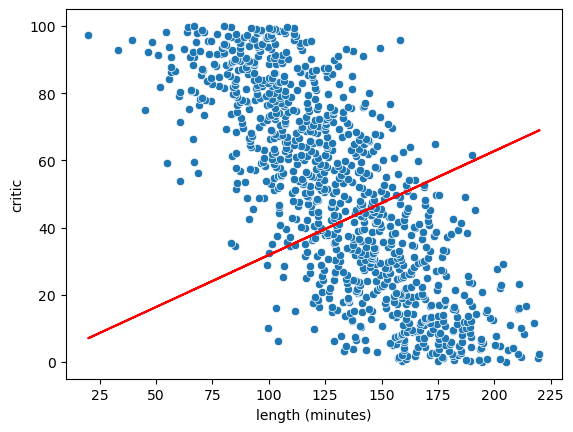

(0.30932492366122416, 0.8844112620475401, 1505164.249564725)

In [65]:
linreg(df, 'length (minutes)', 'critic', 50000)

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***
My equation is: predicted y= .30932492366122416x+.8844112620475401.


***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***
My predicted score is 47.28314981%. This is fairly accurate as the line at that point goes directly though the main cluster of the data. However, for other values the line will be very inaccurate since the line has a positive slope line even though the relationship of the data is negative.

## <span style="color:blue">Problem 3</span>
Finally, examine the relationship between `budget` and `curse words used`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `curse words used`? How do you know?
2. Generalize your Linear Regression function even more. You should be able to call it and have it work on any quantitative data without changing anything about the function definition. Once you are done generalizing your function, call it using `budget` and `curse words used` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, how many curse words would be used during a movie if it had a $5 million dollar budget? How accurate is this prediction?

<AxesSubplot:xlabel='budget', ylabel='curse words used (rate per hour)'>

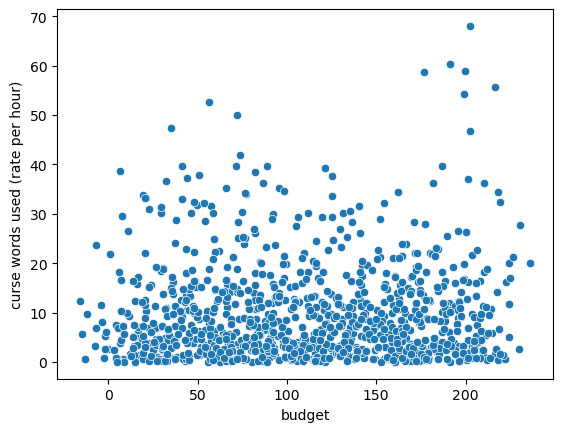

In [47]:
sns.scatterplot(data=df, x='budget', y='curse words used (rate per hour)')

In [48]:
corout=df['budget (millions)'].corr(df['curse words used (rate per hour)'])
print(corout)

0.035462236713153815


***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***
The data appears to have no relationship. This can be seen on the graph as the data is scattered everywhere with no real pattern. It can also be seen by the correlation which is .0354 which is very small signifing no relationship or a very small one.

In [66]:
def linreg(df, x, y, n=150):
    m=0
    b=0
    bestres = float('inf')
    best_model = None
    opm, opb = None, None
    for i in range(n):
        model = None
        optimumresid = float('inf')
        print('starting scatter')
        
        print(f'starting predictions for epoch {i+1}')
        df['predicted']=m*df[x]+b
        
        print('starting residual testing for basic')
        df['residuals']=df[y]-df['predicted']
        resid = df['residuals'].pow(2).sum()

        mchange = -(2 / len(df)) * (df[x] * df['residuals']).sum()
        bchange = -(2 / len(df)) * df['residuals'].sum()
        
        
        m -= .000001 * mchange  
        b -= .000001 * bchange

        if resid < bestres:
            bestres = resid
            best_model = 'LSQ'
            opm, opb = m, b
        
        
        
        
    print(f'Best model: {best_model} with residual squared: {bestres}')
    sns.scatterplot(data=df, x=x, y=y)

    plt.plot(df[x], df['predicted'], color='red', label='Regression Line')
    plt.show()
    return opm, opb, bestres

#I know you said not to use other libraries, but I used seaborn and matplotlib only for visualization. It does not impact the calculations of the line in any way. It is only there to be useful to see what the line looks like.

starting scatter
starting predictions for epoch 1
starting residual testing for basic
starting scatter
starting predictions for epoch 2
starting residual testing for basic
starting scatter
starting predictions for epoch 3
starting residual testing for basic
starting scatter
starting predictions for epoch 4
starting residual testing for basic
starting scatter
starting predictions for epoch 5
starting residual testing for basic
starting scatter
starting predictions for epoch 6
starting residual testing for basic
starting scatter
starting predictions for epoch 7
starting residual testing for basic
starting scatter
starting predictions for epoch 8
starting residual testing for basic
starting scatter
starting predictions for epoch 9
starting residual testing for basic
starting scatter
starting predictions for epoch 10
starting residual testing for basic
starting scatter
starting predictions for epoch 11
starting residual testing for basic
starting scatter
starting predictions for epoch 12
s

starting scatter
starting predictions for epoch 141
starting residual testing for basic
starting scatter
starting predictions for epoch 142
starting residual testing for basic
starting scatter
starting predictions for epoch 143
starting residual testing for basic
starting scatter
starting predictions for epoch 144
starting residual testing for basic
starting scatter
starting predictions for epoch 145
starting residual testing for basic
starting scatter
starting predictions for epoch 146
starting residual testing for basic
starting scatter
starting predictions for epoch 147
starting residual testing for basic
starting scatter
starting predictions for epoch 148
starting residual testing for basic
starting scatter
starting predictions for epoch 149
starting residual testing for basic
starting scatter
starting predictions for epoch 150
starting residual testing for basic
starting scatter
starting predictions for epoch 151
starting residual testing for basic
starting scatter
starting predic

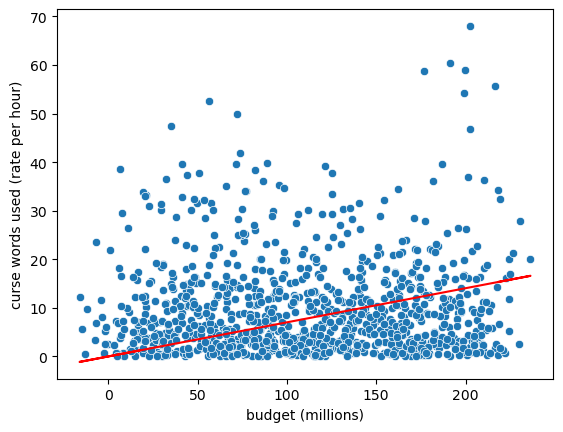

(0.07024054050629407, 0.001337785747570759, 115515.16443720282)

In [67]:
linreg(df, 'budget (millions)', 'curse words used (rate per hour)', 200)

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***
The equation is: predicted y=.07024054050629407x+.001337785747570759.

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***

According to my equation the predicted curse words used will be .3525404883 words per hour. While this doesnt make sense at first, it makes sense in the context of multi hour movies. However, due to the nature of the data with a correlation less that .05 the line is very inaccurate.

## <span style="color:blue">Problem 4</span>
Compare Linear Regression algorithms with someone from a different table. Then, answer these questions:
1. How are your algorithms similar? Different?
2. Whose algorithm was more accurate for problem 1? Problem 2? Problem 3?
3. Why do you think that algorithm was more accurate for one or all of these problems?

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***
Zach used the LSR method while I used the LSQ method. He used the mean and used that to calculate everything, but mine focuses on minimizing the sums of the differences squared and then adjusting the slope and intercept to maximize accuracy.

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***
Zach had a lower residual number for all of his graphs than I did.

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***
I think it is because he uses the LSR method instead of my LSQ method. Other than that I wonder if our residual calculations are different.